<a href="https://colab.research.google.com/github/amzad-786githumb/Data_Analytics-R/blob/main/EDA_With_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#dplyr package

In [2]:
install.packages("dplyr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




##select()

In [4]:
chicago <- readRDS("/content/chicago.rds")

In [5]:
dim(chicago)

[1] 6940    8

In [6]:
str(chicago)

'data.frame':	6940 obs. of  8 variables:
 $ city      : chr  "chic" "chic" "chic" "chic" ...
 $ tmpd      : num  31.5 33 33 29 32 40 34.5 29 26.5 32.5 ...
 $ dptp      : num  31.5 29.9 27.4 28.6 28.9 ...
 $ date      : Date, format: "1987-01-01" "1987-01-02" ...
 $ pm25tmean2: num  NA NA NA NA NA NA NA NA NA NA ...
 $ pm10tmean2: num  34 NA 34.2 47 NA ...
 $ o3tmean2  : num  4.25 3.3 3.33 4.38 4.75 ...
 $ no2tmean2 : num  20 23.2 23.8 30.4 30.3 ...


In [7]:
#Select the first 3 columns
names(chicago)[1:3]

[1] "city" "tmpd" "dptp"

In [8]:
subset <- select(chicago, city:dptp)
head(subset)

city tmpd dptp  
1 chic 31.5 31.500
2 chic 33.0 29.875
3 chic 33.0 27.375
4 chic 29.0 28.625
5 chic 32.0 28.875
6 chic 40.0 35.125

In [9]:
head(select(chicago, -(city:dptp)))

date       pm25tmean2 pm10tmean2 o3tmean2 no2tmean2
1 1987-01-01 NA         34.00000   4.250000 19.98810 
2 1987-01-02 NA               NA   3.304348 23.19099 
3 1987-01-03 NA         34.16667   3.333333 23.81548 
4 1987-01-04 NA         47.00000   4.375000 30.43452 
5 1987-01-05 NA               NA   4.750000 30.33333 
6 1987-01-06 NA         48.00000   5.833333 25.77233

In [10]:
subset <- select(chicago, ends_with("2"))
str(subset)

'data.frame':	6940 obs. of  4 variables:
 $ pm25tmean2: num  NA NA NA NA NA NA NA NA NA NA ...
 $ pm10tmean2: num  34 NA 34.2 47 NA ...
 $ o3tmean2  : num  4.25 3.3 3.33 4.38 4.75 ...
 $ no2tmean2 : num  20 23.2 23.8 30.4 30.3 ...


In [11]:
subset <- select(chicago, starts_with("d"))
str(subset)

'data.frame':	6940 obs. of  2 variables:
 $ dptp: num  31.5 29.9 27.4 28.6 28.9 ...
 $ date: Date, format: "1987-01-01" "1987-01-02" ...


In [12]:
?select

##filter()

In [13]:
chic.f <- filter(chicago, pm25tmean2 > 30)
str(chic.f)

'data.frame':	194 obs. of  8 variables:
 $ city      : chr  "chic" "chic" "chic" "chic" ...
 $ tmpd      : num  23 28 55 59 57 57 75 61 73 78 ...
 $ dptp      : num  21.9 25.8 51.3 53.7 52 56 65.8 59 60.3 67.1 ...
 $ date      : Date, format: "1998-01-17" "1998-01-23" ...
 $ pm25tmean2: num  38.1 34 39.4 35.4 33.3 ...
 $ pm10tmean2: num  32.5 38.7 34 28.5 35 ...
 $ o3tmean2  : num  3.18 1.75 10.79 14.3 20.66 ...
 $ no2tmean2 : num  25.3 29.4 25.3 31.4 26.8 ...


In [14]:
summary(chic.f$pm25tmean2)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  30.05   32.12   35.04   36.63   39.53   61.50 

In [15]:
chic.f <- filter(chicago, pm25tmean2 >30 & tmpd < 80)
select(chic.f, date, tmpd, pm25tmean2)

date       tmpd pm25tmean2
1   1998-01-17 23   38.10000  
2   1998-01-23 28   33.95000  
3   1998-04-30 55   39.40000  
4   1998-05-01 59   35.40000  
5   1998-05-02 57   33.30000  
6   1998-05-07 57   32.10000  
7   1998-05-15 75   56.50000  
8   1998-06-09 61   33.80000  
9   1998-07-13 73   30.30000  
10  1998-07-14 78   41.40000  
11  1998-07-15 79   32.60000  
12  1998-08-03 78   36.40000  
13  1998-08-09 77   32.50000  
14  1998-09-19 72   33.70000  
15  1998-09-20 76   30.30000  
16  1998-09-25 66   31.60000  
17  1998-10-05 65   32.50000  
18  1998-10-11 56   30.90000  
19  1998-10-17 67   32.20000  
20  1998-10-27 63   36.10000  
21  1998-10-30 61   41.00000  
22  1998-11-08 37   33.70000  
23  1998-11-09 43   36.50000  
24  1998-11-29 63   31.70000  
25  1998-12-04 61   31.60000  
26  1999-01-30 34   31.92857  
27  1999-01-31 36   32.50000  
28  1999-02-24 27   39.90000  
29  1999-02-26 36   48.10000  
30  1999-05-15 60   45.60000  
⋮   ⋮          ⋮    ⋮         
136 2004-02-27 35   30.71111  
137 2004-09-03 73   37.28571  
138 2004-09-04 73   38.80000  
139 2004-09-05 76   41.50000  
140 2004-10-27 58   31.61250  
141 2004-10-28 54   43.60000  
142 2004-12-27 17   37.10000  
143 2004-12-29 33   41.32222  
144 2004-12-30 44   35.50000  
145 2005-01-25 33   32.77143  
146 2005-01-29 28   32.70000  
147 2005-01-31 28   45.52857  
148 2005-02-02 26   52.00000  
149 2005-02-03 30   47.45000  
150 2005-02-04 36   61.50000  
151 2005-02-05 46   39.50000  
152 2005-03-04 32   36.90000  
153 2005-05-19 62   31.52857  
154 2005-08-02 79   44.48750  
155 2005-08-08 78   31.66250  
156 2005-08-26 75   31.30000  
157 2005-09-07 78   32.37143  
158 2005-09-12 79   44.30000  
159 2005-10-31 54   31.92500  
160 2005-11-08 55   40.00000  
161 2005-12-07  8   37.80000  
162 2005-12-21 12   37.92857  
163 2005-12-22 22   36.65000  
164 2005-12-23 41   32.90000  
165 2005-12-24 37   30.77143

##arrange()

In [16]:
chicago <- arrange(chicago, date)

In [17]:
head(select(chicago, date, pm25tmean2),3)

date       pm25tmean2
1 1987-01-01 NA        
2 1987-01-02 NA        
3 1987-01-03 NA

In [18]:
tail(select(chicago, date, pm25tmean2),3)

date       pm25tmean2
6938 2005-12-29  7.45000  
6939 2005-12-30 15.05714  
6940 2005-12-31 15.00000

In [19]:
chicago <- arrange(chicago, desc(date))

In [20]:
head(select(chicago, date, pm25tmean2),3)

date       pm25tmean2
1 2005-12-31 15.00000  
2 2005-12-30 15.05714  
3 2005-12-29  7.45000

##rename()

In [21]:
head(chicago[,1:5],3)

city tmpd dptp date       pm25tmean2
1 chic 35   30.1 2005-12-31 15.00000  
2 chic 36   31.0 2005-12-30 15.05714  
3 chic 35   29.4 2005-12-29  7.45000

In [22]:
chicago <- rename(chicago, dewpoint=dptp, pm25=pm25tmean2)
head(chicago[,1:5],3)

city tmpd dewpoint date       pm25    
1 chic 35   30.1     2005-12-31 15.00000
2 chic 36   31.0     2005-12-30 15.05714
3 chic 35   29.4     2005-12-29  7.45000

##mutate()

In [23]:
chicago <- mutate(chicago, pm25detrend=pm25-mean(pm25, na.rm = TRUE))
head(chicago)

city tmpd dewpoint date       pm25     pm10tmean2 o3tmean2  no2tmean2
1 chic 35   30.1     2005-12-31 15.00000 23.5        2.531250 13.25000 
2 chic 36   31.0     2005-12-30 15.05714 19.2        3.034420 22.80556 
3 chic 35   29.4     2005-12-29  7.45000 23.5        6.794837 19.97222 
4 chic 37   34.5     2005-12-28 17.75000 27.5        3.260417 19.28563 
5 chic 40   33.6     2005-12-27 23.56000 27.0        4.468750 23.50000 
6 chic 35   29.6     2005-12-26  8.40000  8.5       14.041667 16.81944 
  pm25detrend
1 -1.230958  
2 -1.173815  
3 -8.780958  
4  1.519042  
5  7.329042  
6 -7.830958

In [24]:
head(transmute(chicago,
     pm10detrend = pm10tmean2 - mean(pm10tmean2, na.rm=TRUE),
     o3detrend = o3tmean2 - mean(o3tmean2, na.rm=TRUE)))

pm10detrend o3detrend 
1 -10.395206  -16.904263
2 -14.695206  -16.401093
3 -10.395206  -12.640676
4  -6.395206  -16.175096
5  -6.895206  -14.966763
6 -25.395206   -5.393846

##group_by()

In [25]:
chicage <- mutate(chicago, year=as.POSIXlt(date)$year + 1900)

In [26]:
years <- group_by(chicage, year)

In [27]:
summarize(years, pm25=mean(pm25, na.rm = TRUE),
          o3 = max(o3tmean2, na.rm = TRUE),
          no2 = median(no2tmean2, na.rm = TRUE))

year pm25     o3       no2     
1  1987      NaN 62.96966 23.49369
2  1988      NaN 61.67708 24.52296
3  1989      NaN 59.72727 26.14062
4  1990      NaN 52.22917 22.59583
5  1991      NaN 63.10417 21.38194
6  1992      NaN 50.82870 24.78921
7  1993      NaN 44.30093 25.76993
8  1994      NaN 52.17844 28.47500
9  1995      NaN 66.58750 27.26042
10 1996      NaN 58.39583 26.38715
11 1997      NaN 56.54167 25.48143
12 1998 18.26467 50.66250 24.58649
13 1999 18.49646 57.48864 24.66667
14 2000 16.93806 55.76103 23.46082
15 2001 16.92632 51.81984 25.06522
16 2002 15.27335 54.88043 22.73750
17 2003 15.23183 56.16608 24.62500
18 2004 14.62864 44.48240 23.39130
19 2005 16.18556 58.84126 22.62387

In [28]:
#pm25 divided into quantiles

qq <- quantile(chicage$pm25, seq(0,1,0.2), na.rm = TRUE)
chicage <- mutate(chicage, pm25.quint = cut(pm25, qq))

In [29]:
quint <- group_by(chicage, pm25.quint)

In [30]:
summarize(quint, o3 = mean(o3tmean2, na.rm = TRUE),
          no2 = mean(no2tmean2, na.rm = TRUE))

pm25.quint  o3       no2     
1 (1.7,8.7]   21.66401 17.99129
2 (8.7,12.4]  20.38248 22.13004
3 (12.4,16.7] 20.66160 24.35708
4 (16.7,22.6] 19.88122 27.27132
5 (22.6,61.5] 20.31775 29.64427
6 NA          18.79044 25.77585

##%>%

In [31]:
mutate(chicage, pm25.quint = cut(pm25, qq)) %>%
        group_by(pm25.quint) %>%
        summarize(o3 = mean(o3tmean2, na.rm = TRUE),
                  no2 = mean(no2tmean2, na.rm = TRUE))

pm25.quint  o3       no2     
1 (1.7,8.7]   21.66401 17.99129
2 (8.7,12.4]  20.38248 22.13004
3 (12.4,16.7] 20.66160 24.35708
4 (16.7,22.6] 19.88122 27.27132
5 (22.6,61.5] 20.31775 29.64427
6 NA          18.79044 25.77585

In [32]:
mutate(chicage, month=as.POSIXlt(date)$mon +1) %>%
       group_by(month) %>%
       summarize(pm25 = mean(pm25, na.rm = TRUE),
                 o3 = max(o3tmean2, na.rm = TRUE),
                 no2 = median(no2tmean2, na.rm = TRUE))

month pm25     o3       no2     
1   1    17.76996 28.22222 25.35417
2   2    20.37513 37.37500 26.78034
3   3    17.40818 39.05000 26.76984
4   4    13.85879 47.94907 25.03125
5   5    14.07420 52.75000 24.22222
6   6    15.86461 66.58750 25.01140
7   7    16.57087 59.54167 22.38442
8   8    16.93380 53.96701 22.98333
9   9    15.91279 57.48864 24.47917
10 10    14.23557 47.09275 24.15217
11 11    15.15794 29.45833 23.56537
12 12    17.52221 27.70833 24.45773

# Exploratory Data Analysis

In [33]:
library(readr)
library(dplyr)
library(ggplot2)

In [34]:
# place data into frame
url = "https://aqs.epa.gov/aqsweb/airdata/hourly_44201_2014.zip"
# create temp file for the zip file
zip_file = tempfile(fileext = ".zip")
# unzip data into temp location
download.file(url, zip_file, method = 'libcurl', mode = "wb")
# read data into a tibble and specify data type for each variable, see EPA data source
ozone = readr::read_csv(zip_file, col_types = "iiiiinnccDtDtncnlccicccc")
# remove spaces in variables and replace with underscore
names(ozone) = gsub("\\s", "_", names(ozone))
unlink(zip_file)

In [35]:
names(ozone) <- make.names(names(ozone))

In [36]:
##check the number of rows and columns

nrow(ozone)

[1] 9058598

In [37]:
ncol(ozone)

[1] 24

##Run str()

In [38]:
str(ozone)

spc_tbl_ [9,058,598 × 24] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ State_Code         : int [1:9058598] 1 1 1 1 1 1 1 1 1 1 ...
 $ County_Code        : int [1:9058598] 3 3 3 3 3 3 3 3 3 3 ...
 $ Site_Num           : int [1:9058598] 10 10 10 10 10 10 10 10 10 10 ...
 $ Parameter_Code     : int [1:9058598] 44201 44201 44201 44201 44201 44201 44201 44201 44201 44201 ...
 $ POC                : int [1:9058598] 1 1 1 1 1 1 1 1 1 1 ...
 $ Latitude           : num [1:9058598] 30.5 30.5 30.5 30.5 30.5 ...
 $ Longitude          : num [1:9058598] -87.9 -87.9 -87.9 -87.9 -87.9 ...
 $ Datum              : chr [1:9058598] "NAD83" "NAD83" "NAD83" "NAD83" ...
 $ Parameter_Name     : chr [1:9058598] "Ozone" "Ozone" "Ozone" "Ozone" ...
 $ Date_Local         : Date[1:9058598], format: "2014-03-01" "2014-03-01" ...
 $ Time_Local         : 'hms' num [1:9058598] 01:00:00 02:00:00 03:00:00 04:00:00 ...
  ..- attr(*, "units")= chr "secs"
 $ Date_GMT           : Date[1:9058598], format: "2014-03-01" "2014-0

In [39]:
head(ozone[,c(6:7, 10)])

Latitude Longitude Date_Local
1 30.49748 -87.88026 2014-03-01
2 30.49748 -87.88026 2014-03-01
3 30.49748 -87.88026 2014-03-01
4 30.49748 -87.88026 2014-03-01
5 30.49748 -87.88026 2014-03-01
6 30.49748 -87.88026 2014-03-01

In [40]:
tail(ozone[, c(6:7, 10)])

Latitude Longitude Date_Local
1 31.7122  -106.3953 2014-08-31
2 31.7122  -106.3953 2014-08-31
3 31.7122  -106.3953 2014-08-31
4 31.7122  -106.3953 2014-08-31
5 31.7122  -106.3953 2014-08-31
6 31.7122  -106.3953 2014-08-31

In [41]:
table(ozone$Time.Local)

Warning message:
“Unknown or uninitialised column: `Time.Local`.”


< table of extent 0 >

In [42]:
library(dplyr)

In [43]:
select(ozone,State_Name) %>%unique %>%nrow

[1] 53

In [44]:
# prompt: Generate the code to get the unique names of each state.

select(ozone,State_Name) %>% unique() %>% as.data.frame()

State_Name          
1  Alabama             
2  Alaska              
3  Arizona             
4  Arkansas            
5  California          
6  Colorado            
7  Connecticut         
8  Delaware            
9  District Of Columbia
10 Florida             
11 Georgia             
12 Hawaii              
13 Idaho               
14 Illinois            
15 Indiana             
16 Iowa                
17 Kansas              
18 Kentucky            
19 Louisiana           
20 Maine               
21 Maryland            
22 Massachusetts       
23 Michigan            
24 Minnesota           
25 Mississippi         
26 Missouri            
27 Montana             
28 Nebraska            
29 Nevada              
30 New Hampshire       
31 New Jersey          
32 New Mexico          
33 New York            
34 North Carolina      
35 North Dakota        
36 Ohio                
37 Oklahoma            
38 Oregon              
39 Pennsylvania        
40 Rhode Island        
41 South Carolina      
42 South Dakota        
43 Tennessee           
44 Texas               
45 Utah                
46 Vermont             
47 Virginia            
48 Washington          
49 West Virginia       
50 Wisconsin           
51 Wyoming             
52 Puerto Rico         
53 Country Of Mexico

In [45]:
summary(ozone$Sample_Measurement)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.00500  0.01900  0.03000  0.03028  0.04100  0.21300 

In [46]:
quantile(ozone$Sample.Measurement, seq(0, 1, 0.1))

Warning message:
“Unknown or uninitialised column: `Sample.Measurement`.”


0%  10%  20%  30%  40%  50%  60%  70%  80%  90% 100% 
  NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA

In [47]:
ranking <-group_by(ozone,State_Name,County_Name) %>%
  summarize(ozone =mean(Sample_Measurement)) %>%
  as.data.frame %>%
  arrange(desc(ozone))

`summarise()` has grouped output by 'State_Name'. You can override using the
`.groups` argument.


In [48]:
head(ranking, 10)

State_Name County_Name ozone     
1  Colorado   Clear Creek 0.05022088
2  California Mariposa    0.04849011
3  California Nevada      0.04821713
4  Colorado   Park        0.04799988
5  Wyoming    Albany      0.04740057
6  Colorado   Chaffee     0.04732017
7  California Inyo        0.04469113
8  Utah       San Juan    0.04435075
9  California El Dorado   0.04363719
10 Nevada     Elko        0.04346459

In [49]:
tail(ranking, 10)

State_Name  County_Name          ozone      
788 Georgia     DeKalb               0.020478241
789 New Jersey  Warren               0.020137471
790 Louisiana   West Baton Rouge     0.020091025
791 Washington  Whatcom              0.020079729
792 Oregon      Washington           0.019582854
793 Oklahoma    Caddo                0.017519115
794 Puerto Rico Juncos               0.013462225
795 Alaska      Fairbanks North Star 0.013273003
796 Puerto Rico Bayamon              0.008517895
797 Puerto Rico Catano               0.004490545

In [50]:
filter(ozone, State_Name == "California" & County_Name =="Mariposa") %>% nrow

[1] 12130

In [51]:
ozone <- mutate(ozone, Date_Local == as.Date(Date_Local))

In [52]:
filter(ozone,State_Name=="California"&County_Name=="Mariposa")%>%
  mutate(month=factor(months(Date_Local),levels=month.name))%>%
  group_by(month)%>%
  summarize(ozone=mean(Sample_Measurement))

month     ozone     
1  January   0.04081929
2  February  0.03884305
3  March     0.04548374
4  April     0.04976124
5  May       0.05047489
6  June      0.05639331
7  July      0.05224286
8  August    0.05541681
9  September 0.05250999
10 October   0.04894909
11 November  0.03536872
12 December  0.03472859

In [53]:
filter(ozone, State_Name == "Oklahoma" & County_Name == "Caddo") %>% nrow

[1] 7507

In [54]:
filter(ozone, State_Name == "Oklahoma" & County_Name == "Caddo") %>%

 mutate(month = factor(months(Date_Local), levels = month.name)) %>%


 group_by(month) %>%
 summarize(ozone = mean(Sample_Measurement))

month     ozone      
1  January   0.018737327
2  February  0.001555324
3  March     0.001733520
4  April     0.026224784
5  May       0.024224932
6  June      0.020261248
7  July      0.019166667
8  August    0.023531205
9  September 0.019372549
10 October   0.021062415
11 November  0.020544674
12 December  0.012848921

In [55]:
set.seed(10234)
N <- nrow(ozone)
idx <- sample(N, N, replace = TRUE)
ozone2 <- ozone[idx,]

In [56]:
ranking2 <- group_by(ozone2, State_Name, County_Name) %>%
  summarize(ozone = mean(Sample_Measurement)) %>%
  as.data.frame %>%
  arrange(desc(ozone))

`summarise()` has grouped output by 'State_Name'. You can override using the
`.groups` argument.


In [57]:
cbind(head(ranking, 10),
      head(ranking2, 10))

State_Name County_Name ozone      State_Name County_Name ozone     
1  Colorado   Clear Creek 0.05022088 Colorado   Clear Creek 0.05022654
2  California Mariposa    0.04849011 California Mariposa    0.04851848
3  California Nevada      0.04821713 California Nevada      0.04820596
4  Colorado   Park        0.04799988 Colorado   Park        0.04797031
5  Wyoming    Albany      0.04740057 Wyoming    Albany      0.04744281
6  Colorado   Chaffee     0.04732017 Colorado   Chaffee     0.04734637
7  California Inyo        0.04469113 California Inyo        0.04459566
8  Utah       San Juan    0.04435075 Utah       San Juan    0.04433898
9  California El Dorado   0.04363719 California El Dorado   0.04379298
10 Nevada     Elko        0.04346459 Nevada     Elko        0.04361655

In [58]:
cbind(tail(ranking, 10),
       tail(ranking2,10))

State_Name  County_Name          ozone       State_Name 
788 Georgia     DeKalb               0.020478241 Alaska     
789 New Jersey  Warren               0.020137471 Louisiana  
790 Louisiana   West Baton Rouge     0.020091025 New Jersey 
791 Washington  Whatcom              0.020079729 Washington 
792 Oregon      Washington           0.019582854 Oregon     
793 Oklahoma    Caddo                0.017519115 Oklahoma   
794 Puerto Rico Juncos               0.013462225 Puerto Rico
795 Alaska      Fairbanks North Star 0.013273003 Alaska     
796 Puerto Rico Bayamon              0.008517895 Puerto Rico
797 Puerto Rico Catano               0.004490545 Puerto Rico
    County_Name          ozone      
788 Matanuska-Susitna    0.020555348
789 West Baton Rouge     0.020182425
790 Warren               0.020160834
791 Whatcom              0.020018703
792 Washington           0.019631471
793 Caddo                0.017609119
794 Juncos               0.013459985
795 Fairbanks North Star 0.013400340
796 Bayamon              0.008316865
797 Catano               0.004562792

#Getting the Data

In [59]:
class <- c("numeric", "character", "factor", "numeric", "numeric")

In [60]:
pollution <- read.csv("/content/avgpm25.csv", colClasses = class)

In [61]:
head(pollution)

pm25      fips  region longitude latitude
1  9.771185 01003 east   -87.74826 30.59278
2  9.993817 01027 east   -85.84286 33.26581
3 10.688618 01033 east   -87.72596 34.73148
4 11.337424 01049 east   -85.79892 34.45913
5 12.119764 01055 east   -86.03212 34.01860
6 10.827805 01069 east   -85.35039 31.18973

In [62]:
str(pollution)

'data.frame':	576 obs. of  5 variables:
 $ pm25     : num  9.77 9.99 10.69 11.34 12.12 ...
 $ fips     : chr  "01003" "01027" "01033" "01049" ...
 $ region   : Factor w/ 2 levels "east","west": 1 1 1 1 1 1 1 1 1 1 ...
 $ longitude: num  -87.7 -85.8 -87.7 -85.8 -86 ...
 $ latitude : num  30.6 33.3 34.7 34.5 34 ...


## Five Number Summary

In [63]:
fivenum(pollution$pm25)

[1]  3.382626  8.547590 10.046697 11.356829 18.440731

In [64]:
summary(pollution$pm25)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.383   8.549  10.047   9.836  11.356  18.441 

##Boxplot

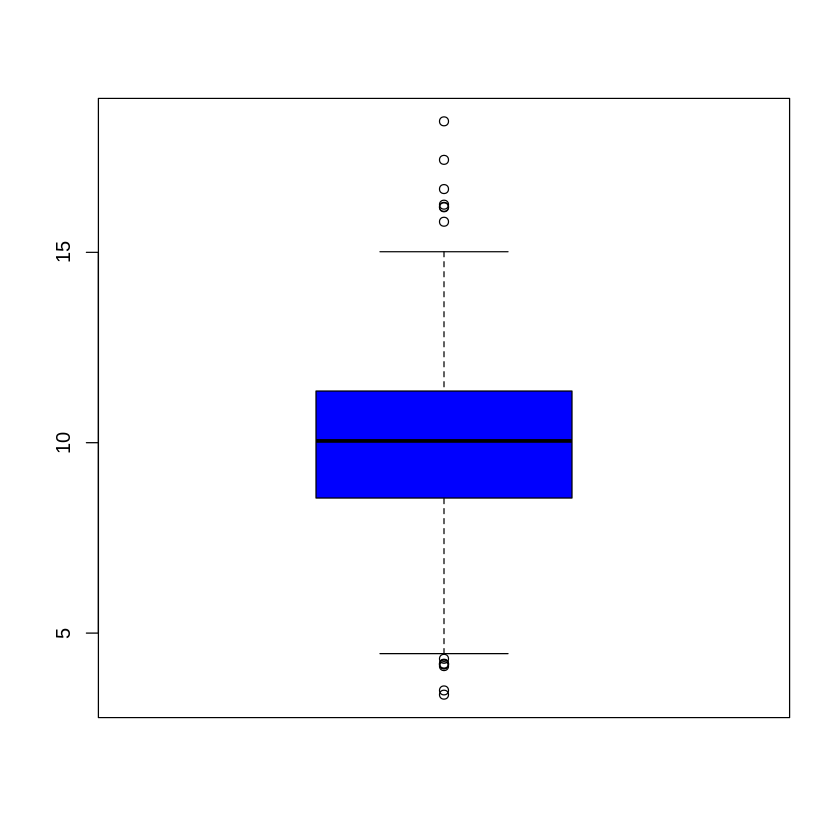

In [65]:
boxplot(pollution$pm25, col = "blue")

In [66]:
library(dplyr)
filter(pollution, pm25 > 15)

pm25     fips  region longitude latitude
1 16.19452 06019 west   -119.9035 36.63837
2 15.80378 06029 west   -118.6833 35.29602
3 18.44073 06031 west   -119.8113 36.15514
4 16.66180 06037 west   -118.2342 34.08851
5 15.01573 06047 west   -120.6741 37.24578
6 17.42905 06065 west   -116.8036 33.78331
7 16.25190 06099 west   -120.9588 37.61380
8 16.18358 06107 west   -119.1661 36.23465

In [67]:
install.packages("maps")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




Attaching package: ‘maps’


The following object is masked _by_ ‘.GlobalEnv’:

    ozone




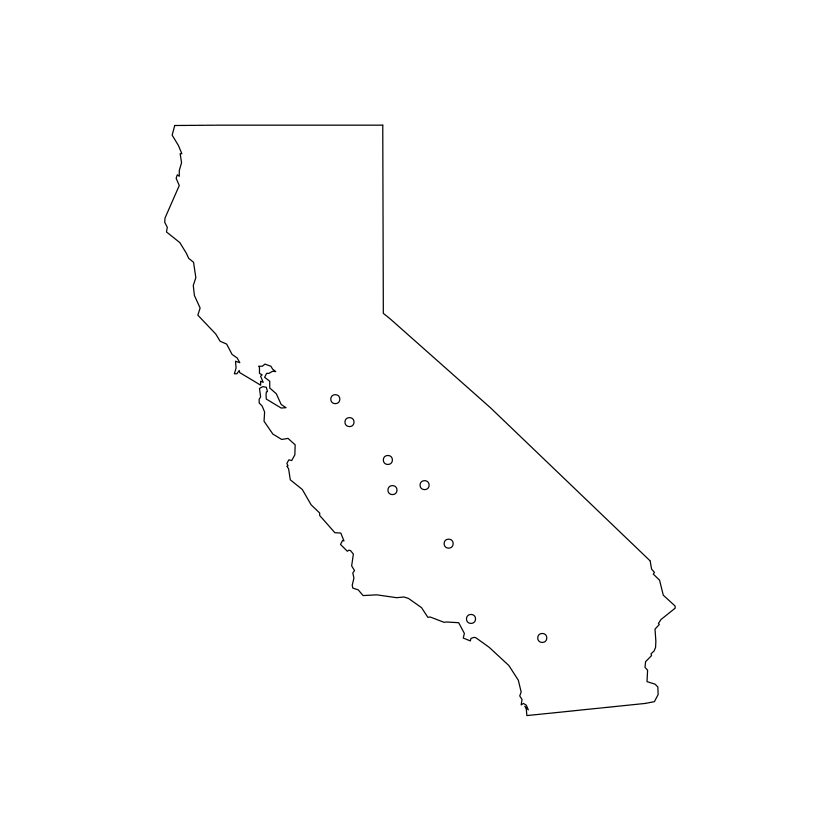

In [68]:
library(maps)
maps::map("state", "california")
with(filter(pollution, pm25 > 15), points(longitude, latitude))

##Histogram

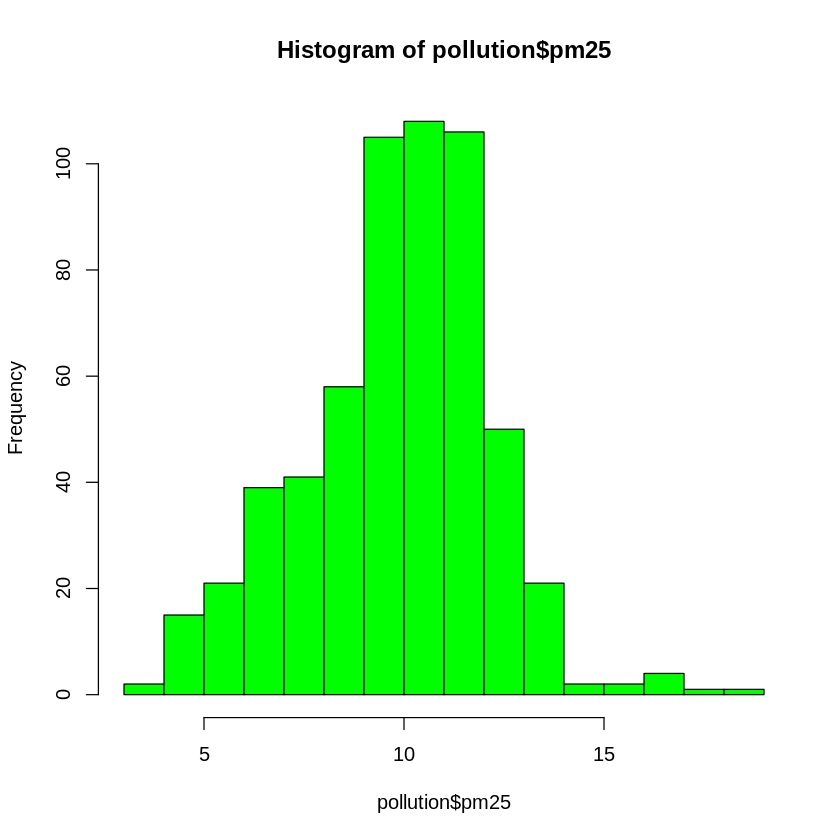

In [69]:
hist(pollution$pm25, col = "green")

##Barplot

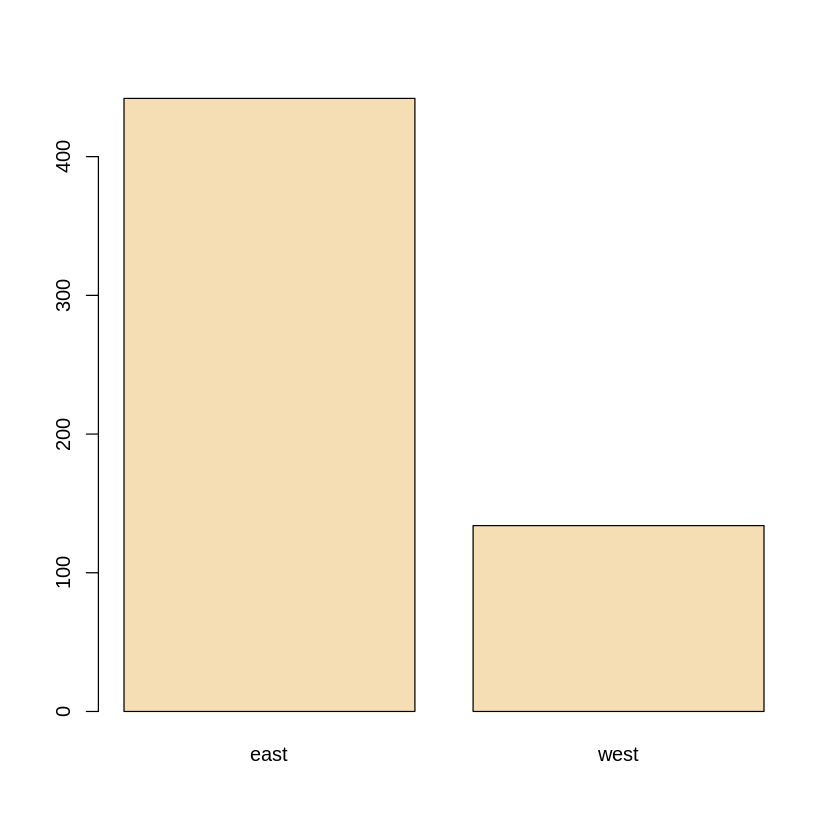

In [70]:
library(dplyr)
table(pollution$region) %>% barplot(col = "wheat")

##Multiple Boxes

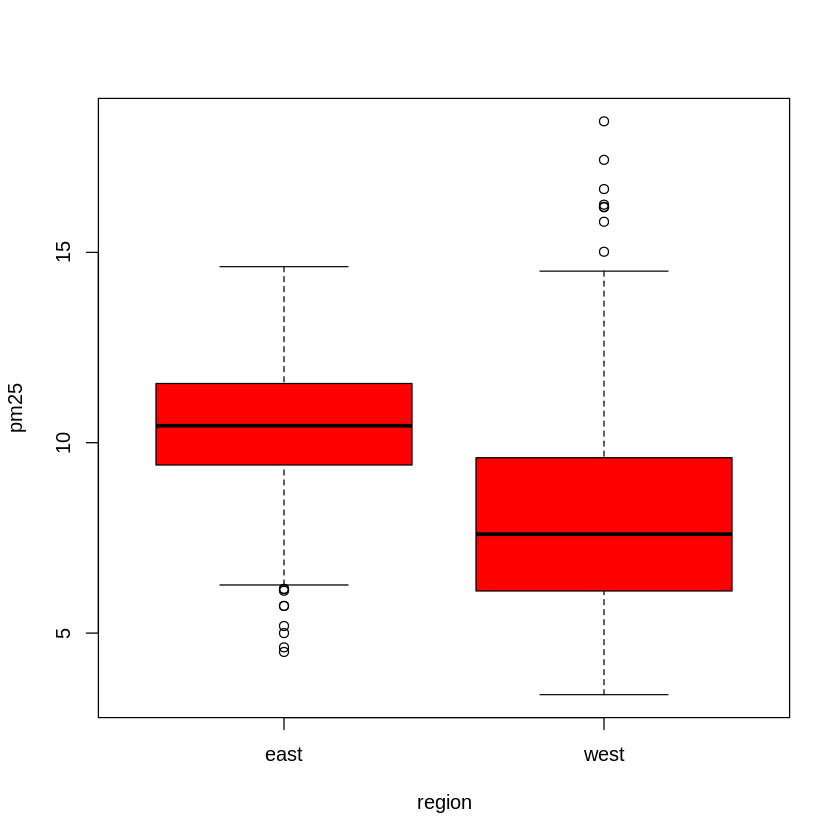

In [71]:
boxplot(pm25 ~ region, data = pollution, col = "red")

##Multiple Histograms

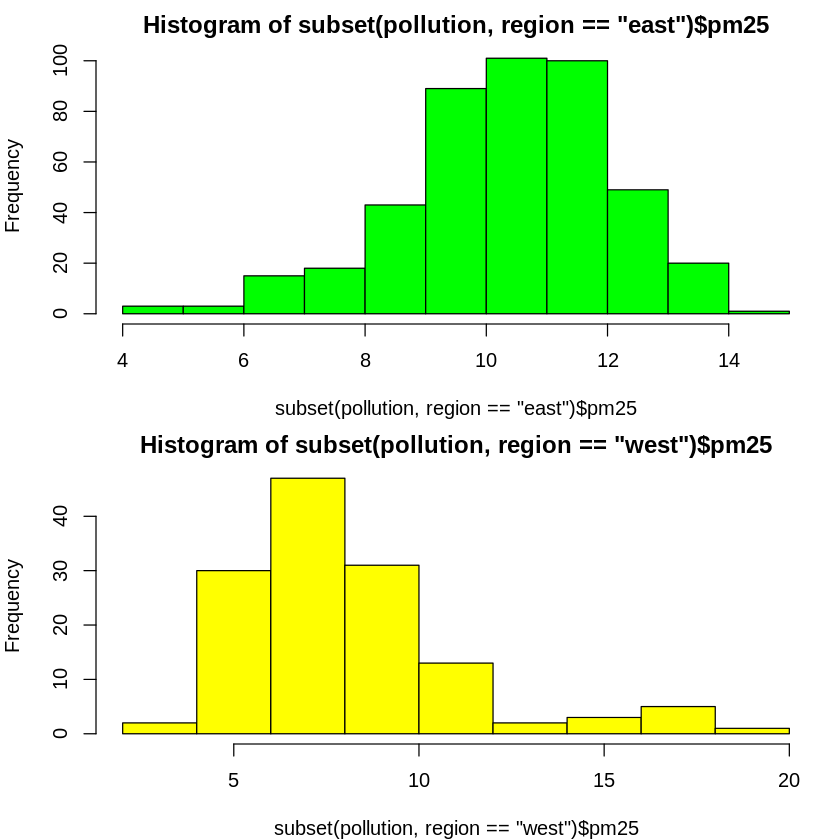

In [72]:
par(mfrow = c(2,1), mar  = c(4,4,2,1))
hist(subset(pollution, region == "east")$pm25, col = "green")
hist(subset(pollution, region == "west")$pm25, col = "yellow")

##Scatterplots

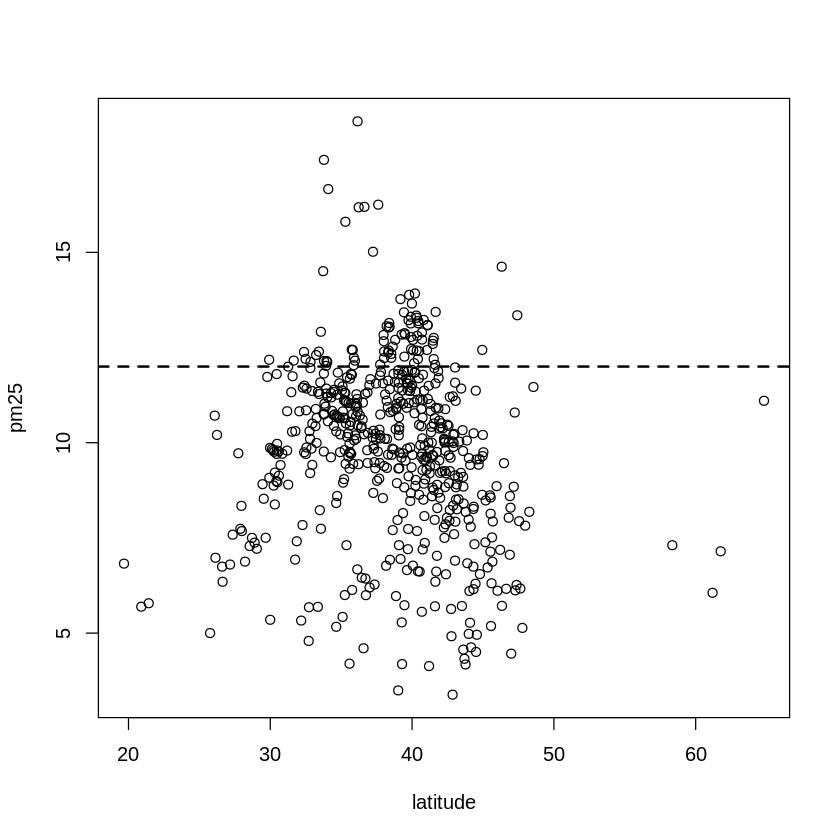

In [73]:
with(pollution, plot(latitude, pm25))
abline(h = 12, lwd = 2, lty = 2)

##Scatterplot- Using Color

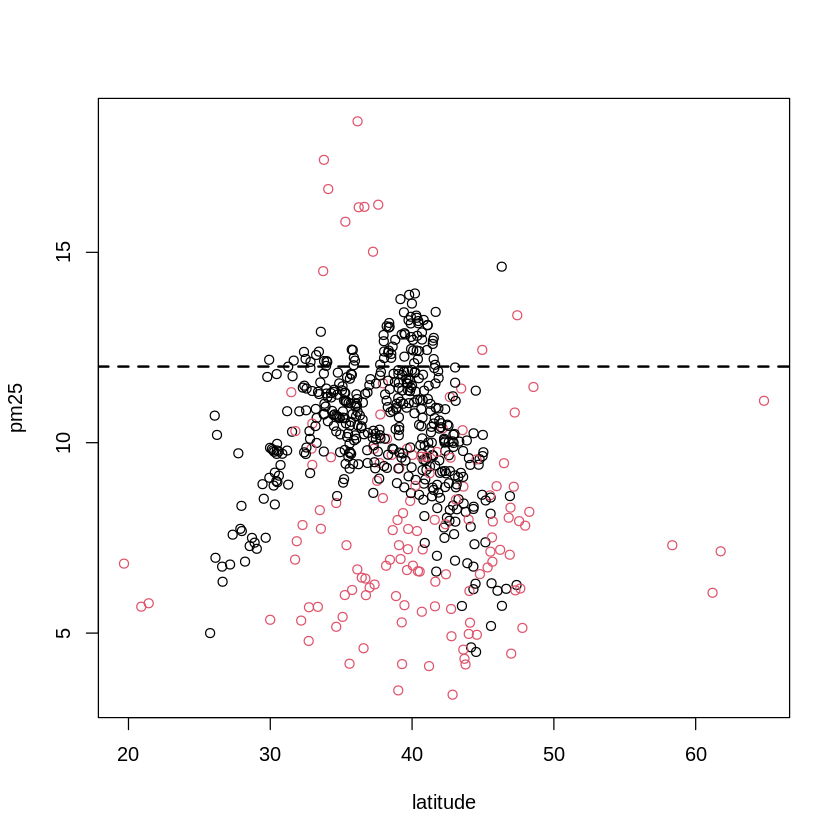

In [74]:
with(pollution, plot(latitude, pm25, col = region))
abline(h = 12, lwd = 2, lty = 2)

In [75]:
levels(pollution$region)

[1] "east" "west"

##Multiple Scatterplots

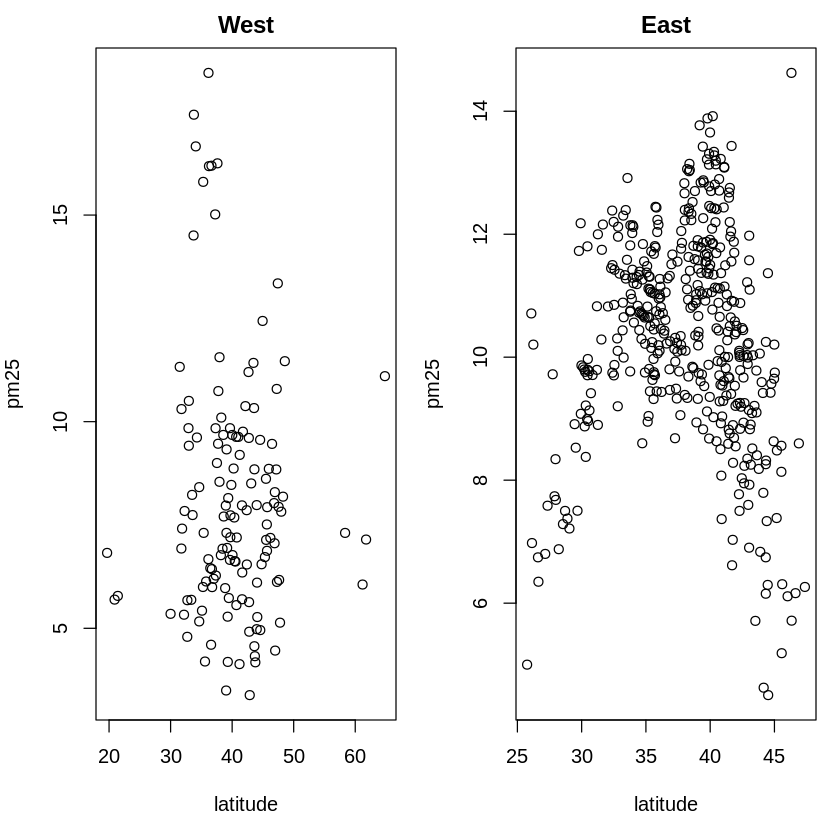

In [76]:
par(mfrow = c(1,2), mar = (c(5,4,2,1)))
with(subset(pollution, region=="west"), plot(latitude, pm25, main = "West"))
with(subset(pollution, region=="east"), plot(latitude, pm25, main = "East"))

#Plotting Systems

##The Base Plotting System

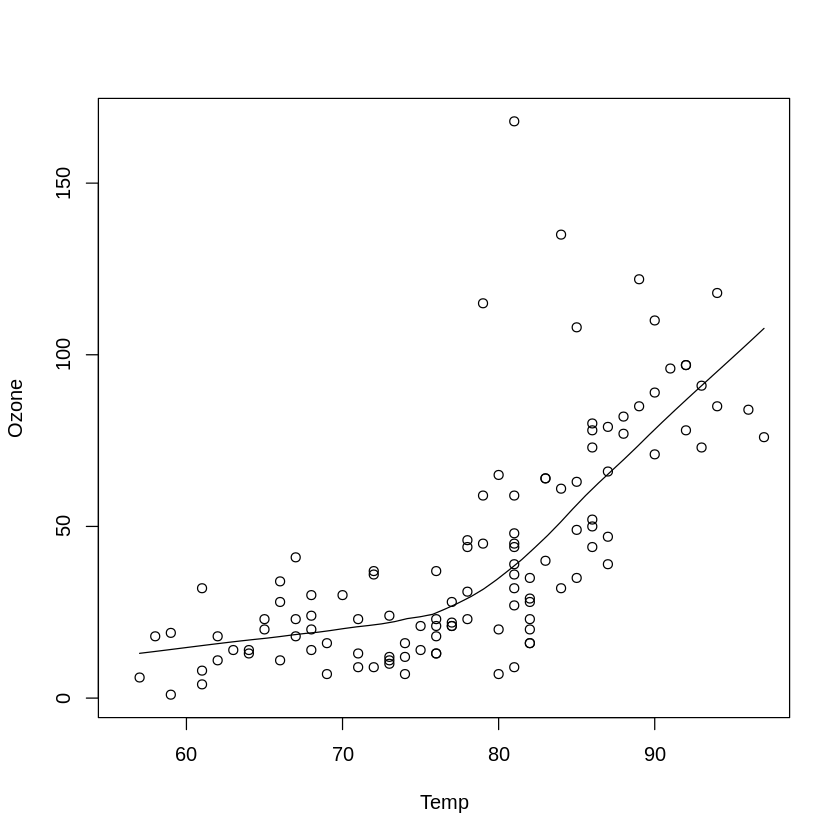

In [77]:
 data(airquality)
  with(airquality, {

 plot(Temp, Ozone)
 lines(loess.smooth(Temp, Ozone))

  })

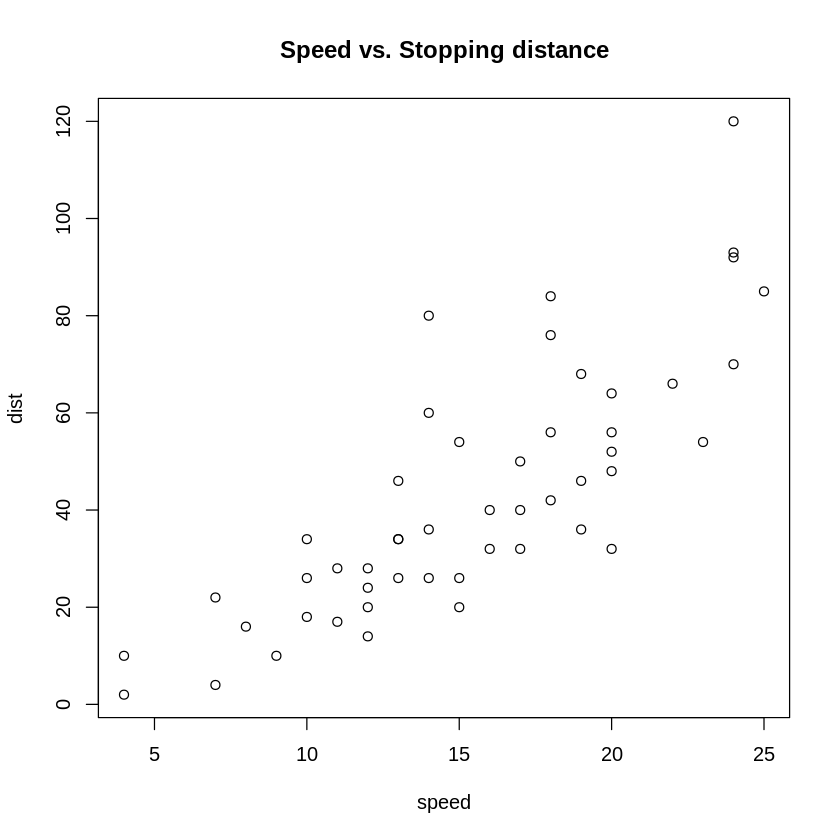

In [78]:
#base plot

data(cars)

##Create the plot / draw canvas
with(cars, plot(speed, dist))

##Add anootation
title("Speed vs. Stopping distance")

##The Lattice System

In [79]:
install.packages("lattice")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [80]:
library(lattice)

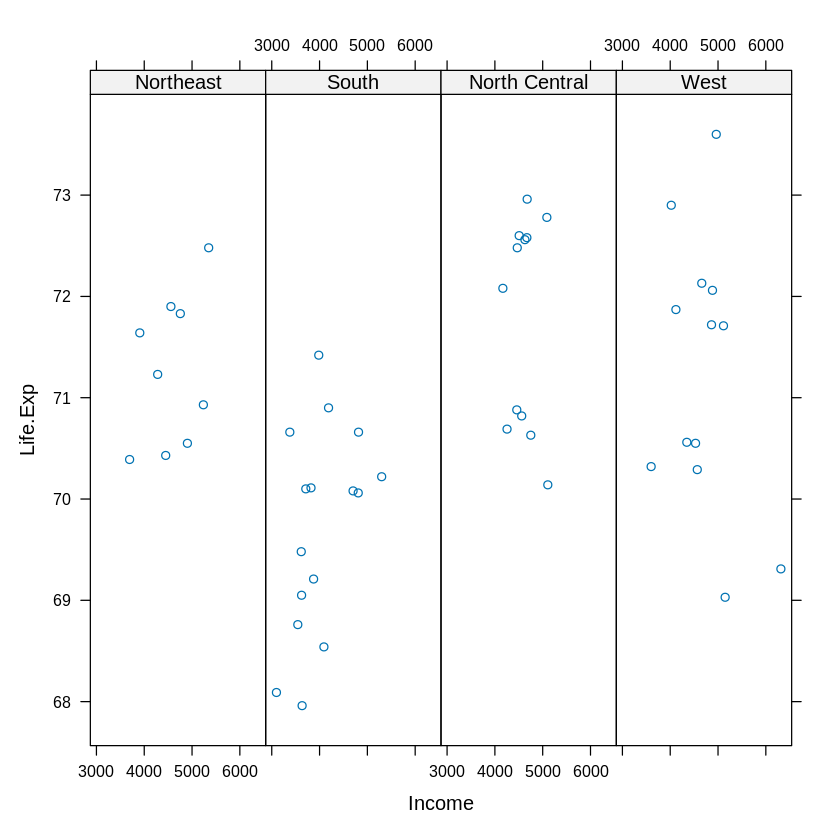

In [81]:
state <- data.frame(state.x77, region = state.region)
xyplot(Life.Exp ~ Income | region, data = state, layout = c(4,1))

##The ggplot2 system

In [82]:
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [83]:
library(ggplot2)

Warning message:
“`qplot()` was deprecated in ggplot2 3.4.0.”


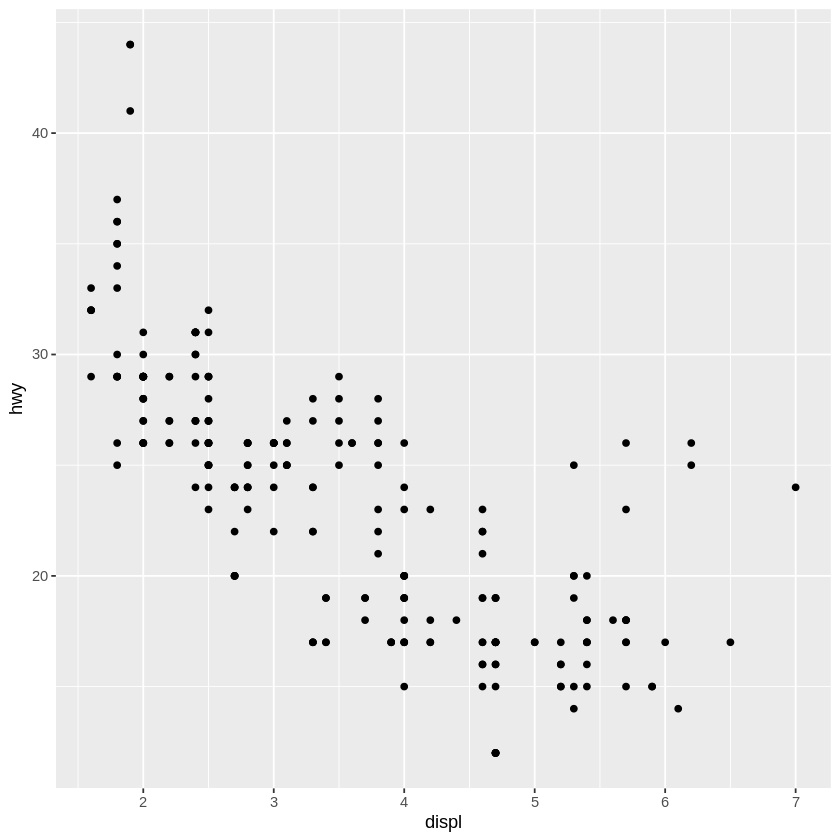

In [84]:
data(mpg)
qplot(displ, hwy, data=mpg)

#Graphics Devices

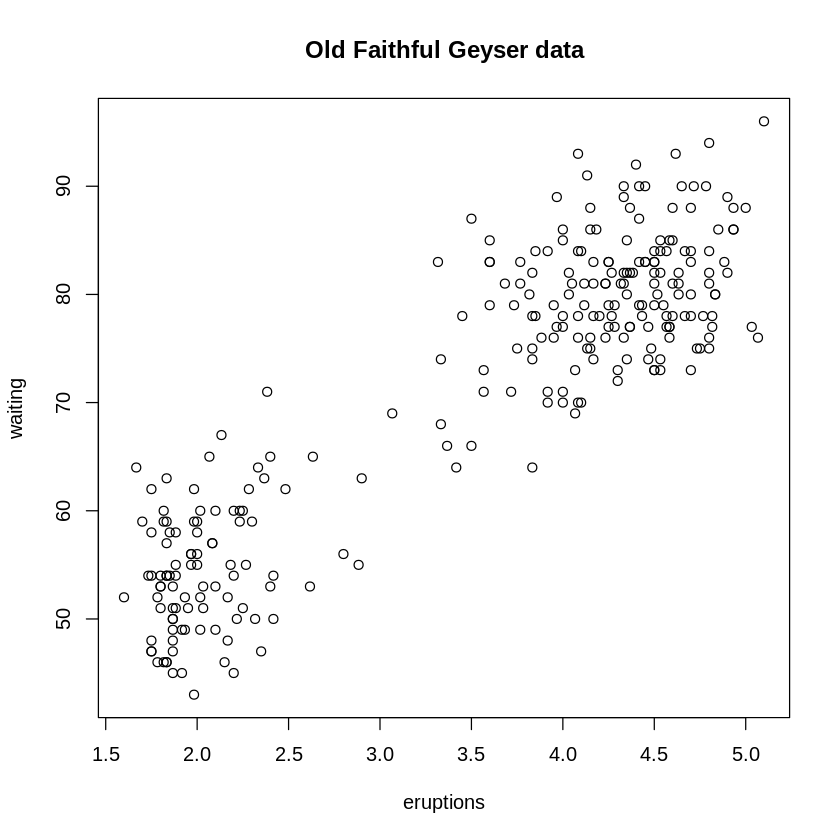

In [85]:
##Make plot appear on screen device
with(faithful, plot(eruptions, waiting))

##Annotate with a title
title(main = "Old Faithful Geyser data")

In [86]:
##Open pdf device
pdf(file = "myplot.pdf")

pdf 
  3

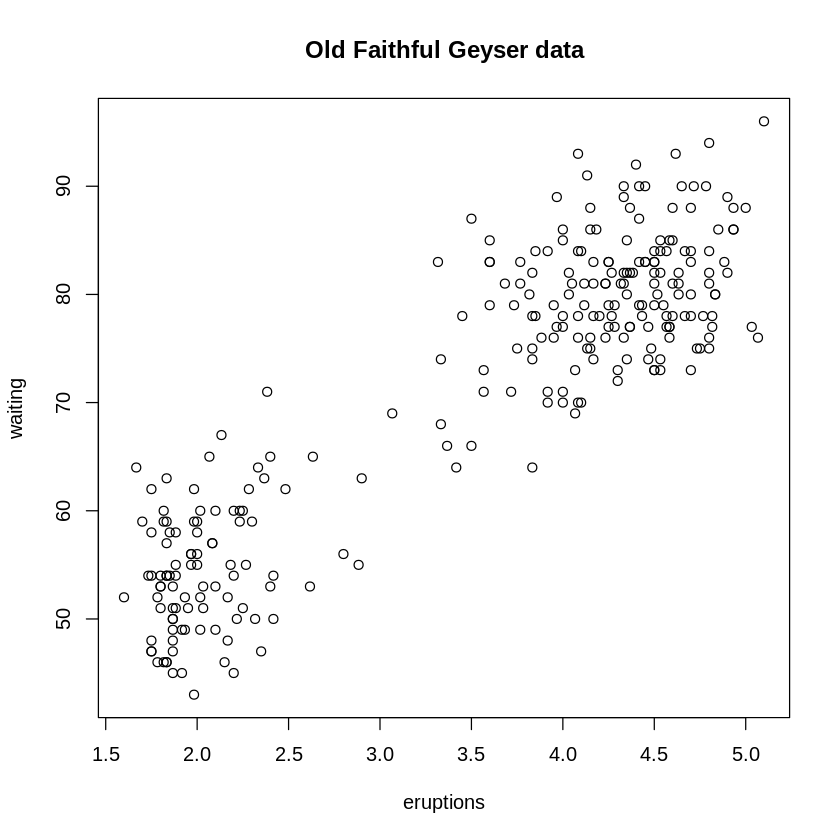

In [87]:
##Create plot and send to a file
with(faithful, plot(eruptions, waiting))

##Annotate plot
title(main = "Old Faithful Geyser data")

##close the PDF file device
dev.off()

In [88]:
library(datasets)

png 
  4

agg_record_1701746352 
                    2

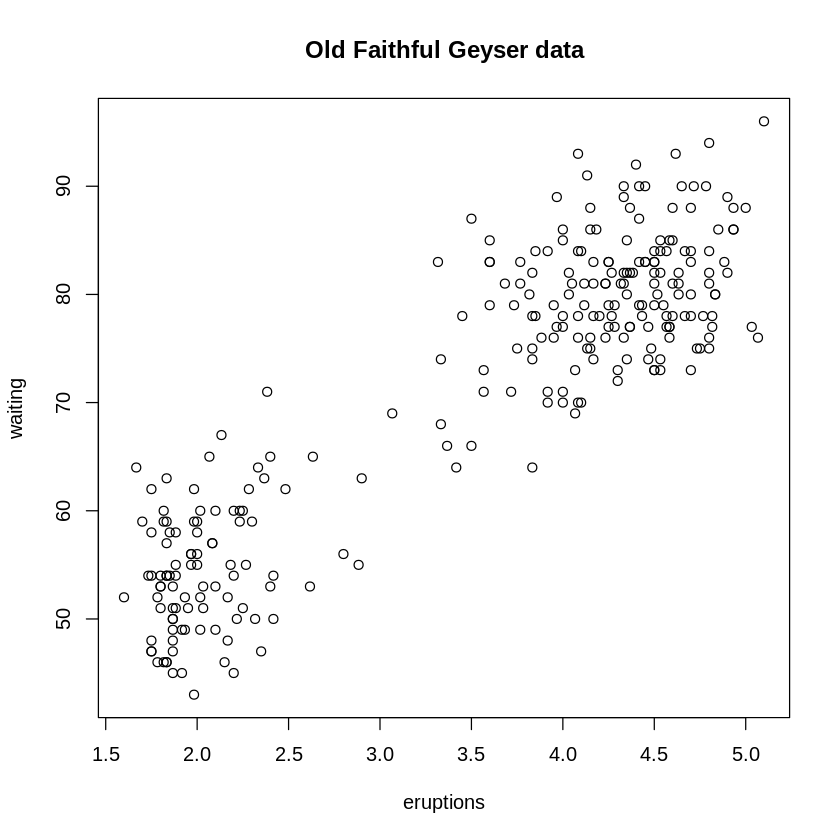

In [89]:
##Create plot on screen device
with(faithful, plot(eruptions, waiting))

##Add a main title
title(main = "Old Faithful Geyser data")

##Copy my plot to a PNG file
dev.copy(png, file="geyserplot.png")

##Close the PNG device
dev.off()

#The Base Plotting System

##Histogram

In [90]:
library(datasets)

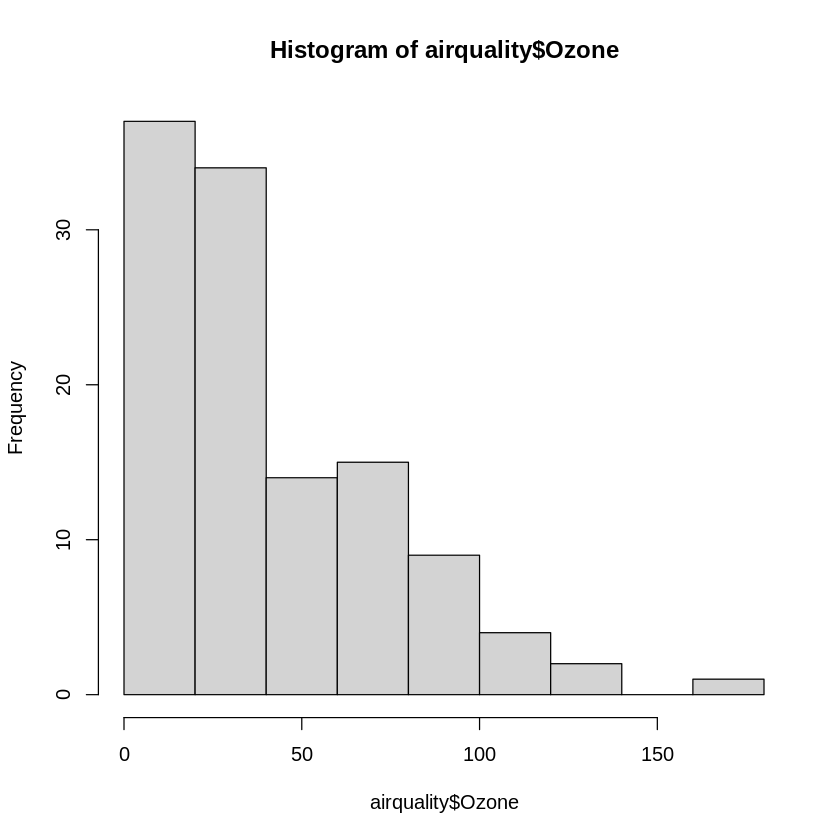

In [91]:
##Draw a new plot on the screen
hist(airquality$Ozone)

##Boxplot

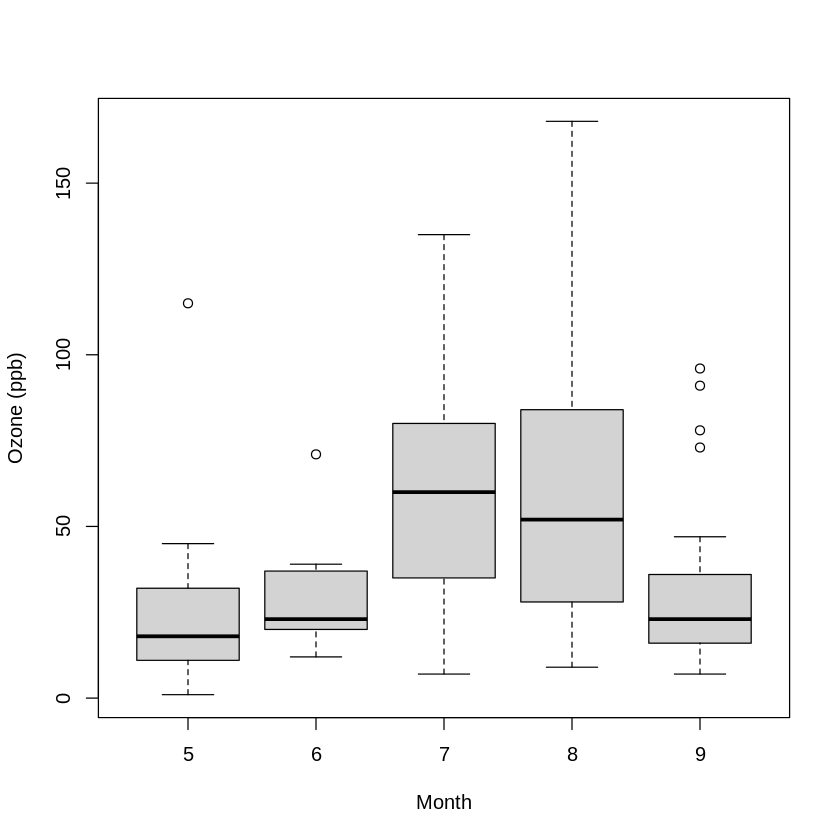

In [92]:
airquality <- transform(airquality, Month = factor(Month))
boxplot(Ozone ~ Month, airquality, xlab = "Month", ylab = "Ozone (ppb)")

##Scatterplot

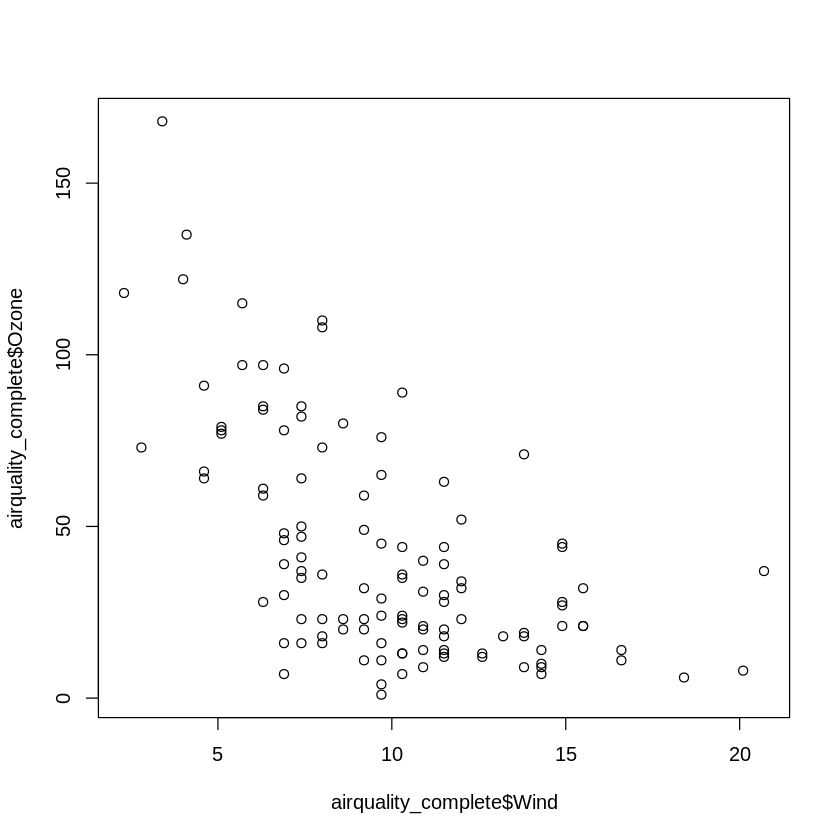

In [93]:
with(airquality, {
  # Remove rows with missing values in Wind or Ozone
  airquality_complete <- airquality[complete.cases(airquality[, c("Wind", "Ozone")]), ]
  plot(airquality_complete$Wind, airquality_complete$Ozone)
})

In [94]:
par("lty")

[1] "solid"

In [95]:
par("col")

[1] "black"

In [96]:
par("pch")

[1] 1

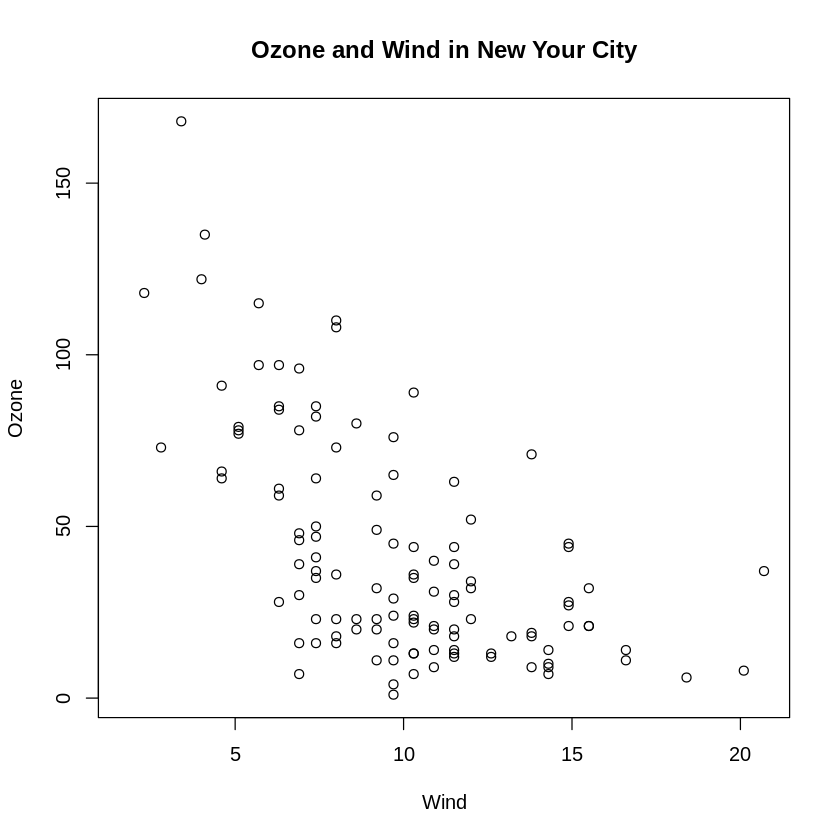

In [97]:
##Make the initial plot
with(airquality, plot(Wind, Ozone))

##Add a title
title(main = "Ozone and Wind in New Your City")

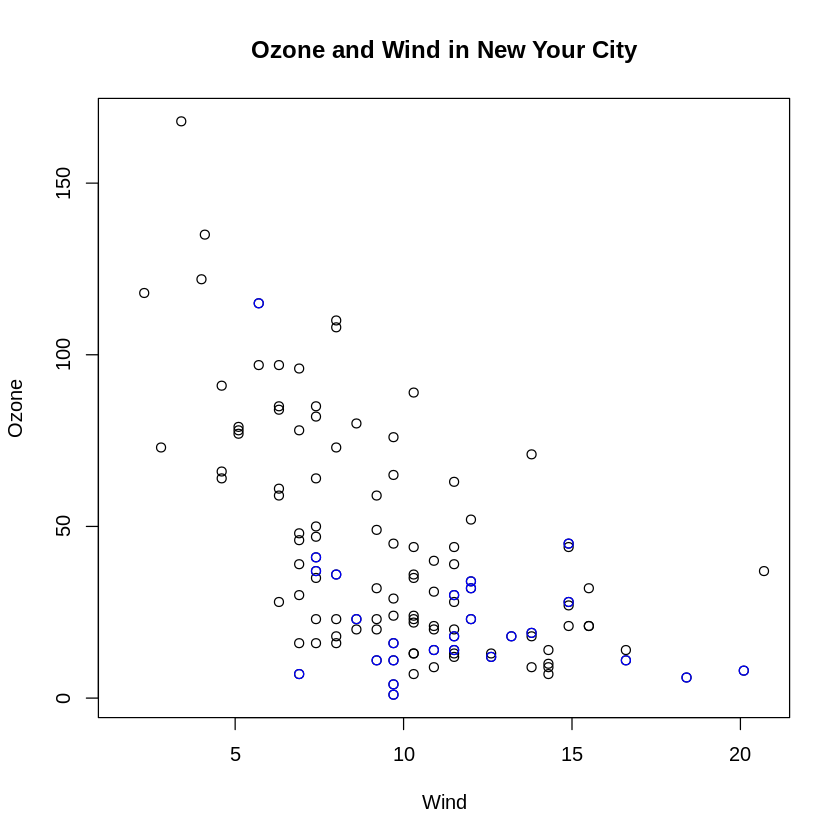

In [98]:
with(airquality, plot(Wind, Ozone, main = "Ozone and Wind in New Your City"))
with(subset(airquality, Month==5), points(Wind, Ozone, col="blue"))

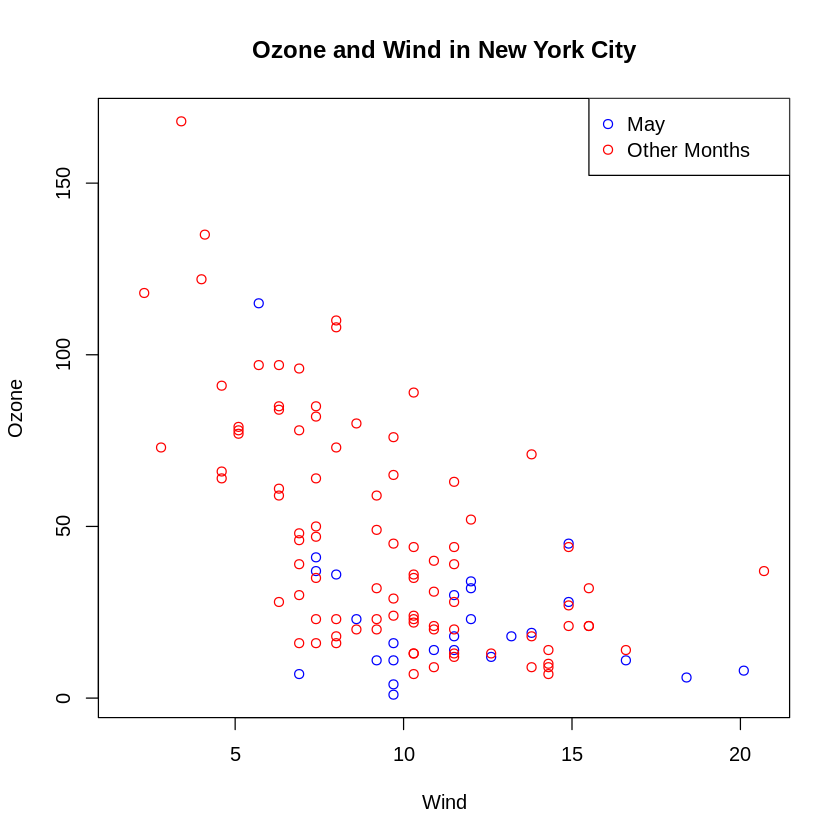

In [99]:
with(airquality, plot(Wind, Ozone, main = "Ozone and Wind in New York City", type = "n"))
with(subset(airquality, Month == 5), points(Wind, Ozone, col="blue"))
with(subset(airquality, Month != 5), points(Wind, Ozone, col="red"))
legend("topright", pch=1, col = c("blue","red"), legend = c("May", "Other Months"))

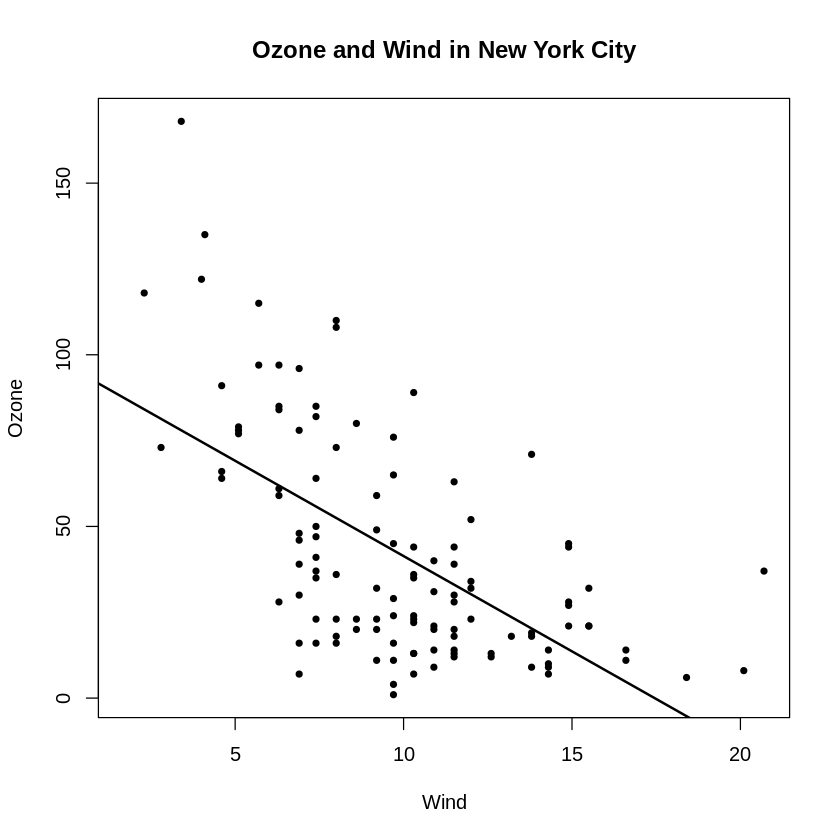

In [100]:
#Line with regression

with(airquality, plot(Wind, Ozone, main = "Ozone and Wind in New York City", pch=20))

##Fit the simple linear regression model
model <- lm(Ozone ~ Wind, airquality)

##Draw regression line on plot
abline(model, lwd = 2)

##Multiple Base Plots

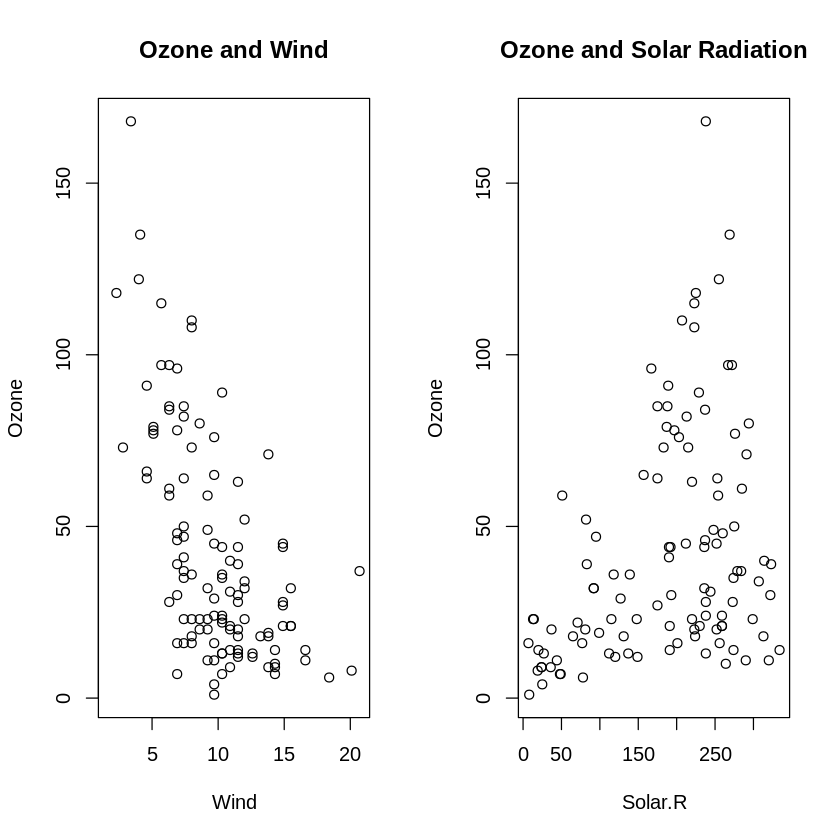

In [101]:
par(mfrow = c(1,2))
with(airquality, {
  plot(Wind, Ozone, main = "Ozone and Wind")
  plot(Solar.R, Ozone, main = "Ozone and Solar Radiation")
})

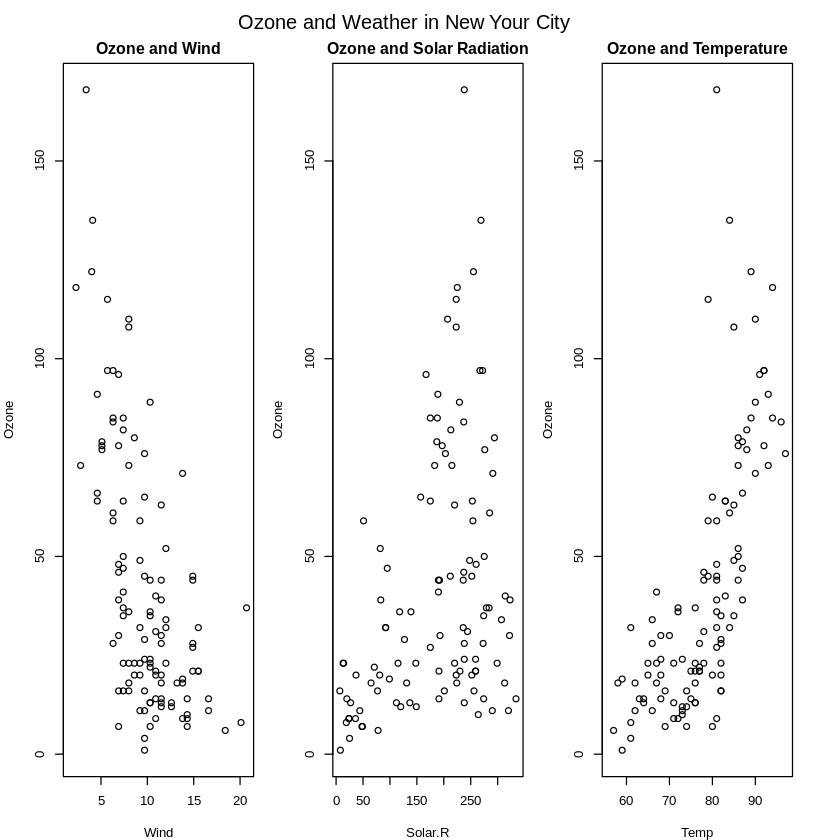

In [102]:
par(mfrow = c(1,3), mar = c(4,4,2,1), oma = c(0,0,2,2))
with(airquality,{
  plot(Wind, Ozone, main = "Ozone and Wind")
  plot(Solar.R, Ozone, main = "Ozone and Solar Radiation")
  plot(Temp, Ozone, main = "Ozone and Temperature")
  mtext("Ozone and Weather in New Your City", outer = TRUE)
})

#Plotting and Color in R

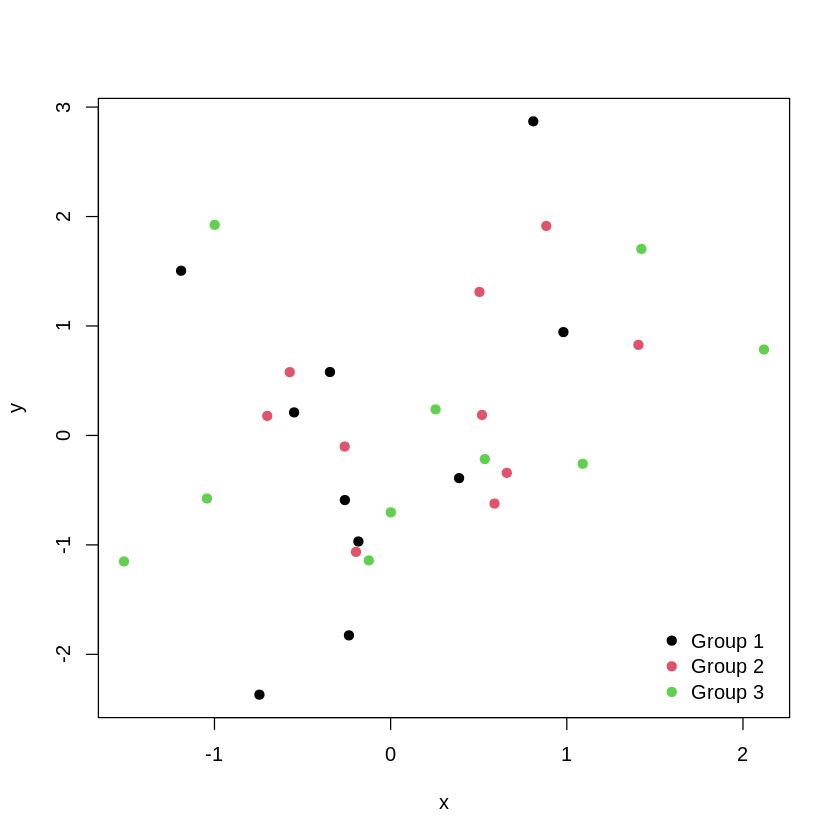

In [103]:
set.seed(19)

x <- rnorm(30)
y <- rnorm(30)

plot(x, y, col = rep(1:3, each = 10), pch = 19)
legend("bottomright", legend = paste("Group", 1:3), col = 1:3, pch = 19, bty = "n")

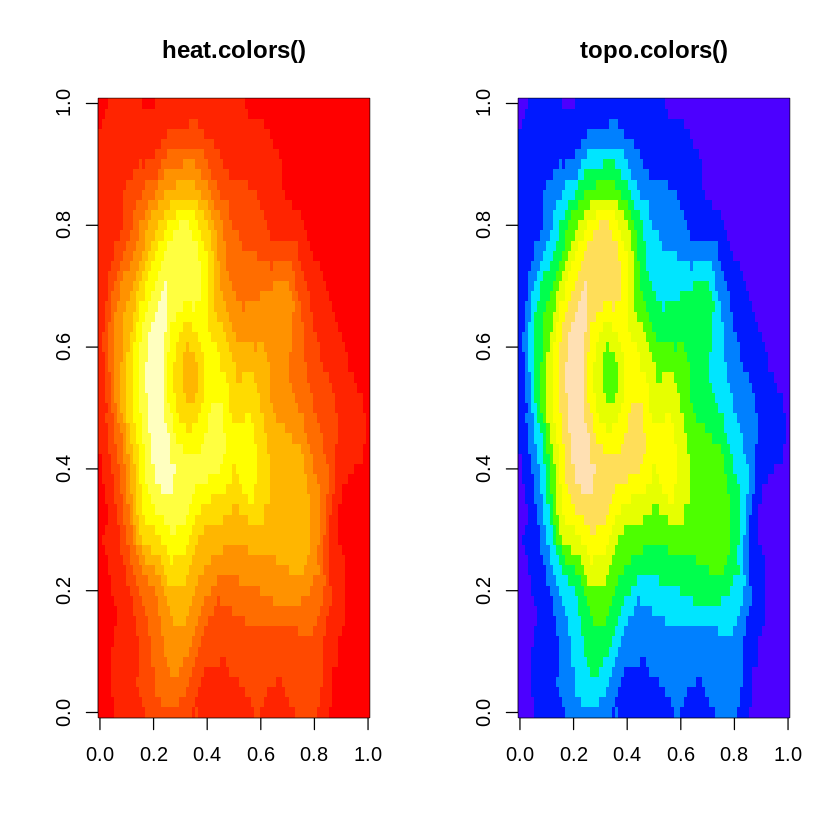

In [104]:
par(mfrow = c(1,2))
image(volcano, col = heat.colors(10), main = "heat.colors()")
image(volcano, col = topo.colors(10), main = "topo.colors()")

##colorRamp()

In [105]:
pal <- colorRamp(c("red", "blue"))
pal(0)

[,1] [,2] [,3]
[1,] 255  0    0

In [106]:
##blue

pal(1)

[,1] [,2] [,3]
[1,] 0    0    255

In [107]:
##purple-ish

pal(0.5)

[,1]  [,2] [,3] 
[1,] 127.5 0    127.5

In [108]:
pal(seq(0, 1, len = 10))

[,1]      [,2] [,3]     
 [1,] 255.00000 0      0.00000
 [2,] 226.66667 0     28.33333
 [3,] 198.33333 0     56.66667
 [4,] 170.00000 0     85.00000
 [5,] 141.66667 0    113.33333
 [6,] 113.33333 0    141.66667
 [7,]  85.00000 0    170.00000
 [8,]  56.66667 0    198.33333
 [9,]  28.33333 0    226.66667
[10,]   0.00000 0    255.00000

##colorRampPalette()

In [109]:
pal <- colorRampPalette(c("red","yellow"))

In [110]:
pal(2)

[1] "#FF0000" "#FFFF00"

In [111]:
#return 10 colors in between red and yellow

pal(10)

[1] "#FF0000" "#FF1C00" "#FF3800" "#FF5500" "#FF7100" "#FF8D00" "#FFAA00"
 [8] "#FFC600" "#FFE200" "#FFFF00"

In [112]:
rgb(0, 0, 234, maxColorValue = 255)

[1] "#0000EA"

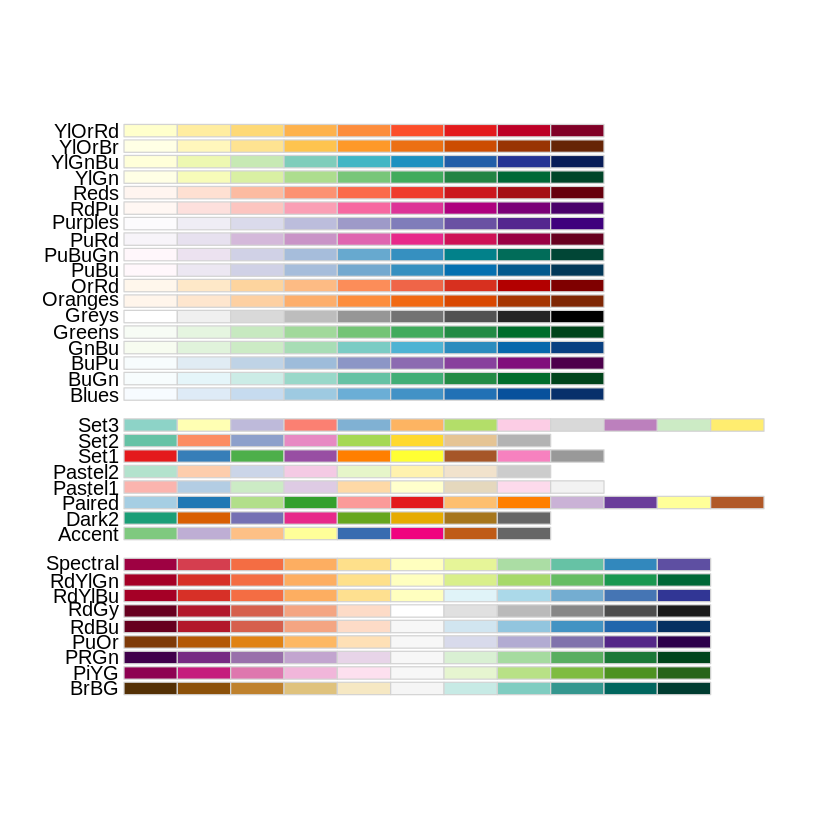

In [113]:
#RColorBrewer Package

library(RColorBrewer)
display.brewer.all()

In [114]:
##Using the RColorBrewer palettes

library(RColorBrewer)
cols <- brewer.pal(3, "BuGn")
cols

[1] "#E5F5F9" "#99D8C9" "#2CA25F"

In [115]:
pal <- colorRampPalette(cols)

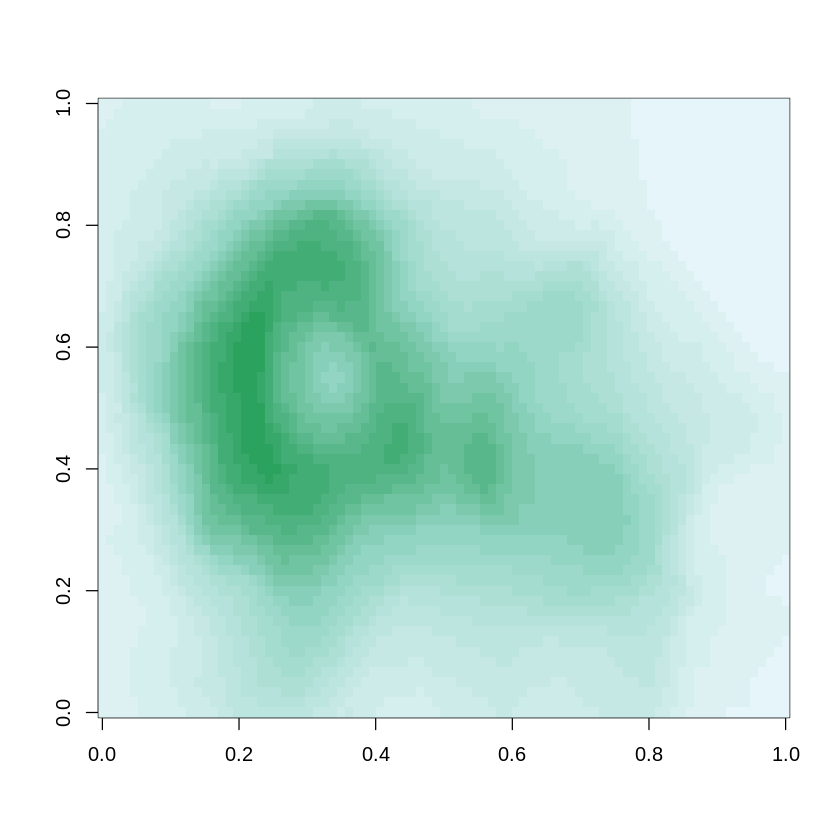

In [116]:
image(volcano, col = pal(20))

##The smoothScatter() Function

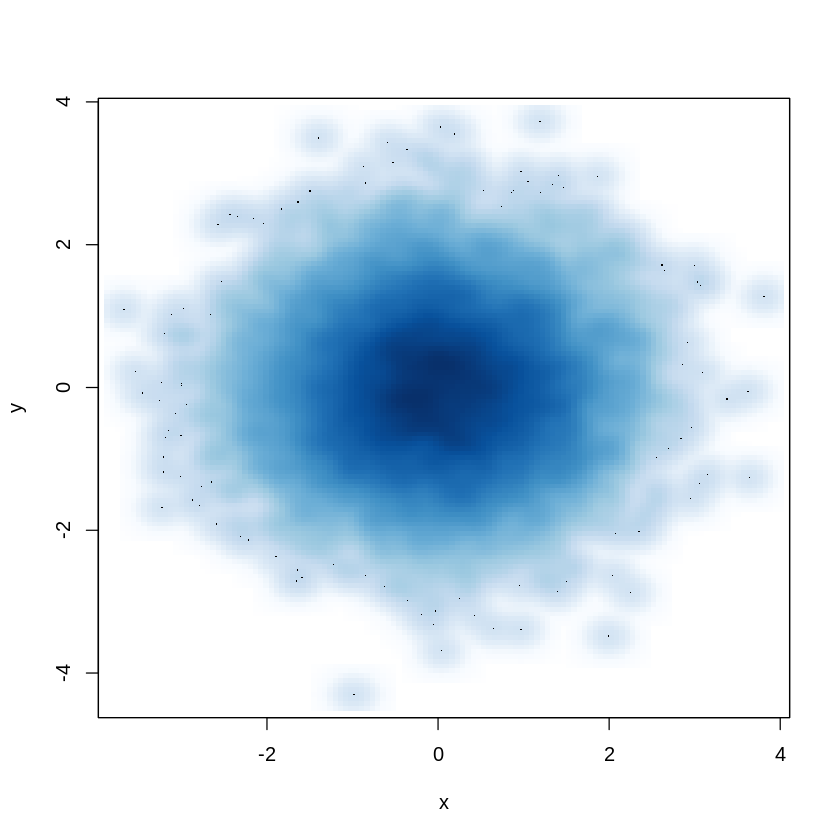

In [117]:
set.seed(1)
x <- rnorm(10000)
y <- rnorm(10000)

smoothScatter(x,y)

##Adding transparency

In [118]:
rgb(1, 0, 0, 0.1)

[1] "#FF00001A"

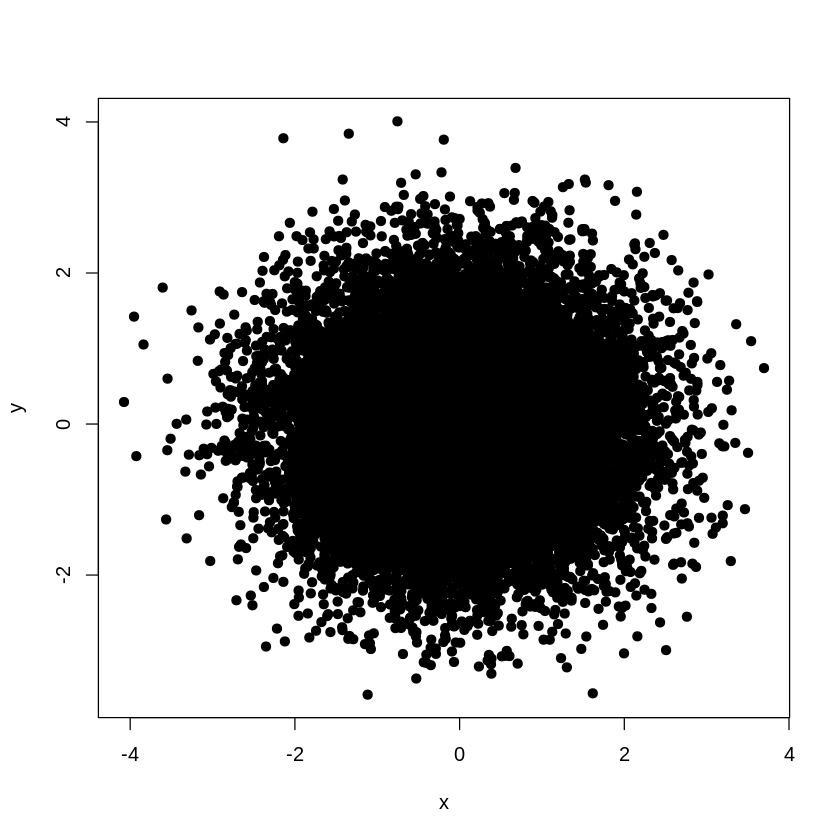

In [119]:
set.seed(2)
x <- rnorm(20000)
y <- rnorm(20000)

plot(x, y, pch = 19)

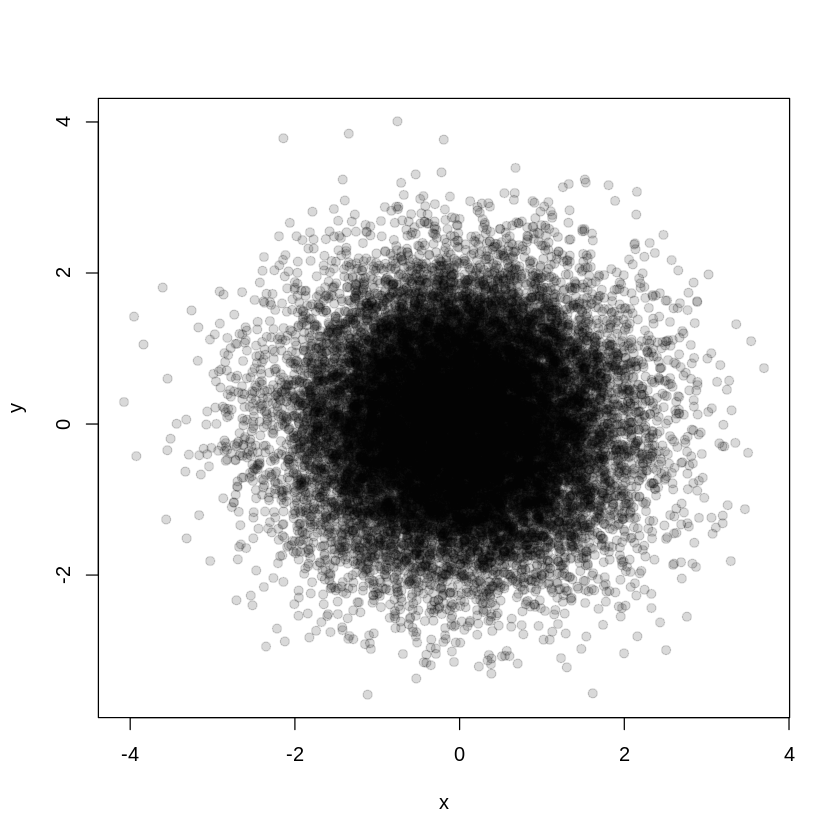

In [120]:
plot(x, y, pch = 19, col = rgb(0,0,0,0.15))

#Hierarichal Clustering

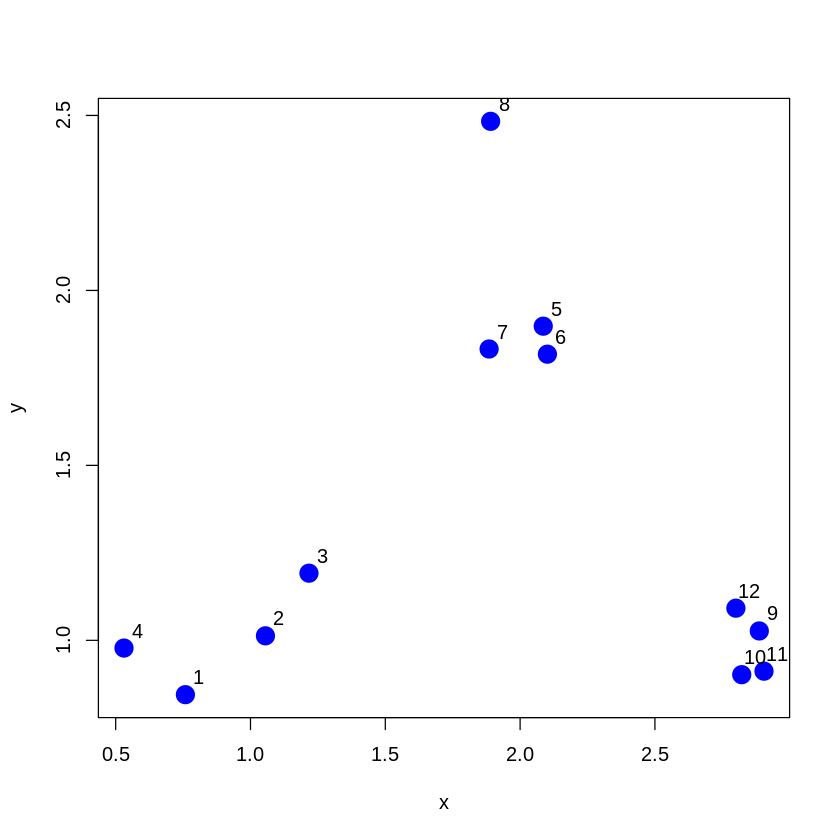

In [121]:
set.seed(1234)
x <- rnorm(12, rep(1:3, each = 4), 0.2)
y <- rnorm(12, rep(c(1,2,1), each=4), 0.2)

plot(x, y, col = "blue", pch = 19, cex = 2)
text(x + 0.05, y + 0.05, labels = as.character(1:12))

In [122]:
dataFrame <- data.frame(x=x, y=y)
dist(dataFrame)

            1          2          3          4          5          6          7
2  0.34120511                                                                  
3  0.57493739 0.24102750                                                       
4  0.26381786 0.52578819 0.71861759                                            
5  1.69424700 1.35818182 1.11952883 1.80666768                                 
6  1.65812902 1.31960442 1.08338841 1.78081321 0.08150268                      
7  1.49823399 1.16620981 0.92568723 1.60131659 0.21110433 0.21666557           
8  1.99149025 1.69093111 1.45648906 2.02849490 0.61704200 0.69791931 0.65062566
9  2.13629539 1.83167669 1.67835968 2.35675598 1.18349654 1.11500116 1.28582631
10 2.06419586 1.76999236 1.63109790 2.29239480 1.23847877 1.16550201 1.32063059
11 2.14702468 1.85183204 1.71074417 2.37461984 1.28153948 1.21077373 1.37369662
12 2.05664233 1.74662555 1.58658782 2.27232243 1.07700974 1.00777231 1.17740375
            8          9         10     

In [123]:
rdistxy <-as.matrix(dist(dataFrame))

 ##Removethediagonalfromconsideration
 diag(rdistxy)<-diag(rdistxy) +100000

 #Findtheindexofthepointswith minimumdistance
 ind <-which(rdistxy ==min(rdistxy),arr.ind =TRUE)
 ind

row col
6 6   5  
5 5   6

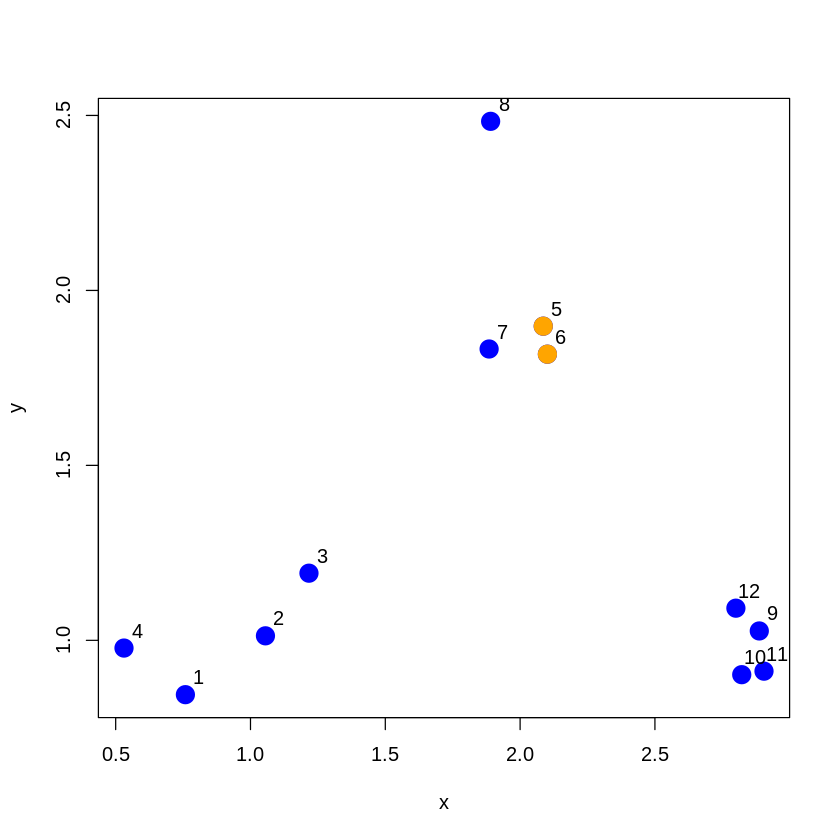

In [124]:
plot(x, y, col = "blue", pch = 19, cex = 2)
text(x + 0.05, y + 0.05, labels = as.character(1:12))
points(x[ind[1,]], y[ind[1,]], col = "orange", pch = 19, cex = 2)

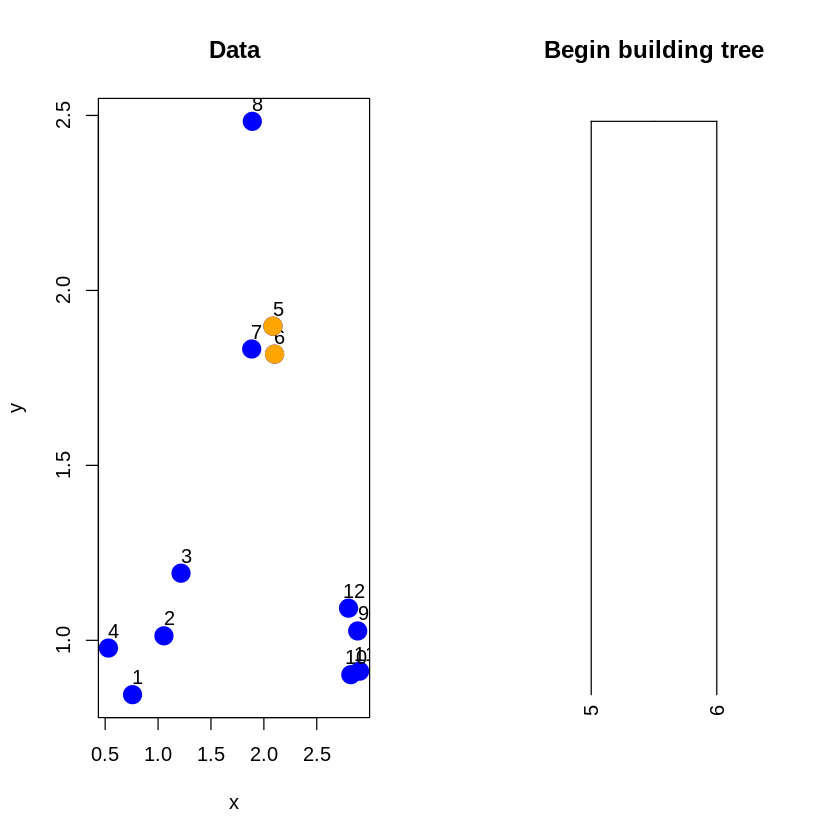

In [125]:
par(mfrow = c(1,2))
plot(x,y, col = "blue", pch = 19, cex = 2, main = "Data")
text(x + 0.05, y + 0.05, labels = as.character(1:12))
points(x[ind[1,]], y[ind[1,]], col = "orange", pch = 19, cex = 2)

#make a cluster and cute it
library(dplyr)
hcluster <- dist(dataFrame) %>% hclust
dendro <- as.dendrogram(hcluster)
cutDendro <- cut(dendro, h = (hcluster$height[1] + 0.00001))
plot(cutDendro$lower[[11]], yaxt = "n", main = "Begin building tree")

In [126]:
nextmin <- rdistxy[order(rdistxy)][3]
ind <- which(rdistxy == nextmin, arr.ind = TRUE)
ind

row col
11 11  10 
10 10  11

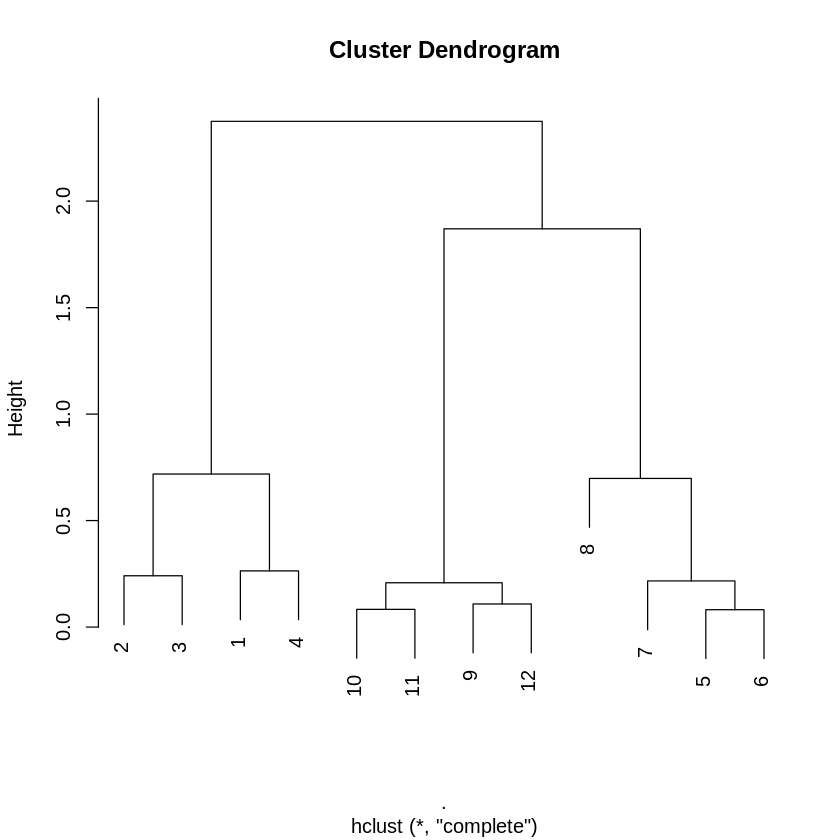

In [127]:
hClustering <- data.frame(x=x, y=y) %>% dist %>% hclust
plot(hClustering)

##heatmap() function

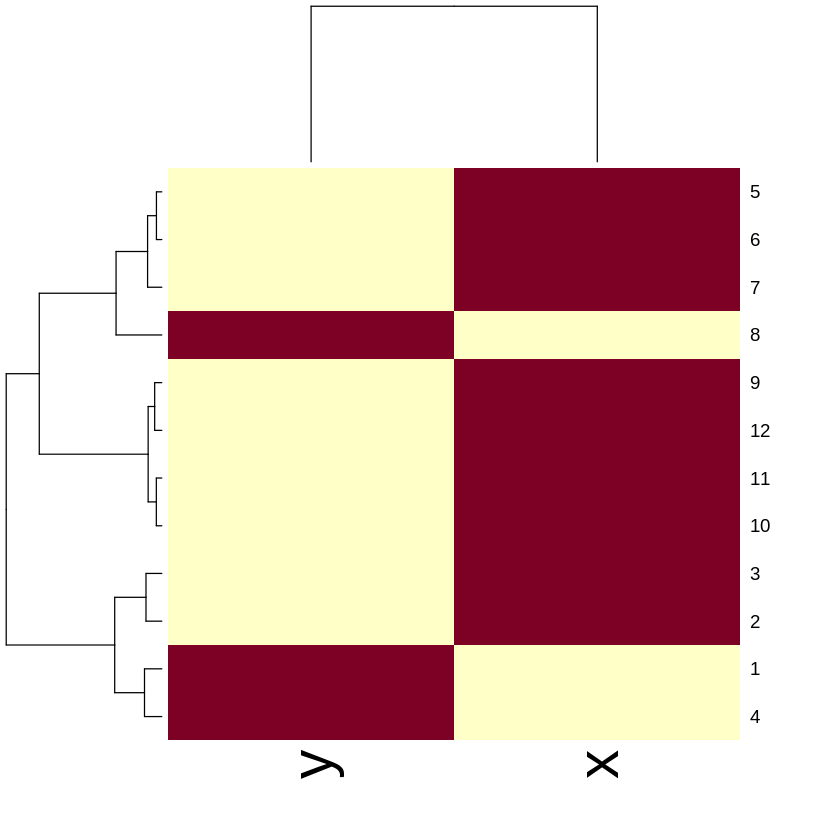

In [128]:
dataMatrix <- data.frame(x=x, y=y) %>% data.matrix
heatmap(dataMatrix)

##k-Means Clustering

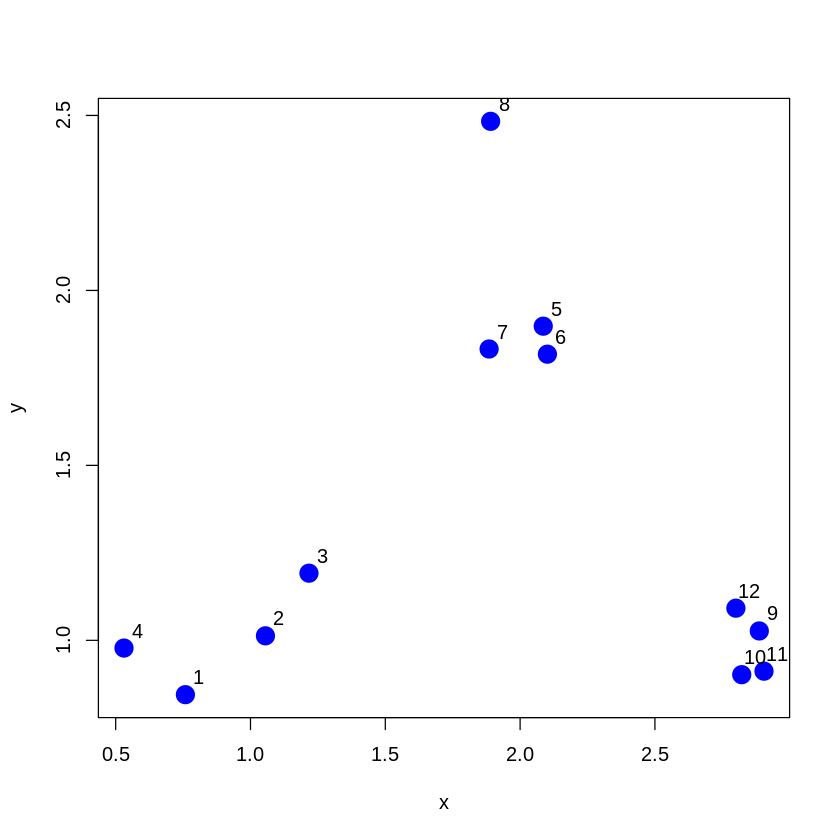

In [129]:
set.seed(1234)
x <- rnorm(12, mean = rep(1:3, each = 4), sd = 0.2)
y <- rnorm(12, mean = rep(c(1,2,1),each = 4), sd = 0.2)
plot(x,y, col = "blue", pch = 19, cex = 2)
text(x + 0.05, y + 0.05, labels = as.character(1:12))

##Using the kmeans() function

In [130]:
dataFrame <- data.frame(x,y)
kmeansObj <- kmeans(dataFrame, centers = 3)
names(kmeansObj)

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"

In [131]:
kmeansObj$cluster

[1] 3 3 3 3 1 1 1 1 2 2 2 2

In [132]:
set.seed(1234)
dataMatrix <- as.matrix(dataFrame)[sample(1:12), ]
kmeansObj <- kmeans(dataMatrix, centers = 3)

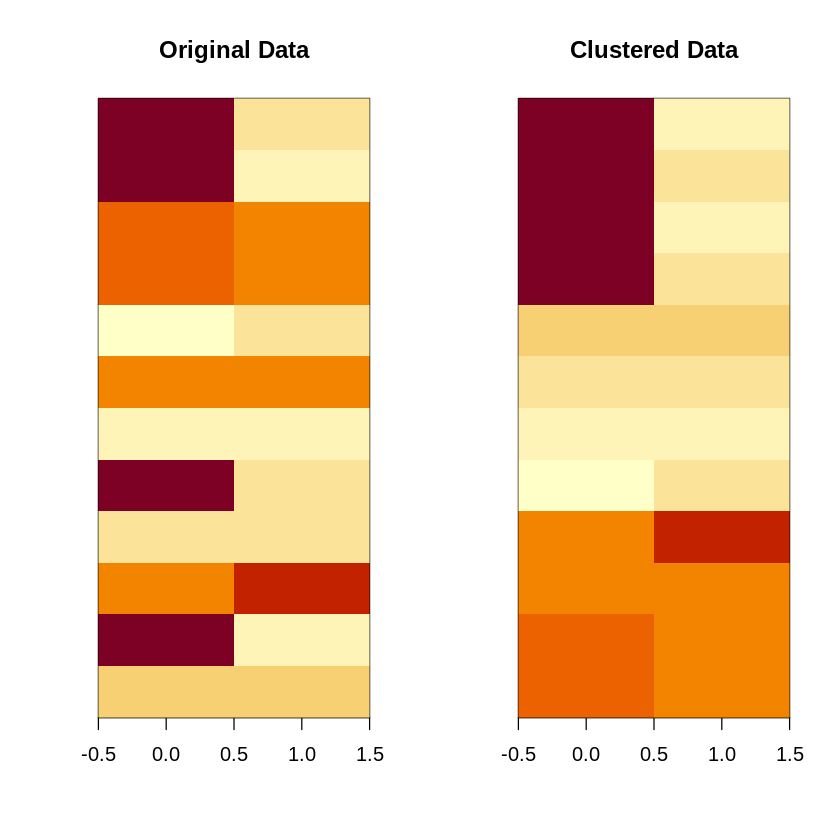

In [133]:
par(mfrow = c(1,2))
image(t(dataMatrix)[, nrow(dataMatrix):1], yaxt = "n", main="Original Data")
image(t(dataMatrix)[, order(kmeansObj$cluster)], yaxt = "n", main = "Clustered Data")

#Dimension Reduction

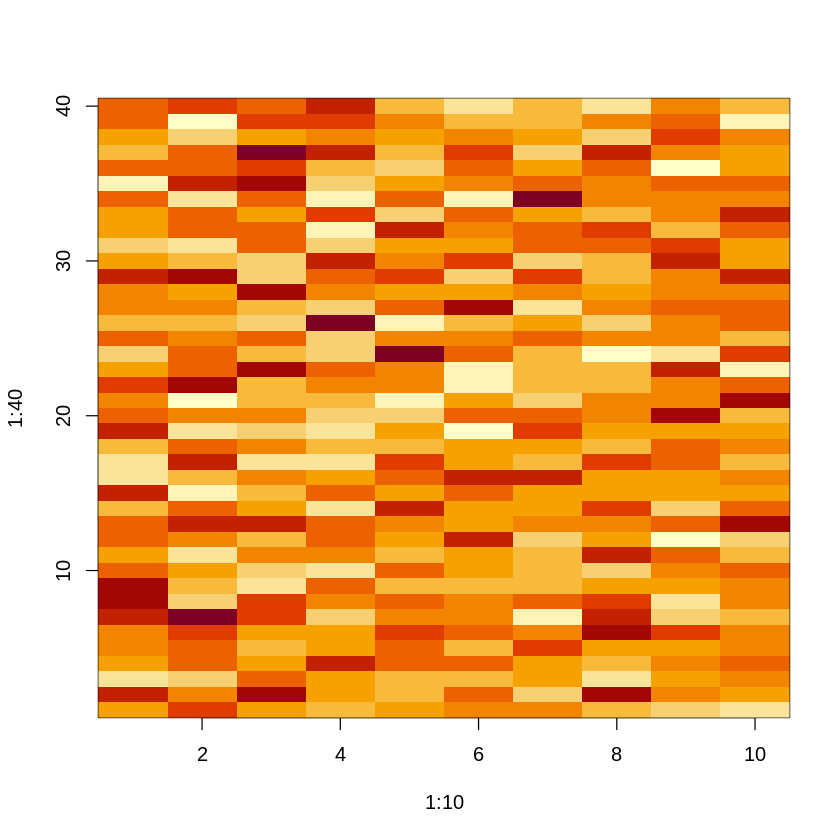

In [134]:
set.seed(12345)
dataMatrix <- matrix(rnorm(400), nrow = 40)
image(1:10, 1:40, t(dataMatrix)[, nrow(dataMatrix):1])

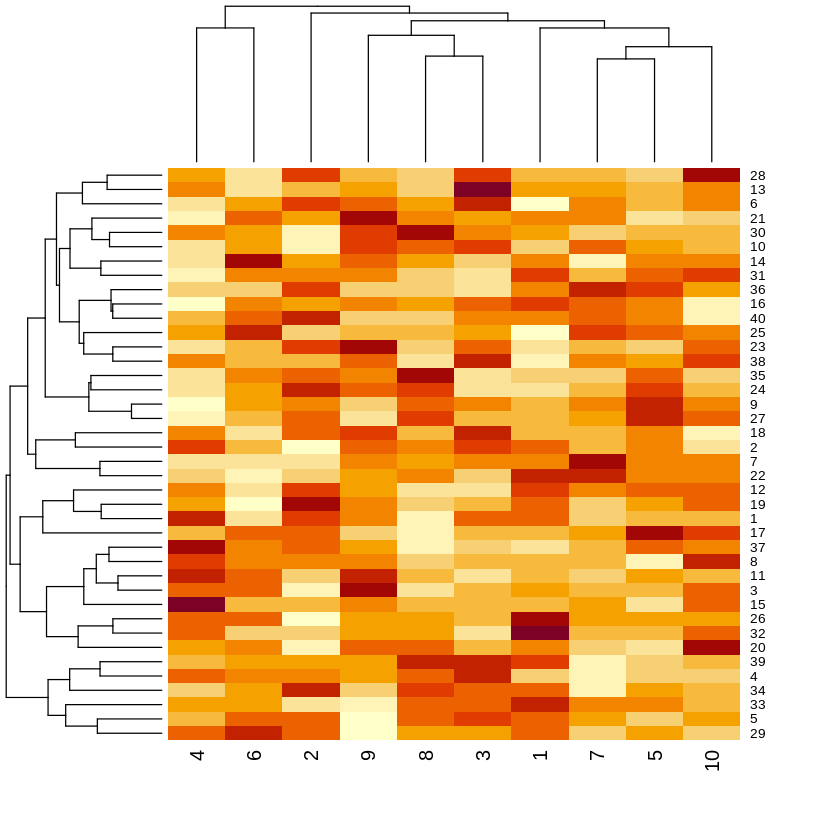

In [135]:
heatmap(dataMatrix)

In [136]:
#heatmap of matrix data

set.seed(678910)
for(i in 1:40){
  coinFlip <- rbinom(1, size = 1, prob = 0.5)

  ##If coin is heads add a common pattern to that row
  if (coinFlip){
    dataMatrix[i,] <- dataMatrix[i,] + rep(c(0,3), each = 5)
  }
}

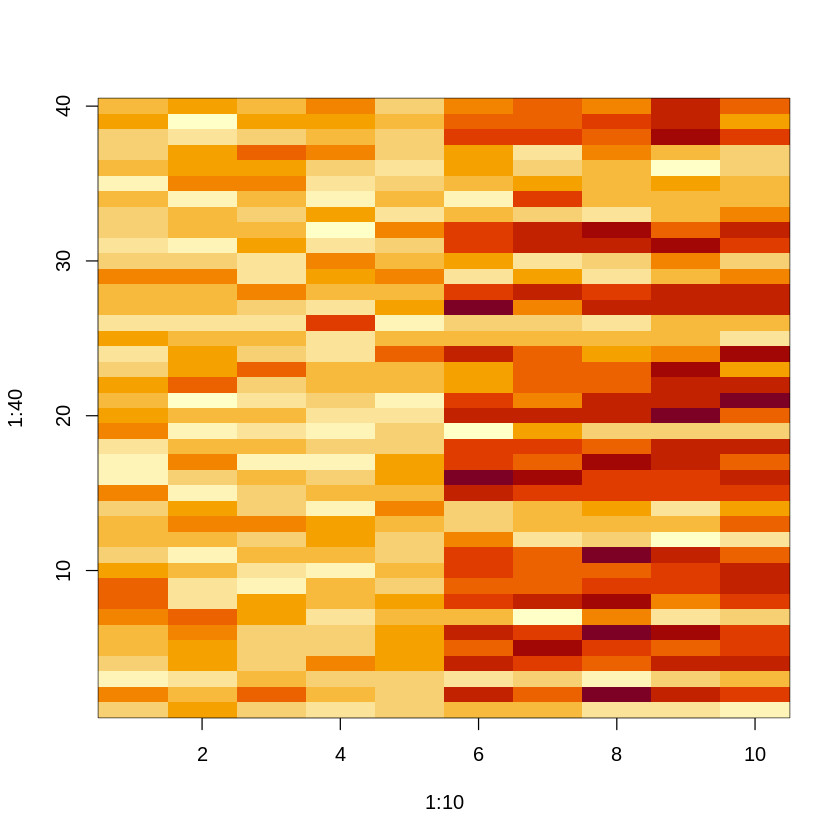

In [137]:
image(1:10, 1:40, t(dataMatrix)[, nrow(dataMatrix):1])

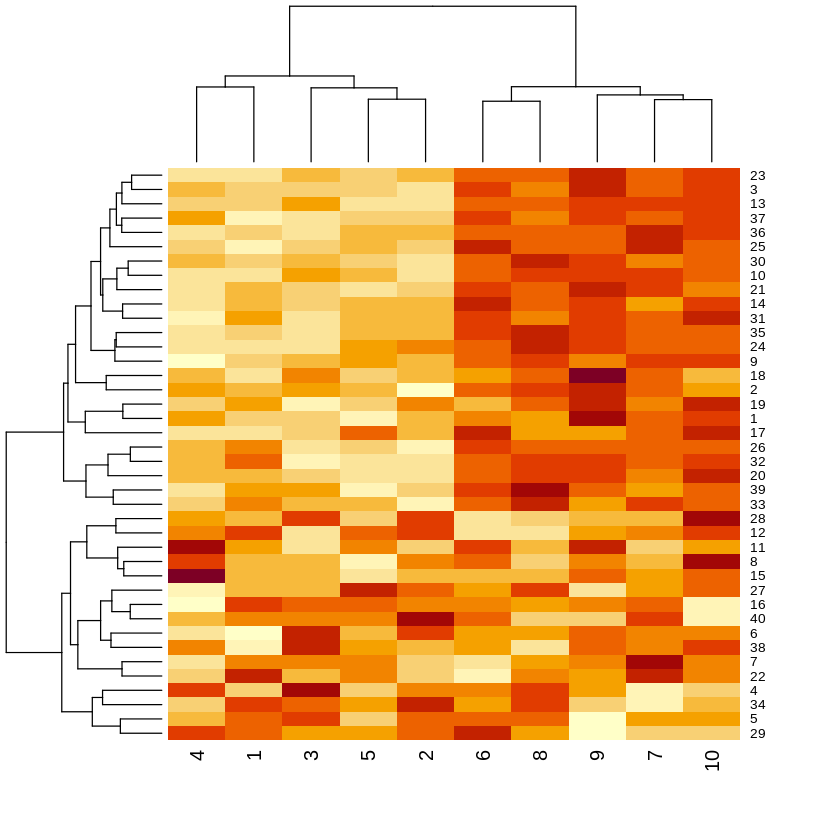

In [138]:
heatmap(dataMatrix)

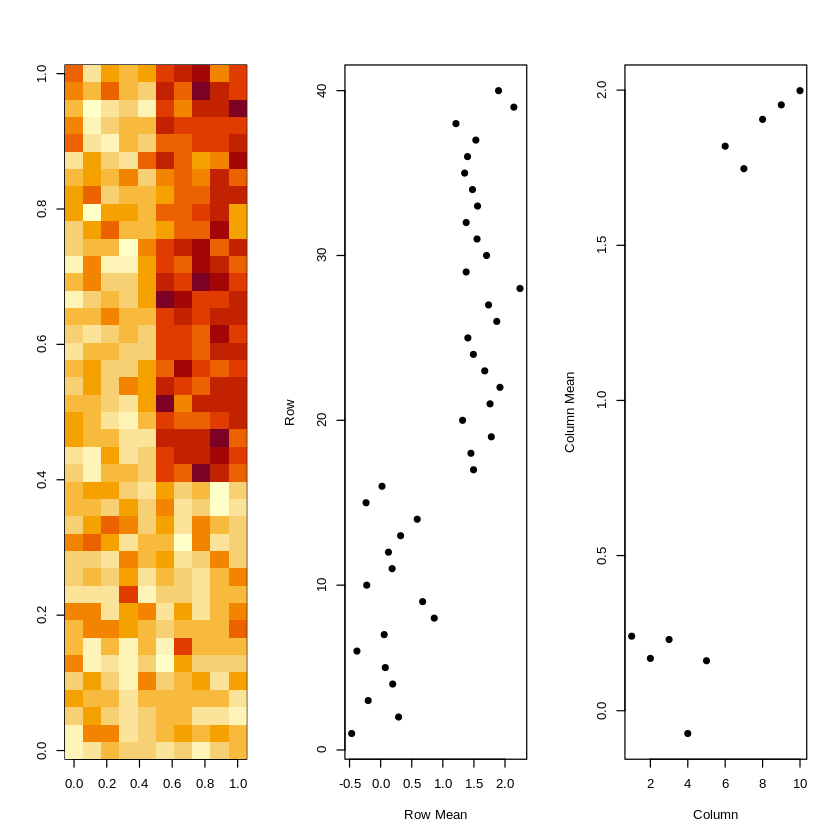

In [139]:
library(dplyr)
hh <- dist(dataMatrix) %>% hclust
dataMatrixOrdered <- dataMatrix[hh$order,]
par(mfrow = c(1,3))

##Complete data
image(t(dataMatrixOrdered)[, nrow(dataMatrixOrdered):1])

##show the row means
plot(rowMeans(dataMatrixOrdered), 40:1, xlab = "Row Mean", ylab = "Row", pch = 19)

##Show the column means
plot(colMeans(dataMatrixOrdered), xlab = "Column", ylab = "Column Mean", pch = 19)

In [140]:
svd1 <- svd(scale(dataMatrixOrdered))

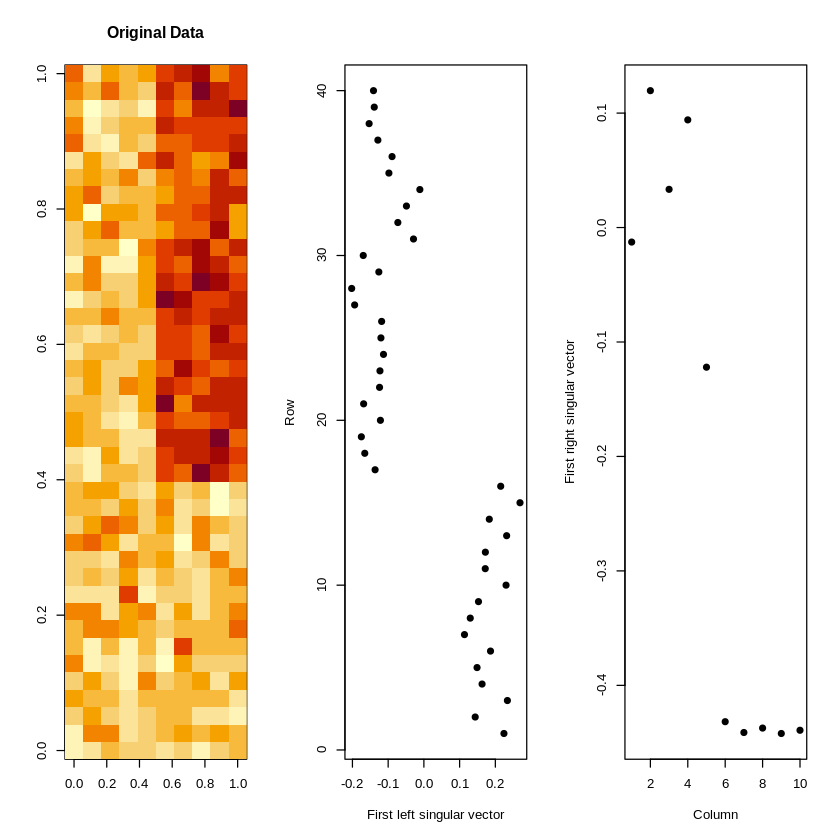

In [141]:
par(mfrow = c(1,3))
image(t(dataMatrixOrdered)[, nrow(dataMatrixOrdered):1], main = "Original Data")
plot(svd1$u[, 1], 40:1, ylab = "Row", xlab = "First left singular vector", pch = 19)
plot(svd1$v[, 1], xlab = "Column", ylab = "First right singular vector", pch = 19)

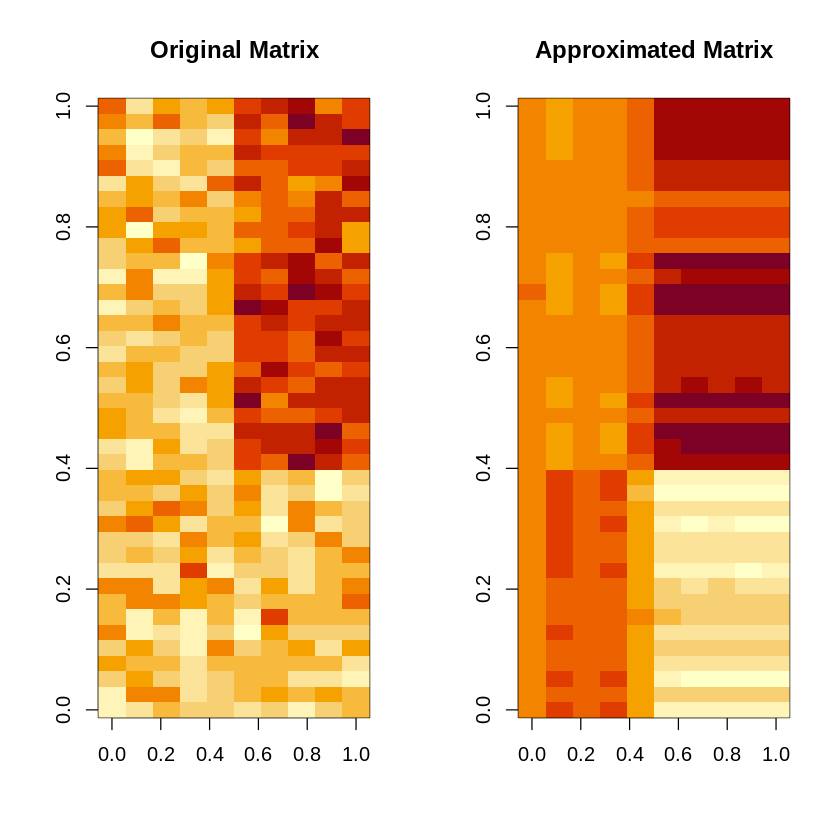

In [142]:
#matrix compression

##Approximate oroginal data with outer product of first singular vectors
approx <- with(svd1, outer(u[, 1], v[, 1]))

##Plot original data and approximate data
par(mfrow = c(1,2))
image(t(dataMatrixOrdered)[, nrow(dataMatrixOrdered):1], main = "Original Matrix")
image(t(approx)[, nrow(approx):1], main = "Approximated Matrix")

##Components of the SVD

In [143]:
constantMatrix <- dataMatrixOrdered * 0
for(i in 1:dim(dataMatrixOrdered)[1]){
  constantMatrix[i, ] <- rep(c(0,1), each=5)
}

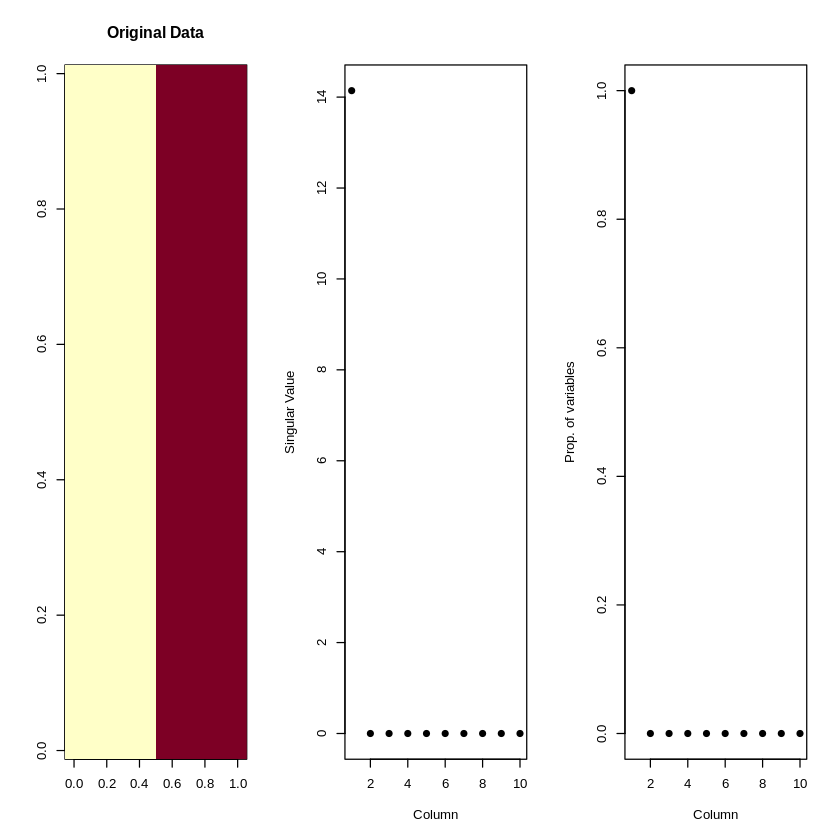

In [145]:
svd1 <- svd(constantMatrix)
par(mfrow = c(1,3))
image(t(constantMatrix)[, nrow(constantMatrix):1], main = "Original Data")
plot(svd1$d, xlab = "Column", ylab = "Singular Value", pch = 19)
plot(svd1$d^2/sum(svd1$d^2),xlab = "Column", ylab = "Prop. of variables", pch = 19)

##Relationship to principal components

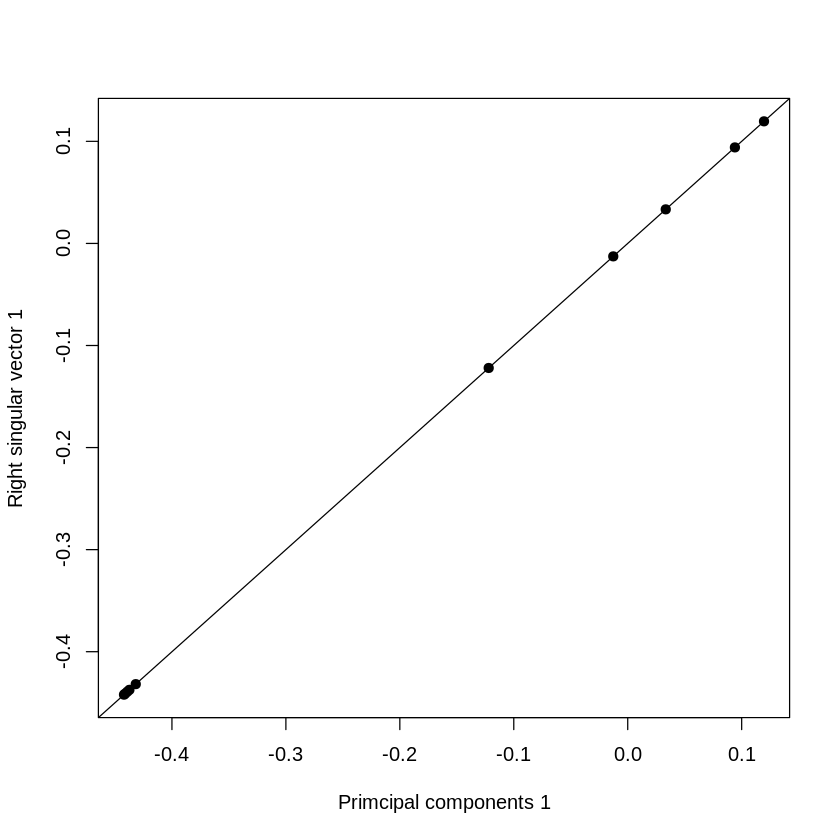

In [147]:
svd1 <- svd(scale(dataMatrixOrdered))
pca1 <- prcomp(dataMatrixOrdered, scale = TRUE)
plot(pca1$rotation[, 1], svd1$v[, 1], pch = 19, xlab="Primcipal components 1",ylab = "Right singular vector 1")
abline(c(0,1))

In [148]:
##Add a second pattern
set.seed(678910)

for(i in 1:40){
  coinFlip1 <- rbinom(1, size = 1, prob = 0.5)
  coinFlip2 <- rbinom(1, size = 1, prob = 0.5)
  if(coinFlip1){
    ##pattern 1
    dataMatrix[i, ] <- dataMatrix[i, ] + rep(c(0,5), each = 5)
  }
  if(coinFlip2){
    ##pattern 2
    dataMatrix[i, ] <- dataMatrix[i, ] + rep(c(0,5), 5)
  }
}

hh <- hclust(dist(dataMatrix))
dataMatrixOrdered <- dataMatrix[hh$order, ]

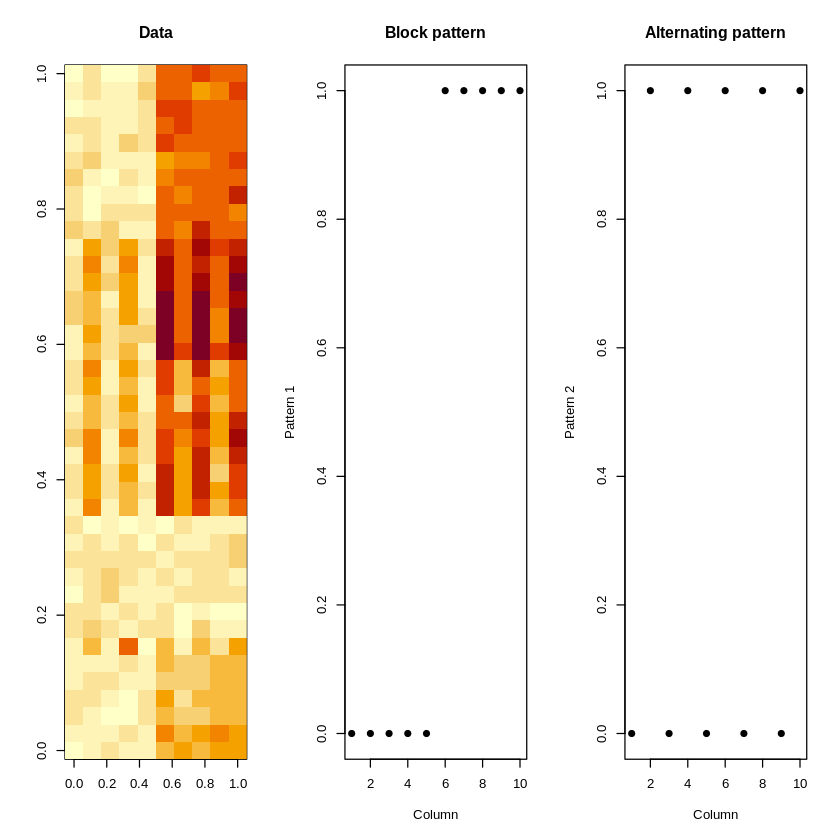

In [149]:
svd2 <- svd(scale(dataMatrixOrdered))
par(mfrow = c(1, 3))
image(t(dataMatrixOrdered)[, nrow(dataMatrixOrdered):1], main = "Data")
plot(rep(c(0, 1), each = 5), pch = 19, xlab = "Column", ylab = "Pattern 1", main = "Block pattern")
plot(rep(c(0, 1), 5), pch = 19, xlab = "Column", ylab = "Pattern 2", main = "Alternating pattern")

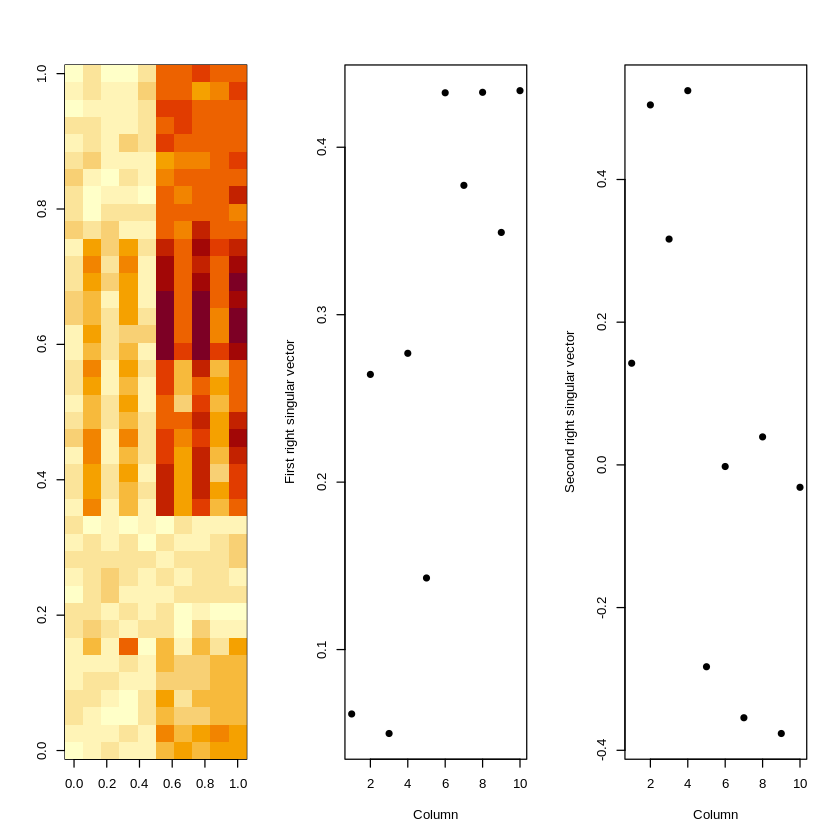

In [150]:
svd2 <- svd(scale(dataMatrixOrdered))
par(mfrow = c(1, 3))
image(t(dataMatrixOrdered)[, nrow(dataMatrixOrdered):1])
plot(svd2$v[, 1], pch = 19, xlab = "Column", ylab = "First right singular vector")
plot(svd2$v[, 2], pch = 19, xlab = "Column", ylab = "Second right singular vector")

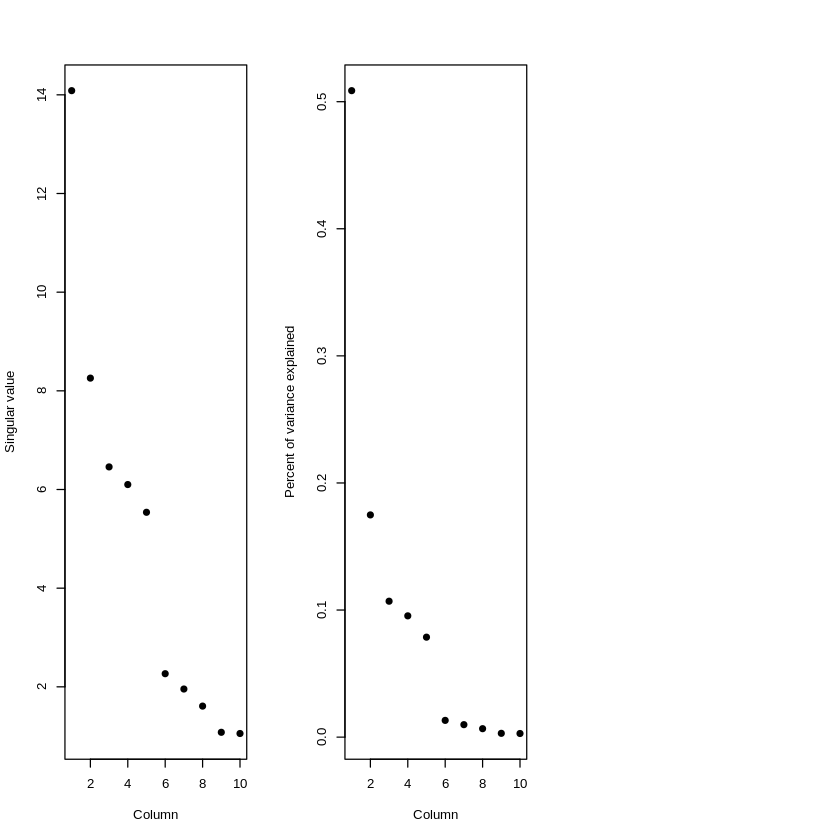

In [154]:
svd2 <- svd(scale(dataMatrixOrdered))
par(mfrow = c(1,3))

plot(svd2$d, xlab = "Column", ylab = "Singular value", pch = 19)
plot(svd2$d^2/sum(svd2$d^2), pch = 19, xlab = "Column", ylab = "Percent of variance explained")

#ggplot2 Plotting System

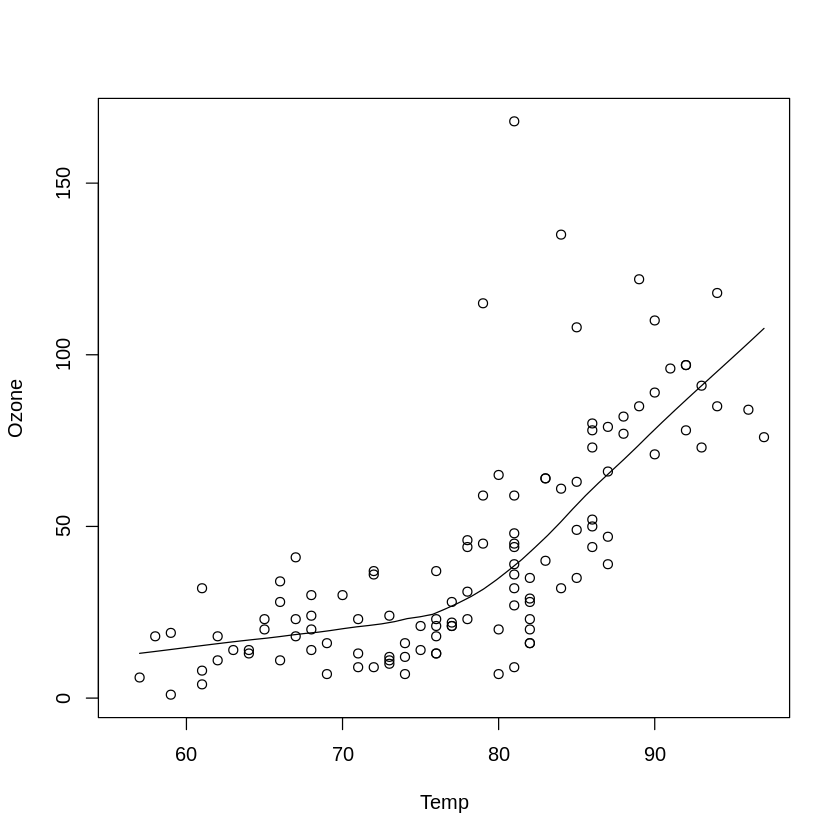

In [164]:
with(airquality,{
  plot(Temp, Ozone)
  lines(loess.smooth(Temp, Ozone))
})

In [165]:
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [166]:
library(ggplot2)

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 37 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“Removed 37 rows containing missing values or values outside the scale range
(`geom_point()`).”


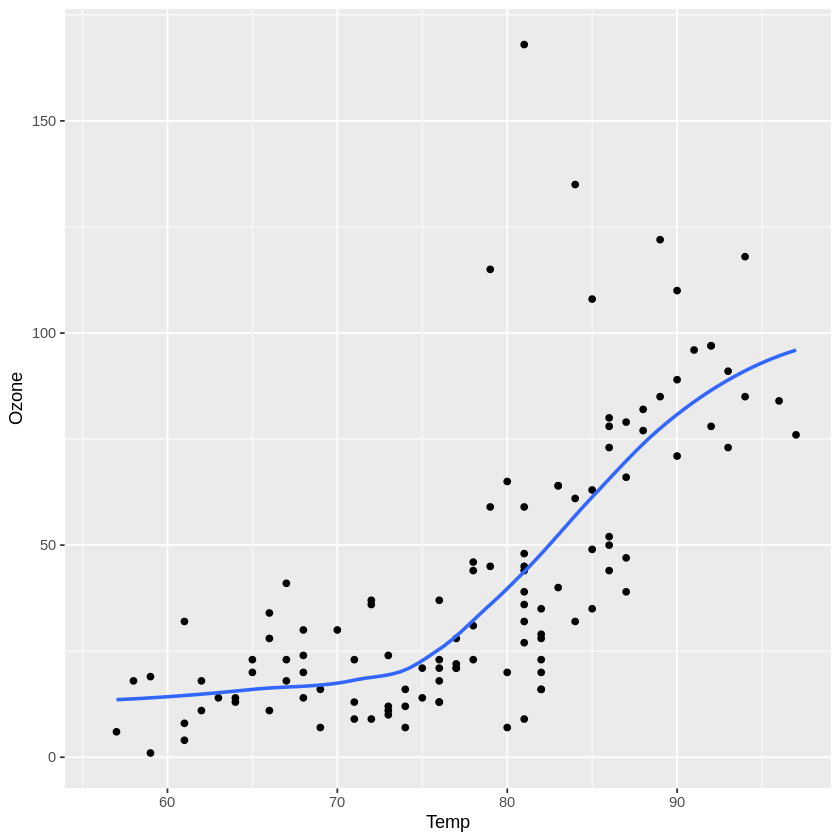

In [168]:
ggplot(airquality, aes(Temp, Ozone)) +
  geom_point() +
  geom_smooth(method = "loess", se = FALSE)

In [169]:
str(mpg)

tibble [234 × 11] (S3: tbl_df/tbl/data.frame)
 $ manufacturer: chr [1:234] "audi" "audi" "audi" "audi" ...
 $ model       : chr [1:234] "a4" "a4" "a4" "a4" ...
 $ displ       : num [1:234] 1.8 1.8 2 2 2.8 2.8 3.1 1.8 1.8 2 ...
 $ year        : int [1:234] 1999 1999 2008 2008 1999 1999 2008 1999 1999 2008 ...
 $ cyl         : int [1:234] 4 4 4 4 6 6 6 4 4 4 ...
 $ trans       : chr [1:234] "auto(l5)" "manual(m5)" "manual(m6)" "auto(av)" ...
 $ drv         : chr [1:234] "f" "f" "f" "f" ...
 $ cty         : int [1:234] 18 21 20 21 16 18 18 18 16 20 ...
 $ hwy         : int [1:234] 29 29 31 30 26 26 27 26 25 28 ...
 $ fl          : chr [1:234] "p" "p" "p" "p" ...
 $ class       : chr [1:234] "compact" "compact" "compact" "compact" ...


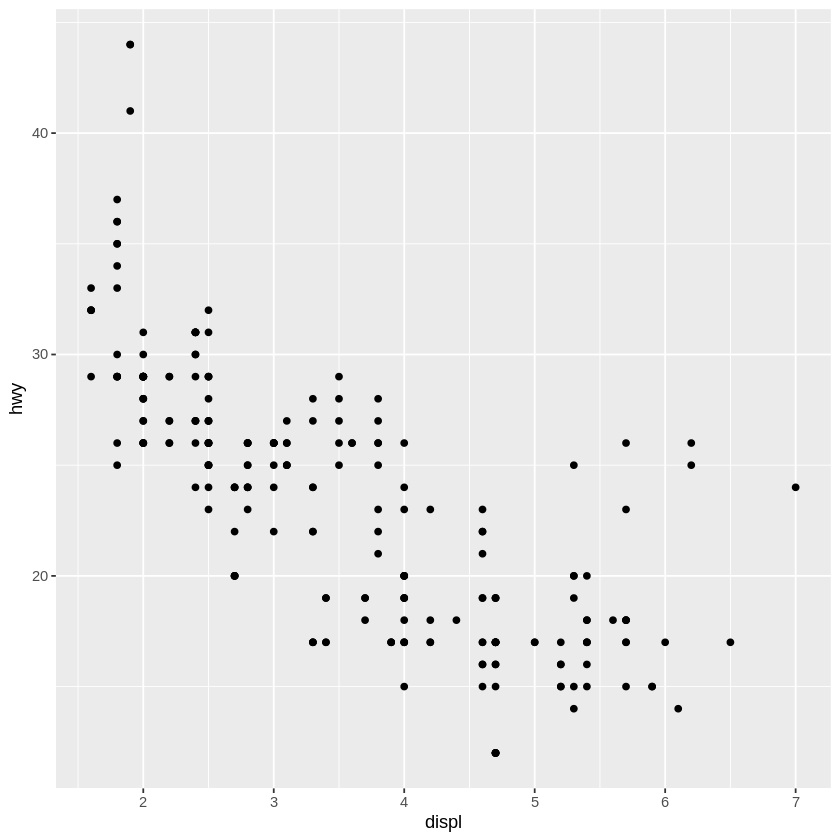

In [170]:
qplot(displ, hwy, data = mpg)

##Modifying aesthetics

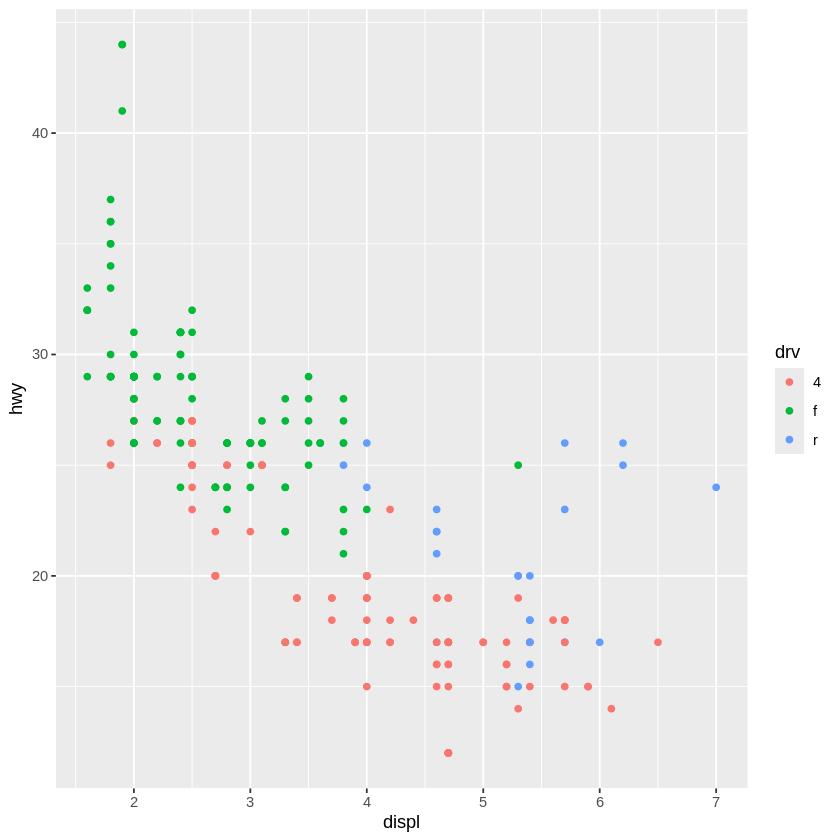

In [171]:
qplot(displ, hwy, data = mpg, color = drv)

##Adding a geom

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


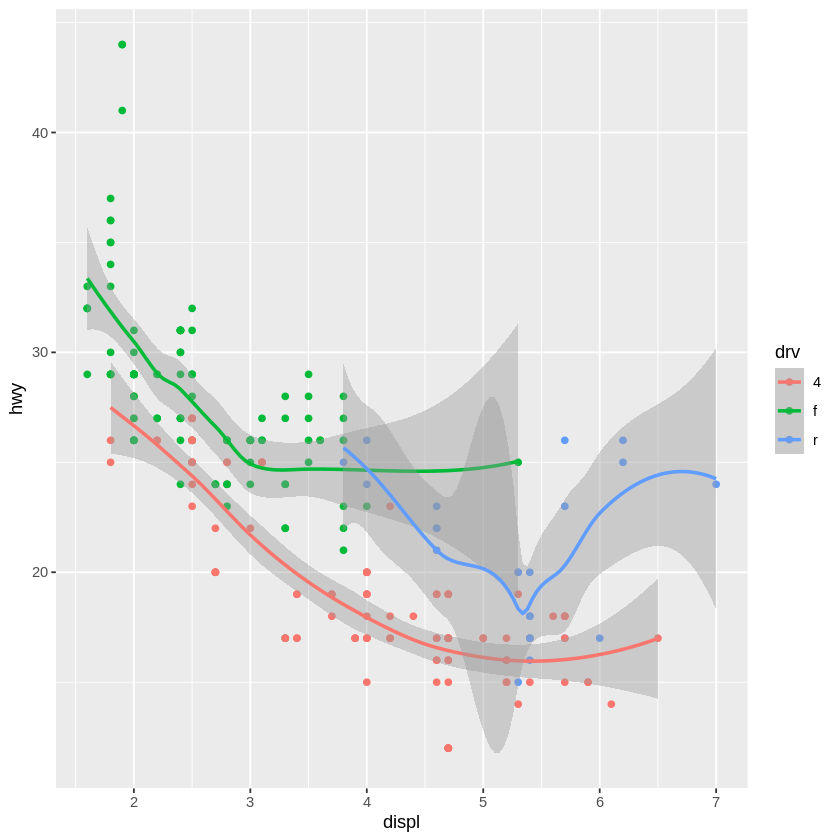

In [173]:
qplot(displ, hwy, data = mpg, color = drv, geom = c("point", "smooth"))

##Histograms

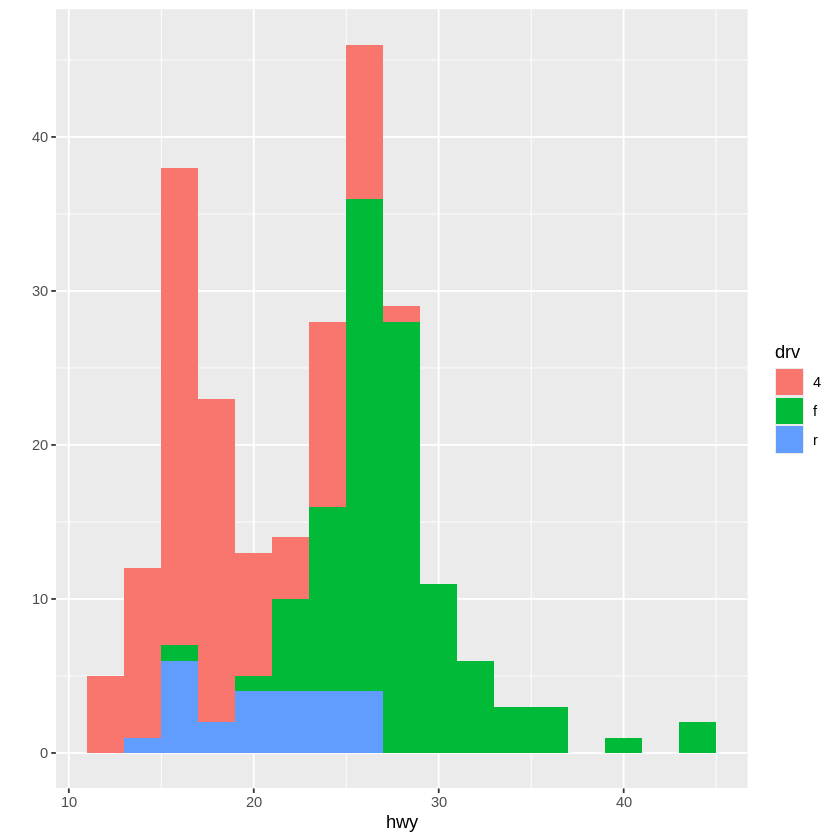

In [174]:
qplot(hwy, data = mpg, fill = drv, binwidth =2)

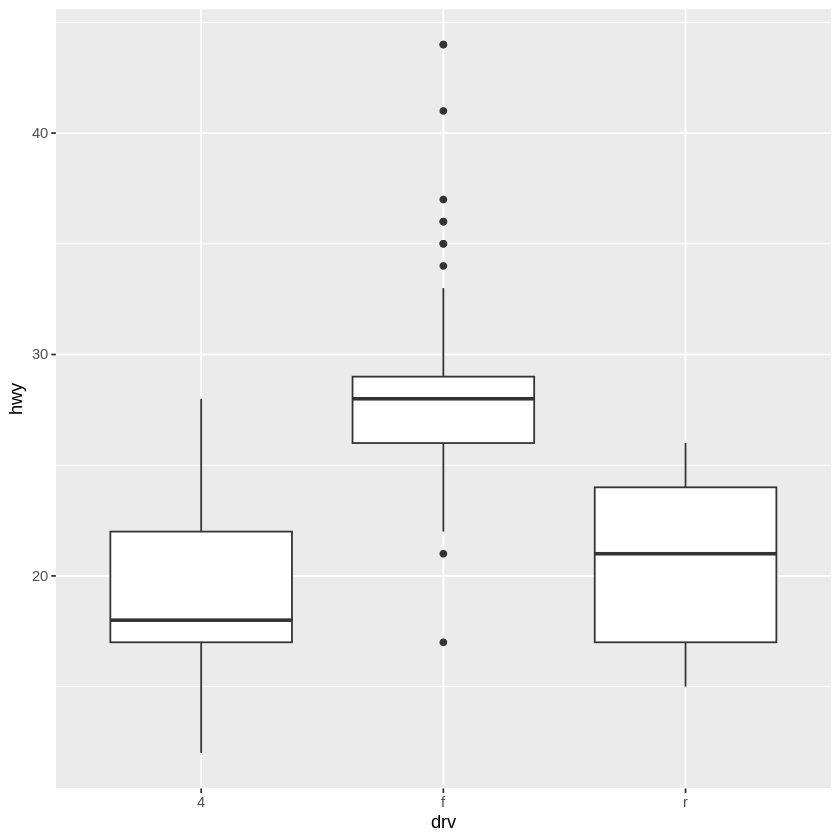

In [175]:
qplot(drv, hwy, data = mpg, geom = "boxplot")

##Facets

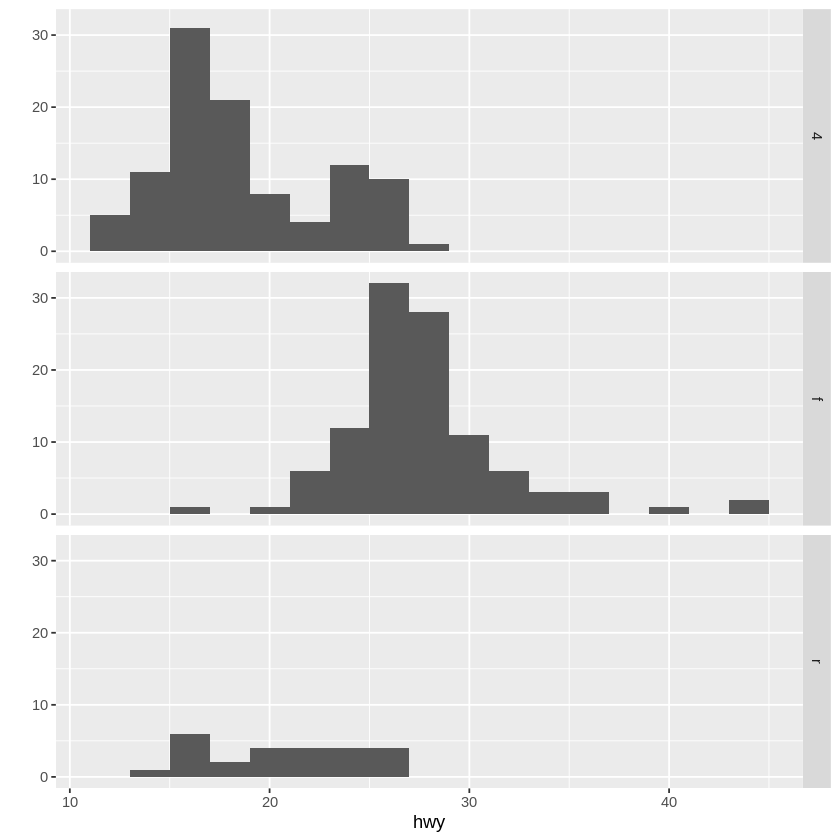

In [176]:
qplot(hwy, data = mpg, facets = drv ~ ., binwidth = 2)

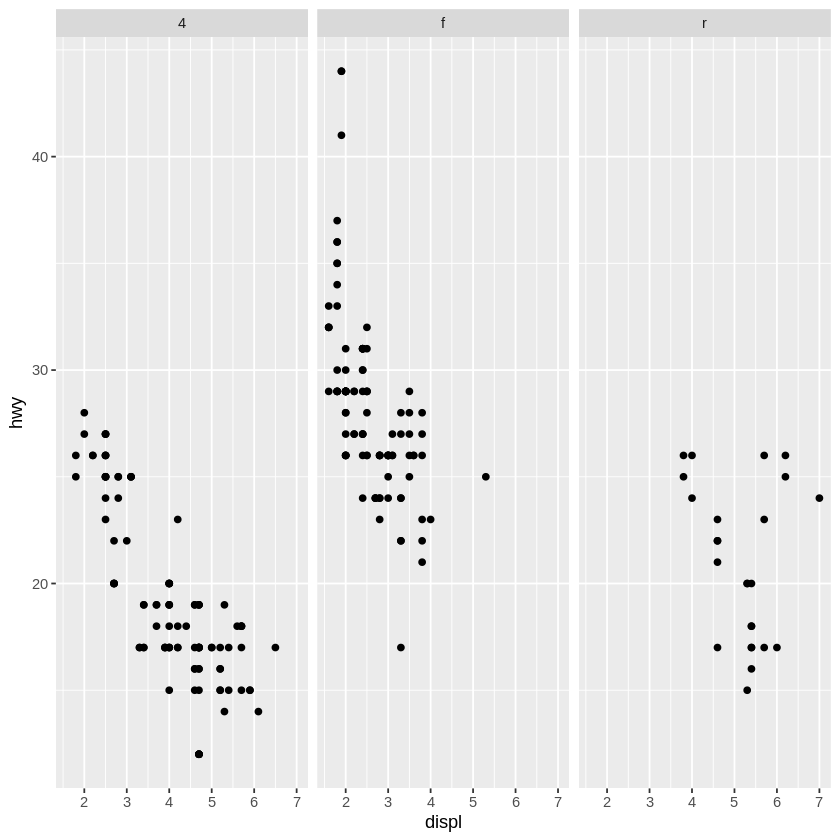

In [177]:
qplot(displ, hwy, data = mpg, facets = . ~ drv)

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


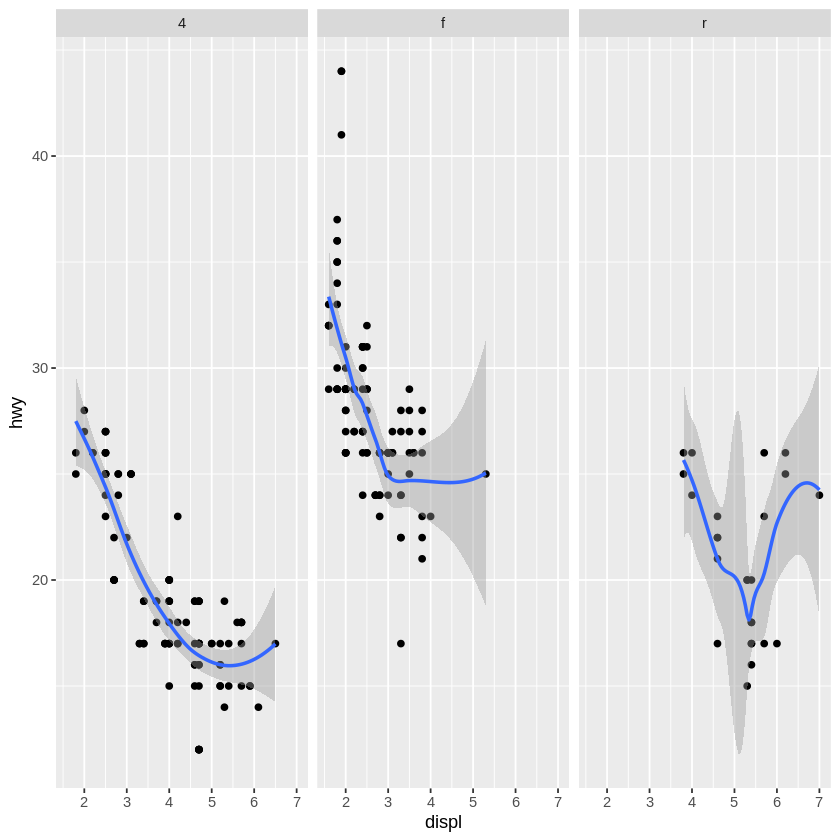

In [178]:
##add the smother as another geom

qplot(displ, hwy, data = mpg, facets = . ~ drv) + geom_smooth()

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


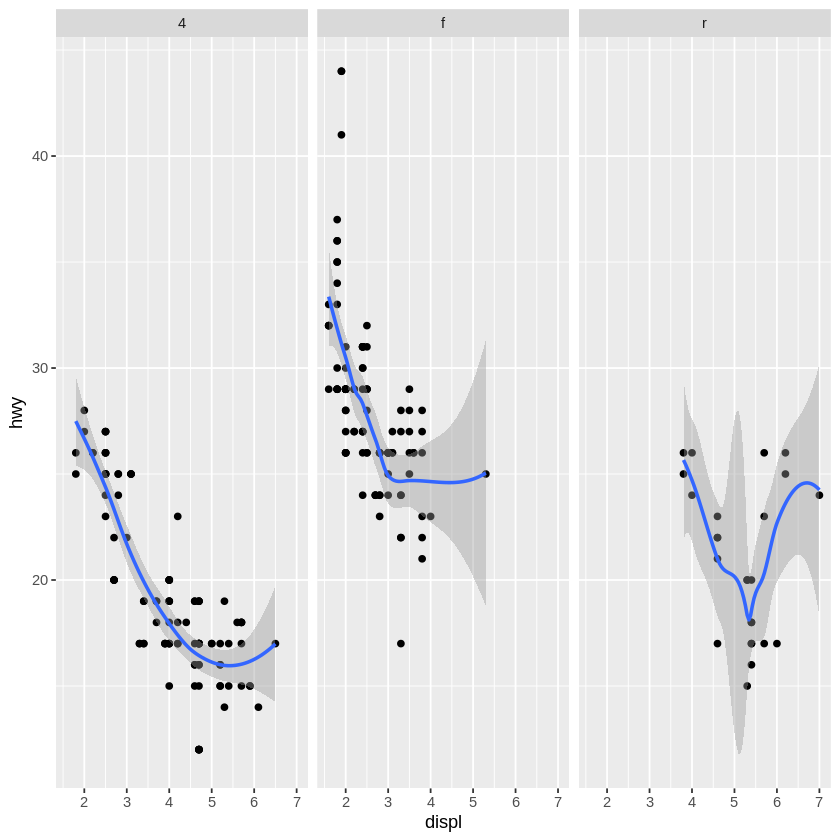

In [179]:
qplot(displ, hwy, data = mpg, facets = . ~ drv, geom = c("point","smooth"))

#Case Study: MAACS Cohort

In [1]:
load("/content/maacs.rda")

In [4]:
library(ggplot2)

Warning message:
“`qplot()` was deprecated in ggplot2 3.4.0.”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 108 rows containing non-finite outside the scale range (`stat_bin()`).”


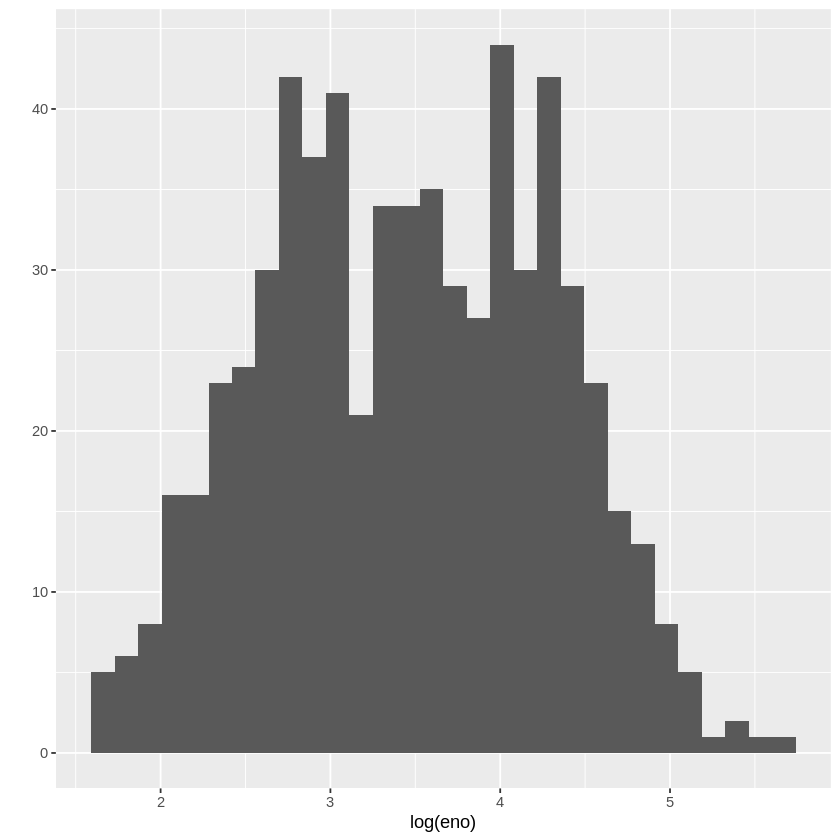

In [5]:
qplot(log(eno), data = maacs)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 108 rows containing non-finite outside the scale range (`stat_bin()`).”


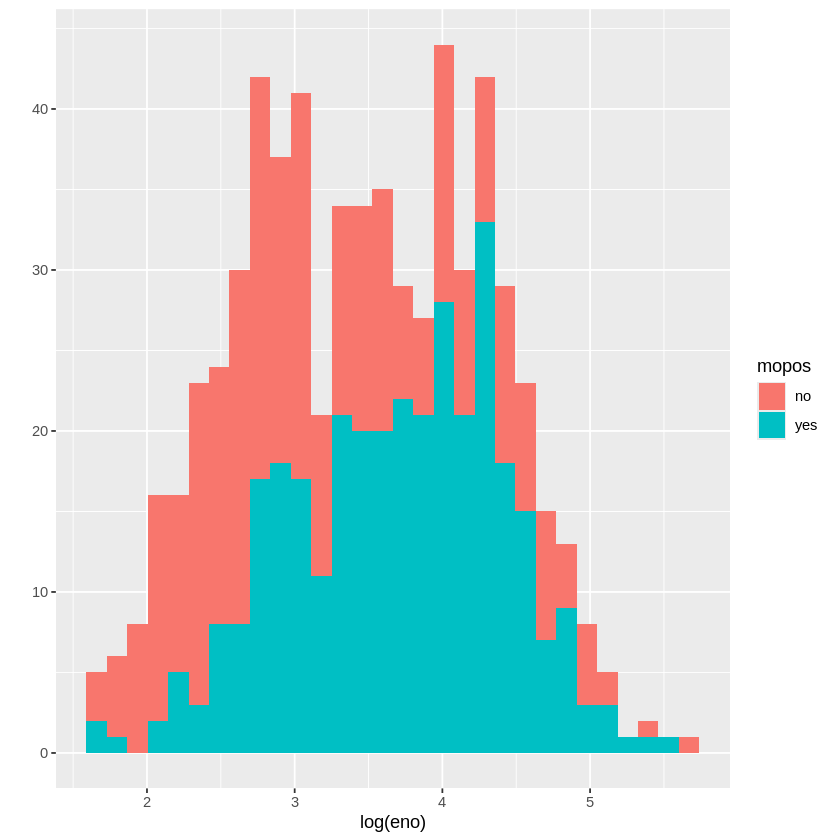

In [6]:
qplot(log(eno), data = maacs, fill = mopos)

Warning message:
“Removed 108 rows containing non-finite outside the scale range
(`stat_density()`).”


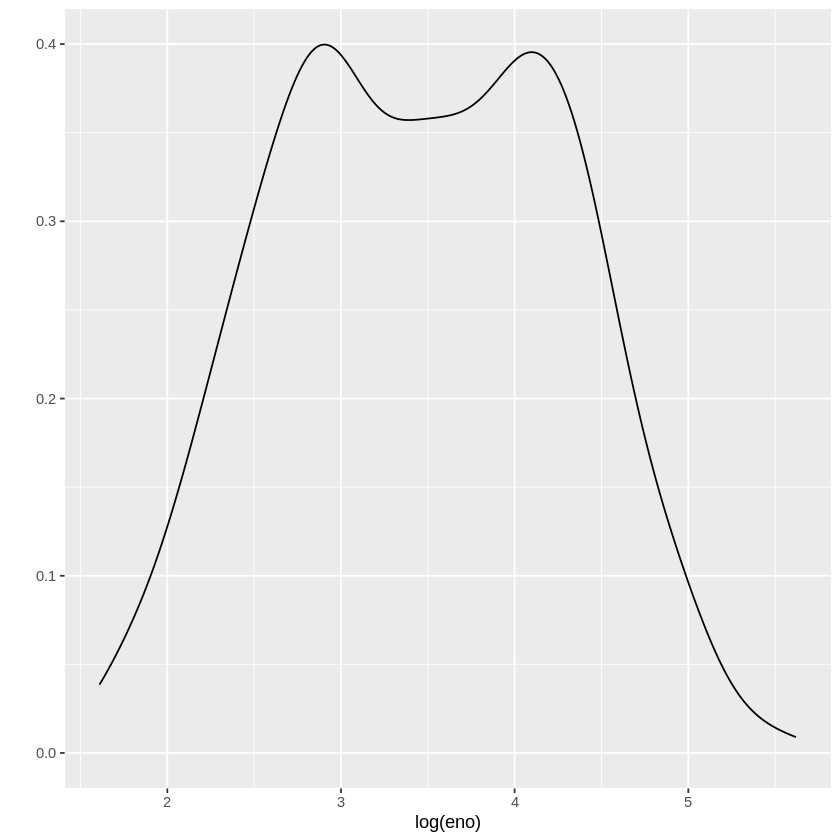

In [7]:
qplot(log(eno), data = maacs, geom = "density")

Warning message:
“Removed 108 rows containing non-finite outside the scale range
(`stat_density()`).”


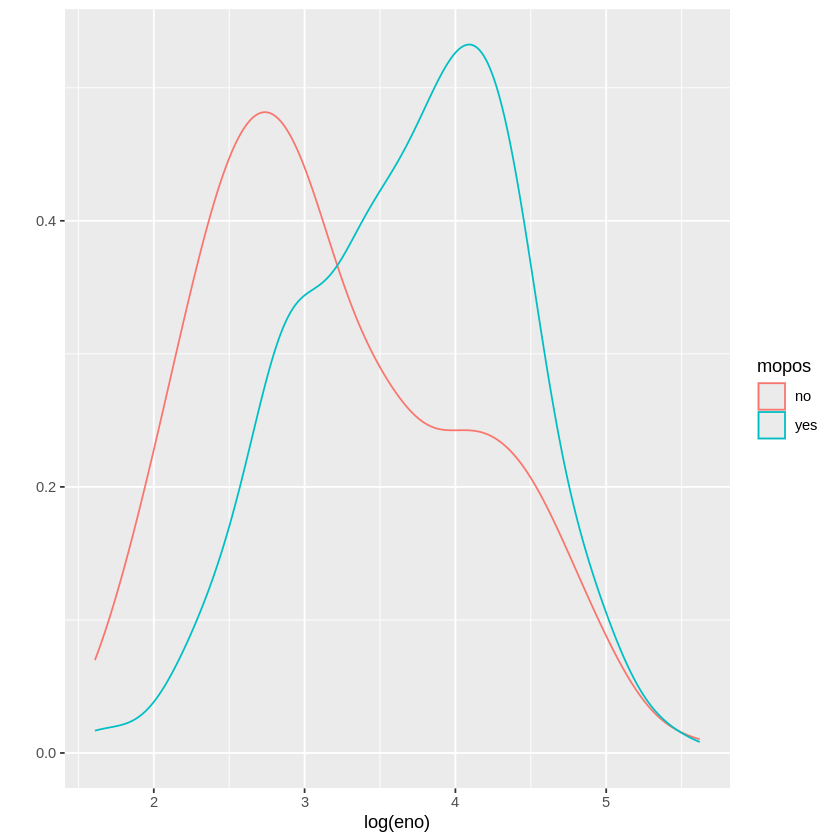

In [8]:
qplot(log(eno), data = maacs, geom = "density", color = mopos)

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“Removed 184 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“Removed 184 rows containing missing values or values outside the scale range
(`geom_point()`).”


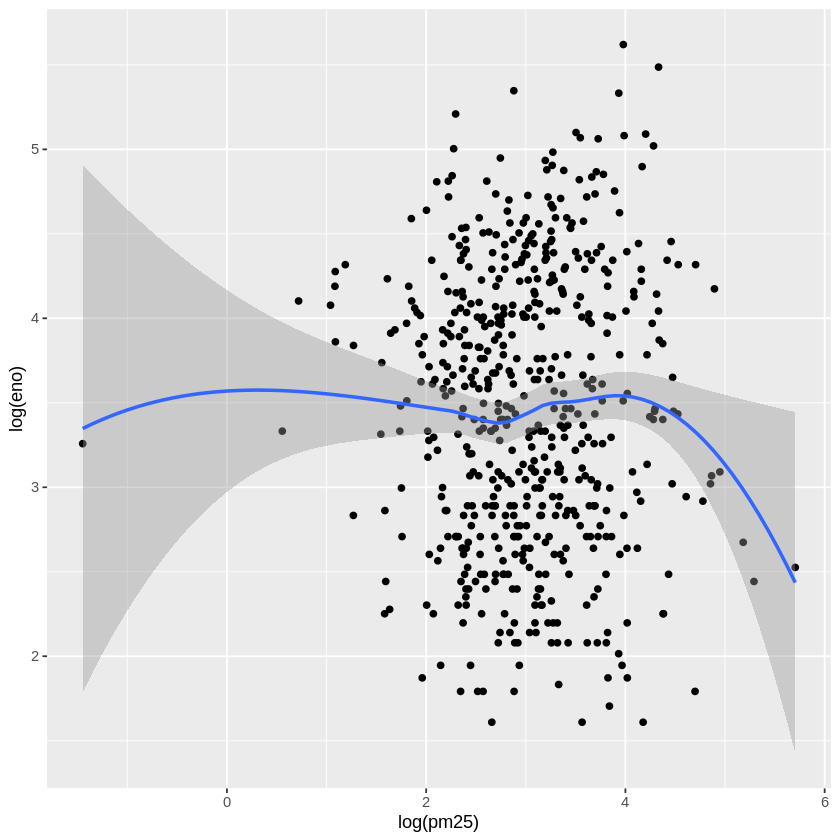

In [9]:
##simple scatterplot of PM2.5 and eNO

qplot(log(pm25), log(eno), data = maacs, geom = c("point","smooth"))

Warning message:
“Removed 184 rows containing missing values or values outside the scale range
(`geom_point()`).”


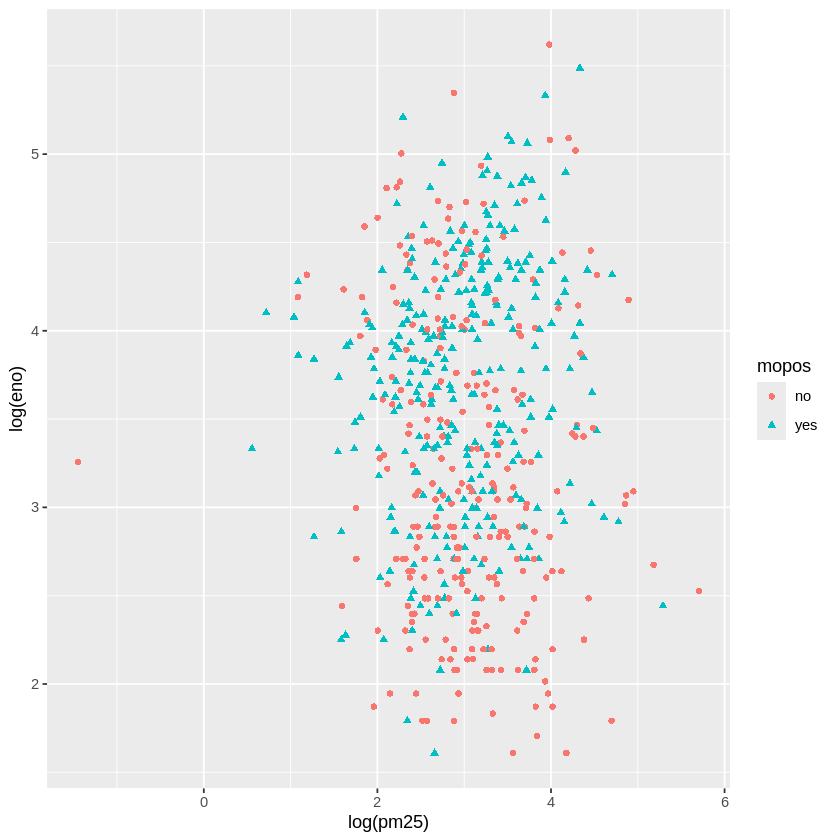

In [11]:
qplot(log(pm25), log(eno), data = maacs, shape = mopos, color = mopos)

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 184 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“Removed 184 rows containing missing values or values outside the scale range
(`geom_point()`).”


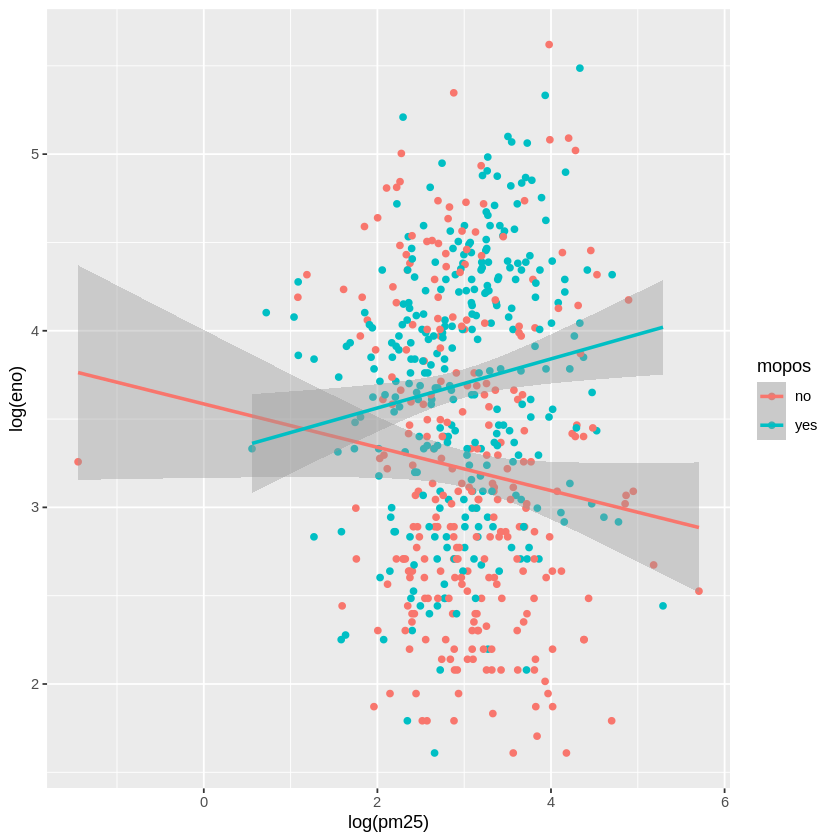

In [12]:
qplot(log(pm25), log(eno), data = maacs, color=mopos) + geom_smooth(method = "lm")

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 184 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“Removed 184 rows containing missing values or values outside the scale range
(`geom_point()`).”


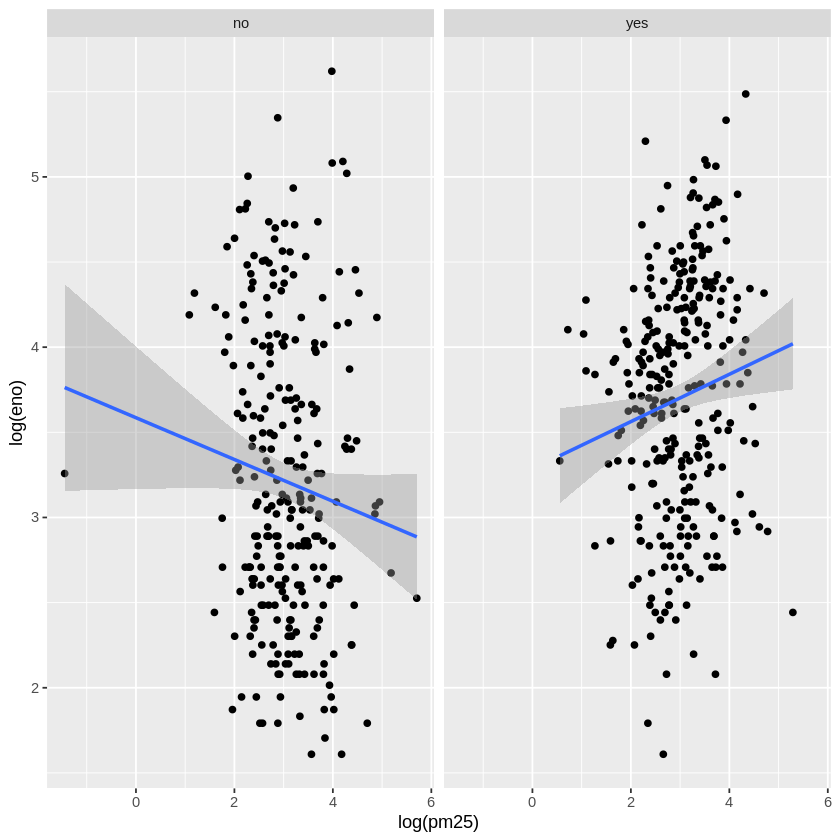

In [13]:
qplot(log(pm25), log(eno), data = maacs, facets = . ~ mopos) + geom_smooth(method = "lm")

In [14]:
maacs <-read.csv("/content/bmi_pm25_no2_sim.csv")
str(maacs)

'data.frame':	517 obs. of  4 variables:
 $ logpm25       : num  1.248 1.122 1.93 1.368 0.775 ...
 $ logno2_new    : num  1.184 1.552 1.432 1.774 0.765 ...
 $ bmicat        : chr  "normal weight" "overweight" "normal weight" "overweight" ...
 $ NocturnalSympt: int  1 0 0 2 0 0 0 0 0 3 ...


##Building Up in Layers

In [15]:
head(maacs)

logpm25   logno2_new bmicat        NocturnalSympt
1 1.2476997 1.1837987  normal weight 1             
2 1.1216476 1.5515362  overweight    0             
3 1.9300429 1.4323519  normal weight 0             
4 1.3679246 1.7736804  overweight    2             
5 0.7753367 0.7654826  normal weight 0             
6 1.4872785 1.1127378  normal weight 0

In [16]:
g <- ggplot(maacs, aes(logpm25, NocturnalSympt))
summary(g)

data: logpm25, logno2_new, bmicat, NocturnalSympt [517x4]
mapping:  x = ~logpm25, y = ~NocturnalSympt
faceting: <ggproto object: Class FacetNull, Facet, gg>
    compute_layout: function
    draw_back: function
    draw_front: function
    draw_labels: function
    draw_panels: function
    finish_data: function
    init_scales: function
    map_data: function
    params: list
    setup_data: function
    setup_params: function
    shrink: TRUE
    train_scales: function
    vars: function
    super:  <ggproto object: Class FacetNull, Facet, gg>


In [17]:
class(g)

[1] "gg"     "ggplot"

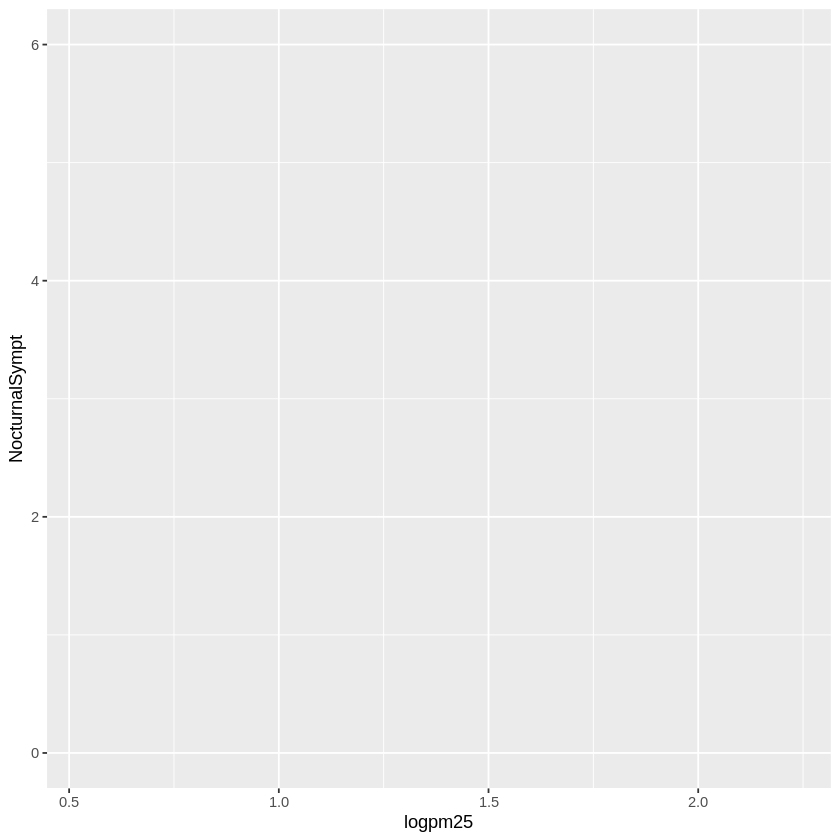

In [18]:
g <- ggplot(maacs, aes(logpm25, NocturnalSympt))
print(g)

##First Plot with Point Layer

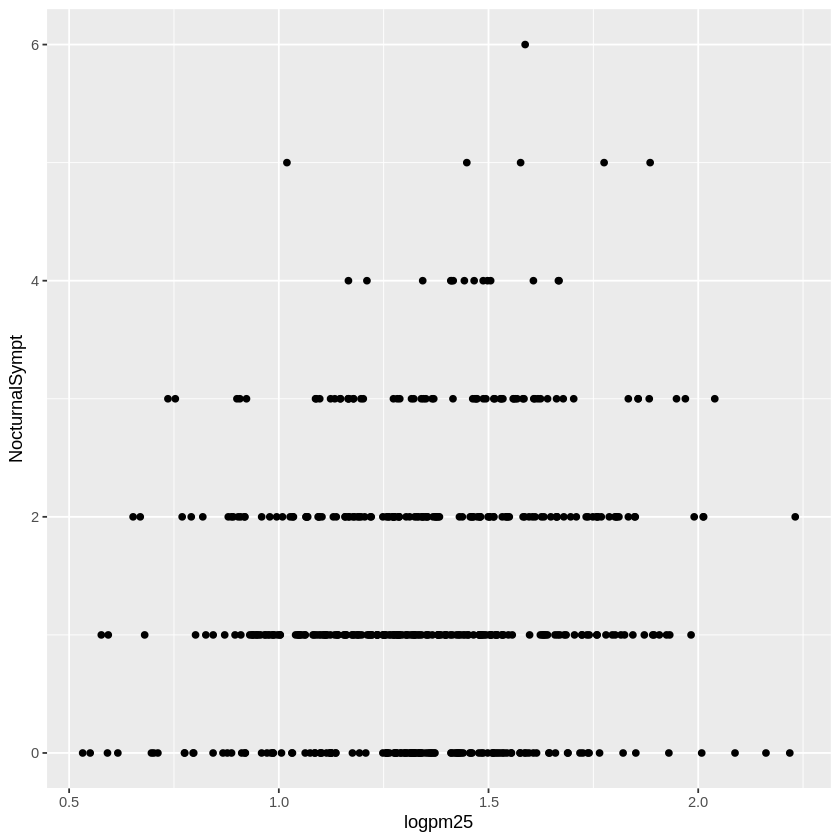

In [19]:
g <- ggplot(maacs, aes(logpm25, NocturnalSympt))
g + geom_point()

##Adding More Layers: Smooth

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


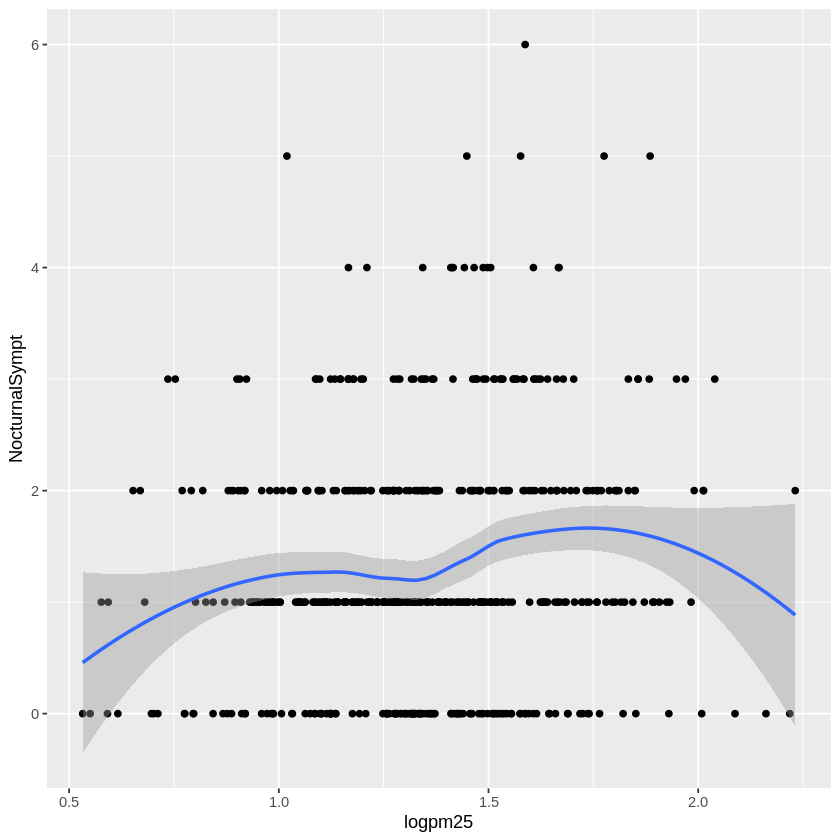

In [20]:
g + geom_point() + geom_smooth()

`geom_smooth()` using formula = 'y ~ x'


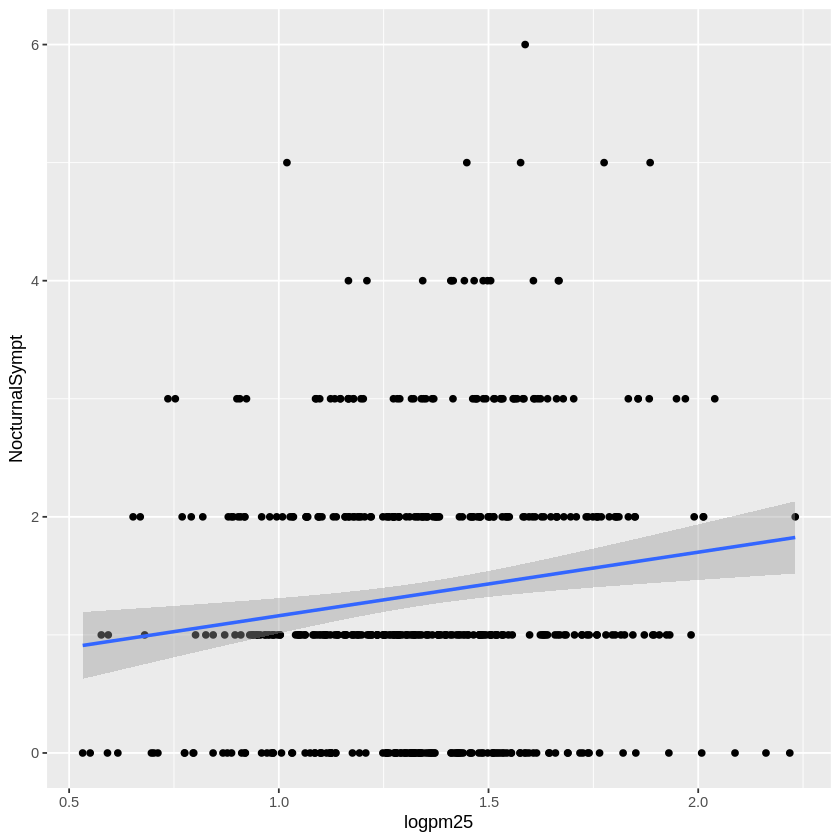

In [21]:
g + geom_point() + geom_smooth(method = "lm")

##Adding More Layes: Facets

`geom_smooth()` using formula = 'y ~ x'


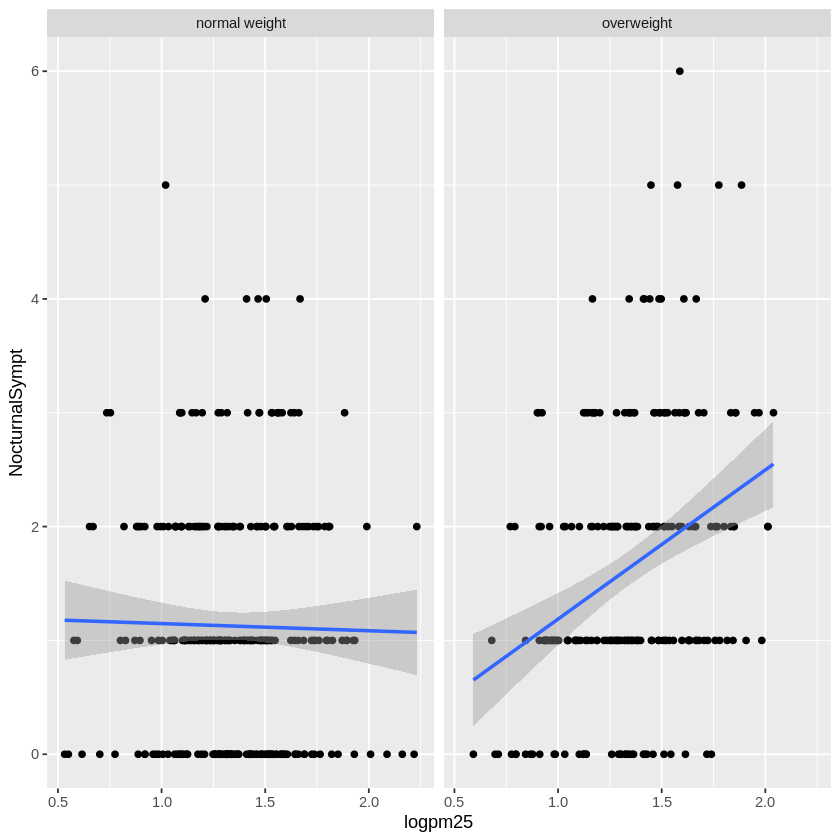

In [22]:
g + geom_point() +
  geom_smooth(method = "lm") +
  facet_grid(. ~ bmicat)

##Modifying Geom Properties

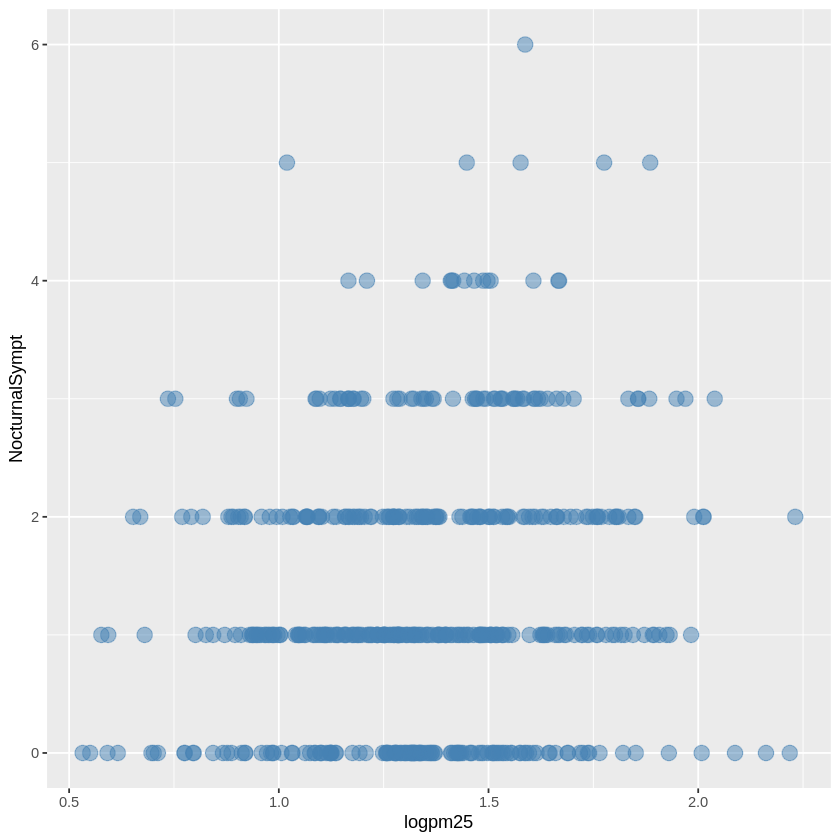

In [23]:
g + geom_point(color = "steelblue", size = 4, alpha = 1/2)

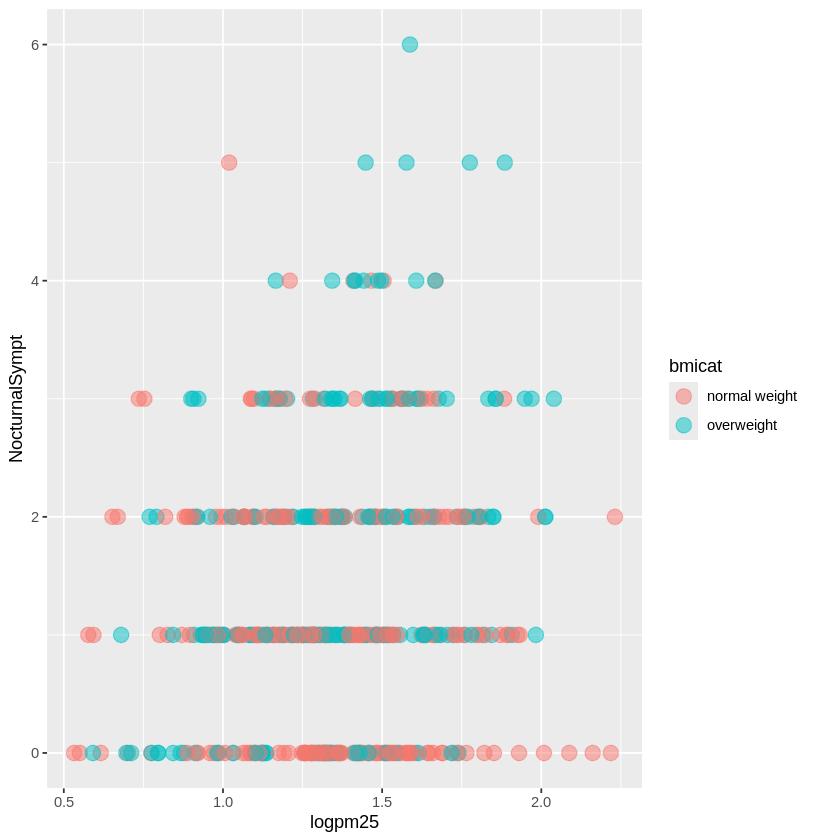

In [24]:
g + geom_point(aes(color = bmicat), size = 4, alpha = 1/2)

##Modifying Labels

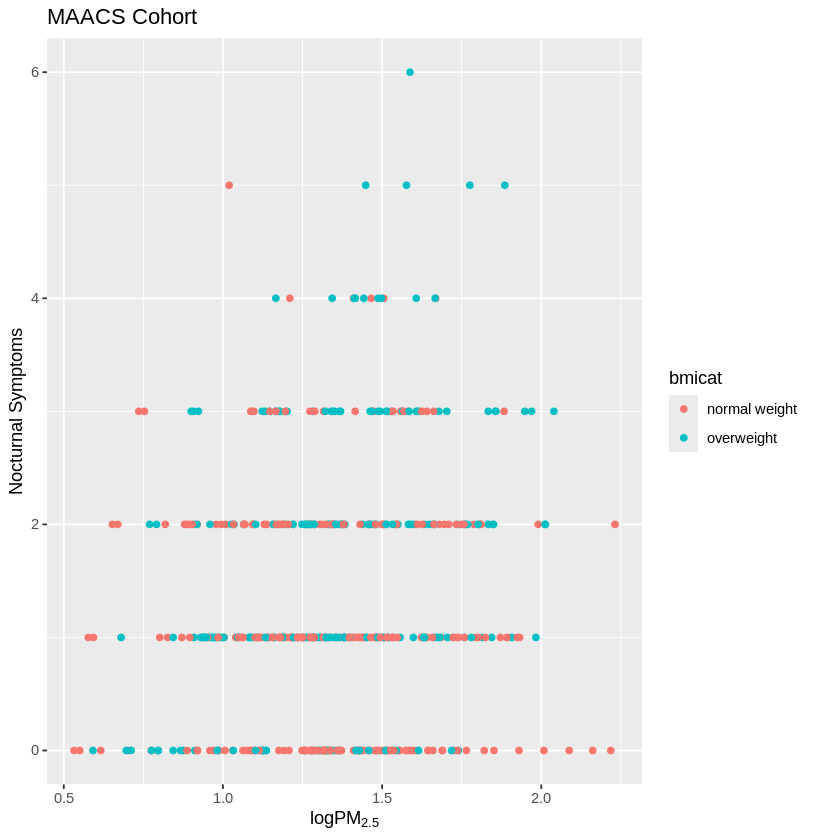

In [25]:
g + geom_point(aes(color = bmicat)) +
  labs(title = "MAACS Cohort") +
  labs(x = expression("log" *PM[2.5]), y = "Nocturnal Symptoms")

##Customizing the Smooth

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
`geom_smooth()` using formula = 'y ~ x'


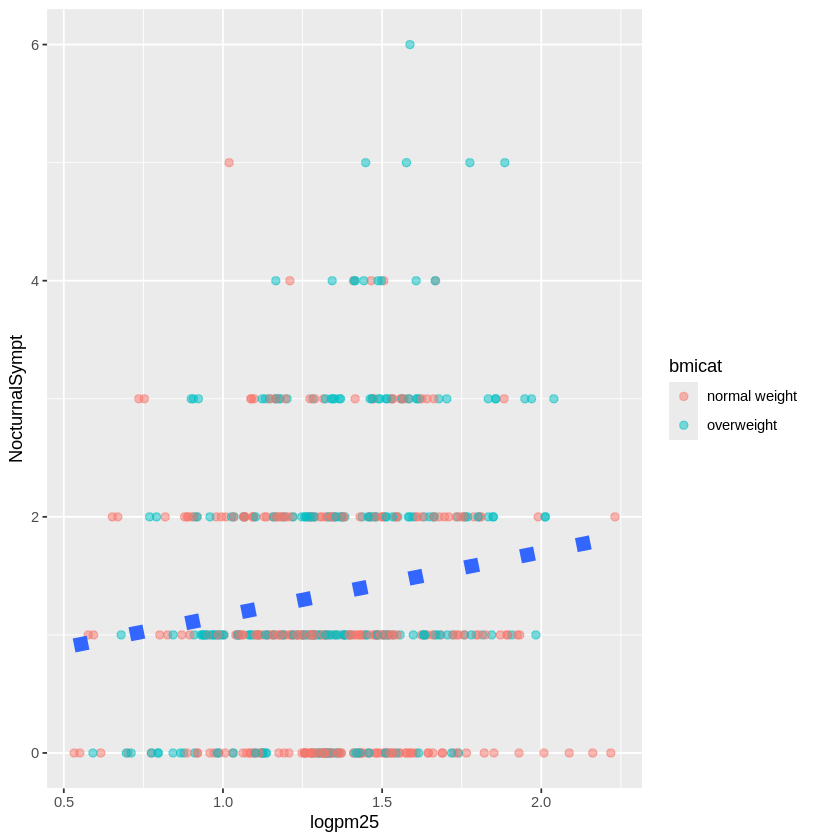

In [26]:
g + geom_point(aes(color = bmicat), size = 2, alpha = 1/2) +
  geom_smooth(size = 4, linetype = 3, method = "lm", se = FALSE)

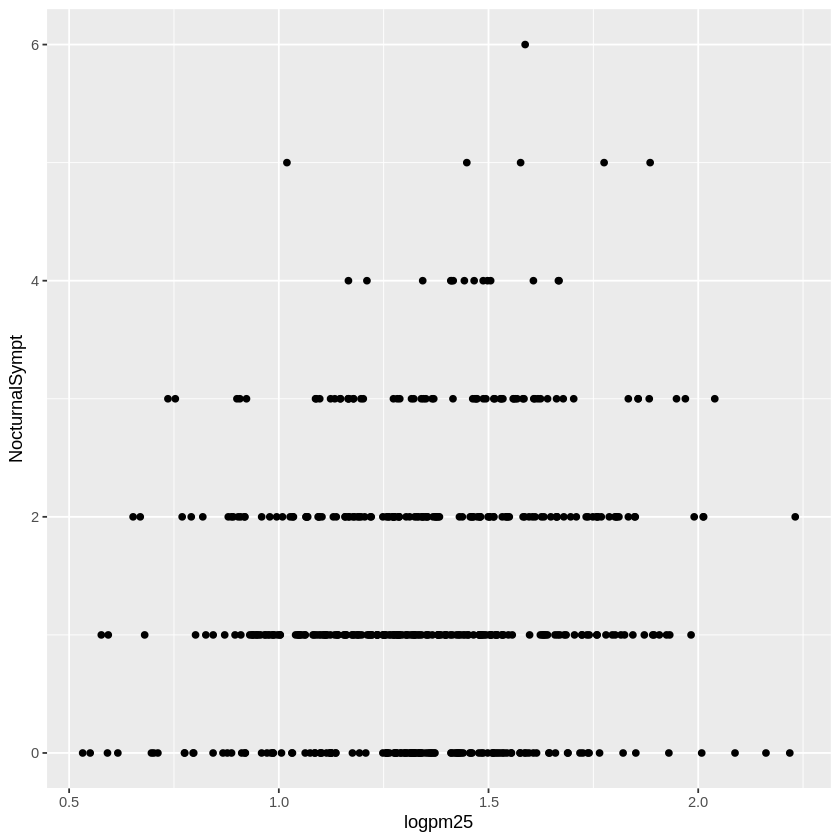

In [27]:
##Changing the Theme

g + geom_point(aes(color = bmicat) + theme_bw(base_family = "Times"))

In [28]:
cutpoints <- quantile(maacs$logno2_new, seq(0,1,length=4), na.rm = TRUE)

In [29]:
maacs$no2tert <- cut(maacs$logno2_new, cutpoints)

In [30]:
#see the levels of the newly created factor varibale
levels(maacs$no2)

[1] "(0.342,1.23]" "(1.23,1.47]"  "(1.47,2.17]"

In [32]:
##setup ggplot with data frame

g <- ggplot(maacs, aes(logpm25, NocturnalSympt))

`geom_smooth()` using formula = 'y ~ x'


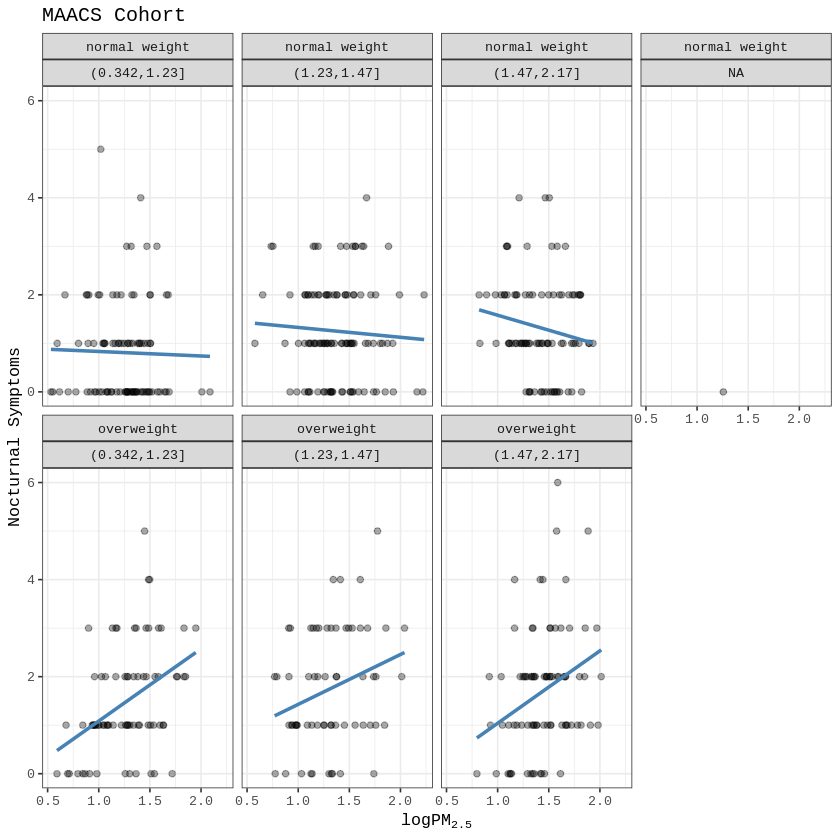

In [33]:
## Add layers

g + geom_point(alpha = 1/3) +
  facet_wrap(bmicat ~ no2tert, nrow = 2, ncol = 4) +
  geom_smooth(method = "lm", se = FALSE, col= "steelblue") +
  theme_bw(base_family = "Avenir", base_size = 10) +
  labs(x = expression("log" *PM[2.5])) +
  labs(y = "Nocturnal Symptoms") +
  labs(title = "MAACS Cohort")

##A Quick Aside about Axis Limits

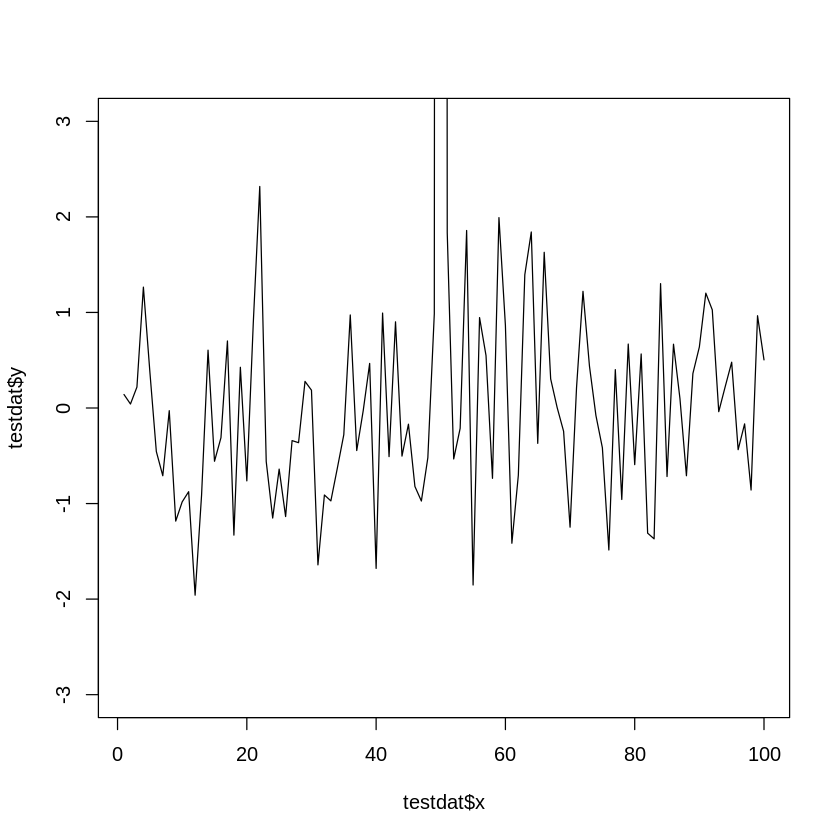

In [34]:
testdat <- data.frame(x = 1:100, y = rnorm(100))
testdat[50,2] <- 100
plot(testdat$x, testdat$y, type = "l", ylim = c(-3,3))

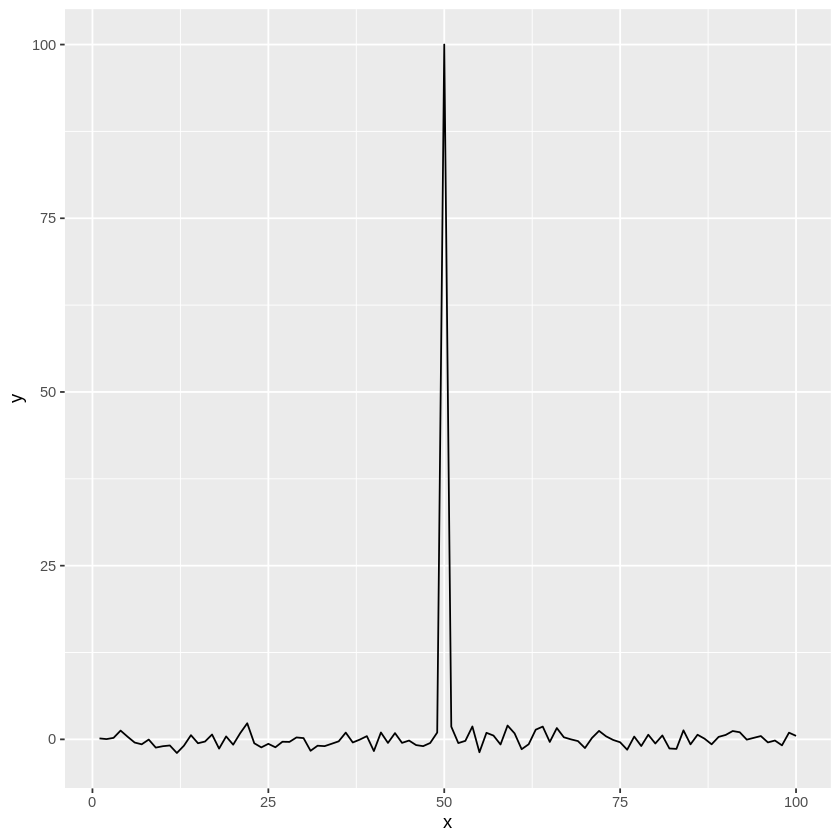

In [35]:
g <- ggplot(testdat, aes(x = x, y = y))
g + geom_line()

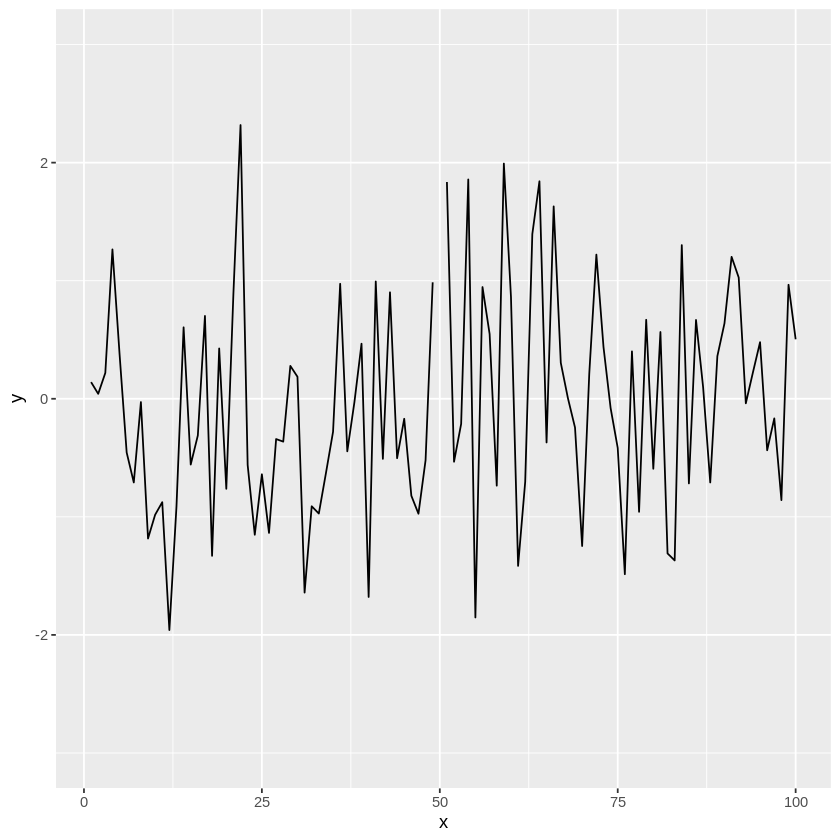

In [36]:
g + geom_line() + ylim(-3,3)

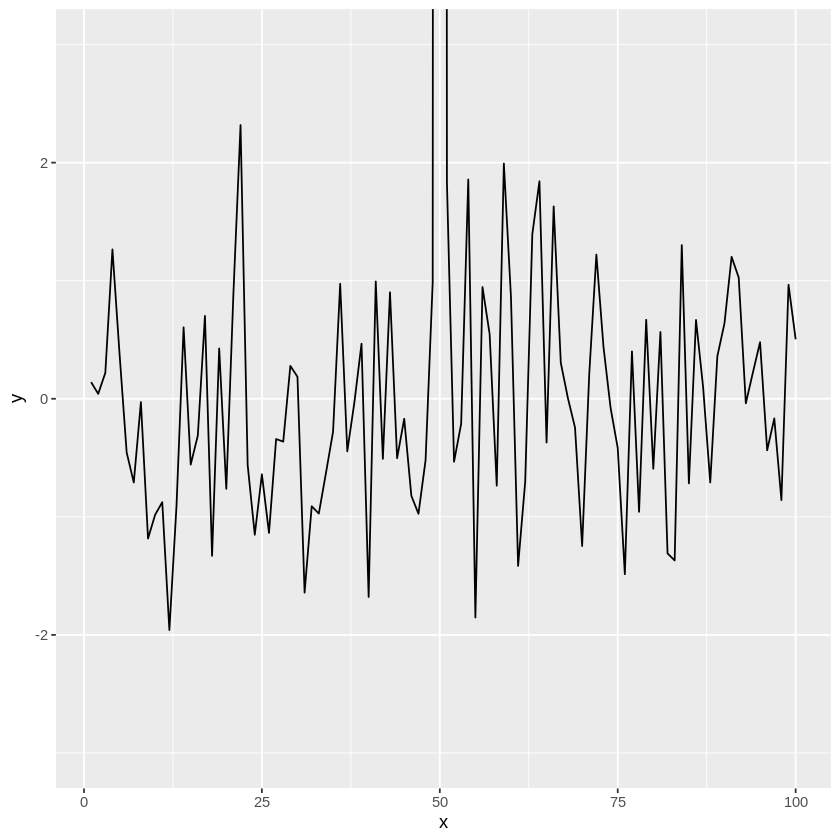

In [37]:
g + geom_line() + coord_cartesian(ylim = c(-3,3))